# Notebook de estimaciones

Una vez recogidos todos los datos y tras su tratamiento, antes de realizar ninguna predicción, se han de preparar los distintos estimadores. Para ello, primero se dividirán los datos en dos conjuntos, uno para hiperparametrización y otro para la posterior validación de los resultados.

In [1]:
# Imports necesarios

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

#from sklearnex import patch_sklearn
#patch_sklearn()
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

from modulo_datos import n_est, lee_datos_normalizacion
from modulo_estimacion import n_score, hiperparametriza_estimador, info_mejores_estimadores, score0, score1, score2, score3x

In [10]:
dtype={'Indice': np.int64,
       'Valor': np.float64,
       'Prevision': np.float64,
       'Dia': str,
       'Dia_Semana': str,
       'Hora': str,
       'Temperatura': np.float64,
       'Fecha': str,
       'Valor_Normalizado1': np.float64,
       'Valor_Normalizado2': np.float64,
       'Valor_Normalizado3_7d': np.float64,
       'Valor_Normalizado3_1d': np.float64,
       'Temperatura_Centrada0': np.float64,
       'Temperatura_Centrada1': np.float64,
       'Temperatura_Centrada2': np.float64,
       'Temperatura_Centrada3_7d': np.float64,
       'Temperatura_Centrada3_1d': np.float64}

data = pd.read_csv('data.csv', sep=';', index_col=0, dtype=dtype, parse_dates=['Fecha'])

In [11]:
anyo12 = data.loc[data['Indice'] < n_est]
anyo3 = data.loc[data['Indice'] >= n_est]

### Conjuntos de training y de test

Se dividen los datos en distintos conjuntos en función de su normalización y dependiendo de si se usarán para training o para el posterior test.

In [12]:
horas_atras = 12
horas_delante = 6

limite12 = n_est - horas_atras - horas_delante
limite3 = n_score - horas_atras - horas_delante

In [13]:
auxX0Sin = []
auxX1Sin = []
auxX2Sin = []
auxX37Sin = []
auxX31Sin = []
auxX0Con = []
auxX1Con = []
auxX2Con = []
auxX37Con = []
auxX31Con = []
auxX0ConCen = []
auxX1ConCen = []
auxX2ConCen = []
auxX37ConCen = []
auxX31ConCen = []
for i in range(limite12):
    auxX0Sin.append([])
    auxX1Sin.append([])
    auxX2Sin.append([])
    auxX37Sin.append([])
    auxX31Sin.append([])
    auxX0Con.append([])
    auxX1Con.append([])
    auxX2Con.append([])
    auxX37Con.append([])
    auxX31Con.append([])
    auxX0ConCen.append([])
    auxX1ConCen.append([])
    auxX2ConCen.append([])
    auxX37ConCen.append([])
    auxX31ConCen.append([])
    for j in range(horas_atras):
        auxX0Sin[i].append(anyo12['Valor'][j+i])
        auxX1Sin[i].append(anyo12['Valor_Normalizado1'][j+i])
        auxX2Sin[i].append(anyo12['Valor_Normalizado2'][j+i])
        auxX37Sin[i].append(anyo12['Valor_Normalizado3_7d'][j+i])
        auxX31Sin[i].append(anyo12['Valor_Normalizado3_1d'][j+i])
        auxX0Con[i].append(anyo12['Valor'][j+i])
        auxX1Con[i].append(anyo12['Valor_Normalizado1'][j+i])
        auxX2Con[i].append(anyo12['Valor_Normalizado2'][j+i])
        auxX37Con[i].append(anyo12['Valor_Normalizado3_7d'][j+i])
        auxX31Con[i].append(anyo12['Valor_Normalizado3_1d'][j+i])
        auxX0ConCen[i].append(anyo12['Valor'][j+i])
        auxX1ConCen[i].append(anyo12['Valor_Normalizado1'][j+i])
        auxX2ConCen[i].append(anyo12['Valor_Normalizado2'][j+i])
        auxX37ConCen[i].append(anyo12['Valor_Normalizado3_7d'][j+i])
        auxX31ConCen[i].append(anyo12['Valor_Normalizado3_1d'][j+i])

auxY0 = []
auxY1 = []
auxY2 = []
auxY37 = []
auxY31 = []
for i in range(limite12):
    auxY0.append([])
    auxY1.append([])
    auxY2.append([])
    auxY37.append([])
    auxY31.append([])
    for j in range(horas_delante):
        auxY0[i].append(anyo12['Valor'][j+i+horas_atras])
        auxY1[i].append(anyo12['Valor_Normalizado1'][j+i+horas_atras])
        auxY2[i].append(anyo12['Valor_Normalizado2'][j+i+horas_atras])
        auxY37[i].append(anyo12['Valor_Normalizado3_7d'][j+i+horas_atras])
        auxY31[i].append(anyo12['Valor_Normalizado3_1d'][j+i+horas_atras])
        auxX0Con[i].append(anyo12['Temperatura'][j+i+horas_atras])
        auxX1Con[i].append(anyo12['Temperatura'][j+i+horas_atras])
        auxX2Con[i].append(anyo12['Temperatura'][j+i+horas_atras])
        auxX37Con[i].append(anyo12['Temperatura'][j+i+horas_atras])
        auxX31Con[i].append(anyo12['Temperatura'][j+i+horas_atras])
        auxX0ConCen[i].append(anyo12['Temperatura_Centrada0'][j+i+horas_atras])
        auxX1ConCen[i].append(anyo12['Temperatura_Centrada1'][j+i+horas_atras])
        auxX2ConCen[i].append(anyo12['Temperatura_Centrada2'][j+i+horas_atras])
        auxX37ConCen[i].append(anyo12['Temperatura_Centrada3_7d'][j+i+horas_atras])
        auxX31ConCen[i].append(anyo12['Temperatura_Centrada3_1d'][j+i+horas_atras])

XTraining0Sin = np.array(auxX0Sin)
yTraining0Sin = np.array(auxY0)
XTraining1Sin = np.array(auxX1Sin)
yTraining1Sin = np.array(auxY1)
XTraining2Sin = np.array(auxX2Sin)
yTraining2Sin = np.array(auxY2)
XTraining37Sin = np.array(auxX37Sin)
yTraining37Sin = np.array(auxY37)
XTraining31Sin = np.array(auxX31Sin)
yTraining31Sin = np.array(auxY31)
XTraining0Con = np.array(auxX0Con)
yTraining0Con = np.array(auxY0)
XTraining1Con = np.array(auxX1Con)
yTraining1Con = np.array(auxY1)
XTraining2Con = np.array(auxX2Con)
yTraining2Con = np.array(auxY2)
XTraining37Con = np.array(auxX37Con)
yTraining37Con = np.array(auxY37)
XTraining31Con = np.array(auxX31Con)
yTraining31Con = np.array(auxY31)
XTraining0ConCen = np.array(auxX0ConCen)
yTraining0ConCen = np.array(auxY0)
XTraining1ConCen = np.array(auxX1ConCen)
yTraining1ConCen = np.array(auxY1)
XTraining2ConCen = np.array(auxX2ConCen)
yTraining2ConCen = np.array(auxY2)
XTraining37ConCen = np.array(auxX37ConCen)
yTraining37ConCen = np.array(auxY37)
XTraining31ConCen = np.array(auxX31ConCen)
yTraining31ConCen = np.array(auxY31)

In [14]:
auxX0Sin = []
auxX1Sin = []
auxX2Sin = []
auxX37Sin = []
auxX31Sin = []
auxX0Con = []
auxX1Con = []
auxX2Con = []
auxX37Con = []
auxX31Con = []
auxX0ConCen = []
auxX1ConCen = []
auxX2ConCen = []
auxX37ConCen = []
auxX31ConCen = []
for i in range(limite3):
    auxX0Sin.append([])
    auxX1Sin.append([])
    auxX2Sin.append([])
    auxX37Sin.append([])
    auxX31Sin.append([])
    auxX0Con.append([])
    auxX1Con.append([])
    auxX2Con.append([])
    auxX37Con.append([])
    auxX31Con.append([])
    auxX0ConCen.append([])
    auxX1ConCen.append([])
    auxX2ConCen.append([])
    auxX37ConCen.append([])
    auxX31ConCen.append([])
    for j in range(horas_atras):
        auxX0Sin[i].append(anyo3['Valor'][j+i+n_est])
        auxX1Sin[i].append(anyo3['Valor_Normalizado1'][j+i+n_est])
        auxX2Sin[i].append(anyo3['Valor_Normalizado2'][j+i+n_est])
        auxX37Sin[i].append(anyo3['Valor_Normalizado3_7d'][j+i+n_est])
        auxX31Sin[i].append(anyo3['Valor_Normalizado3_1d'][j+i+n_est])
        auxX0Con[i].append(anyo3['Valor'][j+i+n_est])
        auxX1Con[i].append(anyo3['Valor_Normalizado1'][j+i+n_est])
        auxX2Con[i].append(anyo3['Valor_Normalizado2'][j+i+n_est])
        auxX37Con[i].append(anyo3['Valor_Normalizado3_7d'][j+i+n_est])
        auxX31Con[i].append(anyo3['Valor_Normalizado3_1d'][j+i+n_est])
        auxX0ConCen[i].append(anyo3['Valor'][j+i+n_est])
        auxX1ConCen[i].append(anyo3['Valor_Normalizado1'][j+i+n_est])
        auxX2ConCen[i].append(anyo3['Valor_Normalizado2'][j+i+n_est])
        auxX37ConCen[i].append(anyo3['Valor_Normalizado3_7d'][j+i+n_est])
        auxX31ConCen[i].append(anyo3['Valor_Normalizado3_1d'][j+i+n_est])

auxY = []
auxYPersistencia = []
auxYPrevision = []
for i in range(limite3):
    auxY.append([])
    auxYPersistencia.append([])
    auxYPrevision.append([])
    for j in range(horas_delante):
        auxY[i].append(anyo3['Valor'][j+i+horas_atras+n_est])
        auxX0Con[i].append(anyo3['Temperatura'][j+i+horas_atras+n_est])
        auxX1Con[i].append(anyo3['Temperatura'][j+i+horas_atras+n_est])
        auxX2Con[i].append(anyo3['Temperatura'][j+i+horas_atras+n_est])
        auxX37Con[i].append(anyo3['Temperatura'][j+i+horas_atras+n_est])
        auxX31Con[i].append(anyo3['Temperatura'][j+i+horas_atras+n_est])
        auxX0ConCen[i].append(anyo3['Temperatura_Centrada0'][j+i+horas_atras+n_est])
        auxX1ConCen[i].append(anyo3['Temperatura_Centrada1'][j+i+horas_atras+n_est])
        auxX2ConCen[i].append(anyo3['Temperatura_Centrada2'][j+i+horas_atras+n_est])
        auxX37ConCen[i].append(anyo3['Temperatura_Centrada3_7d'][j+i+horas_atras+n_est])
        auxX31ConCen[i].append(anyo3['Temperatura_Centrada3_1d'][j+i+horas_atras+n_est])
        auxYPersistencia[i].append(anyo3['Valor'][i+horas_atras+n_est-1])
        auxYPrevision[i].append(anyo3['Prevision'][j+i+horas_atras+n_est])

XTest0Sin = np.array(auxX0Sin)
XTest1Sin = np.array(auxX1Sin)
XTest2Sin = np.array(auxX2Sin)
XTest37Sin = np.array(auxX37Sin)
XTest31Sin = np.array(auxX31Sin)
XTest0Con = np.array(auxX0Con)
XTest1Con = np.array(auxX1Con)
XTest2Con = np.array(auxX2Con)
XTest37Con = np.array(auxX37Con)
XTest31Con = np.array(auxX31Con)
XTest0ConCen = np.array(auxX0ConCen)
XTest1ConCen = np.array(auxX1ConCen)
XTest2ConCen = np.array(auxX2ConCen)
XTest37ConCen = np.array(auxX37ConCen)
XTest31ConCen = np.array(auxX31ConCen)
yTest = np.array(auxY)
yPersistencia = np.array(auxYPersistencia)
yPrevision = np.array(auxYPrevision)

## Ridge Regression

### Hiperparametrización

Ridge Regression tiene como único hiperparámetro *alpha*.

In [7]:
l_alpha = [10**k for k in range(-8, 4)]
param_grid = {'regressor__ridge__alpha': l_alpha}

In [8]:
cv_estimator_0Sin = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining0Sin, yTraining0Sin, '0Sin')
cv_estimator_1Sin = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining1Sin, yTraining1Sin, '1Sin')
cv_estimator_2Sin = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining2Sin, yTraining2Sin, '2Sin')
cv_estimator_37Sin = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining37Sin, yTraining37Sin, '37Sin')
cv_estimator_31Sin = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining31Sin, yTraining31Sin, '31Sin')
cv_estimator_0Con = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining0Con, yTraining0Con, '0Con')
cv_estimator_1Con = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining1Con, yTraining1Con, '1Con')
cv_estimator_2Con = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining2Con, yTraining2Con, '2Con')
cv_estimator_37Con = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining37Con, yTraining37Con, '37Con')
cv_estimator_31Con = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining31Con, yTraining31Con, '31Con')
cv_estimator_0ConCen = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining0ConCen, yTraining0ConCen, '0ConCen')
cv_estimator_1ConCen = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining1ConCen, yTraining1ConCen, '1ConCen')
cv_estimator_2ConCen = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining2ConCen, yTraining2ConCen, '2ConCen')
cv_estimator_37ConCen = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining37ConCen, yTraining37ConCen, '37ConCen')
cv_estimator_31ConCen = hiperparametriza_estimador(Ridge(), 'ridge', param_grid, XTraining31ConCen, yTraining31ConCen, '31ConCen')

In [9]:
cv_estimator_0Sin = joblib.load("estimadores/ridge/est_0Sin.pkl")
cv_estimator_1Sin = joblib.load("estimadores/ridge/est_1Sin.pkl")
cv_estimator_2Sin = joblib.load("estimadores/ridge/est_2Sin.pkl")
cv_estimator_37Sin = joblib.load("estimadores/ridge/est_37Sin.pkl")
cv_estimator_31Sin = joblib.load("estimadores/ridge/est_31Sin.pkl")
cv_estimator_0Con = joblib.load("estimadores/ridge/est_0Con.pkl")
cv_estimator_1Con = joblib.load("estimadores/ridge/est_1Con.pkl")
cv_estimator_2Con = joblib.load("estimadores/ridge/est_2Con.pkl")
cv_estimator_37Con = joblib.load("estimadores/ridge/est_37Con.pkl")
cv_estimator_31Con = joblib.load("estimadores/ridge/est_31Con.pkl")
cv_estimator_0ConCen = joblib.load("estimadores/ridge/est_0ConCen.pkl")
cv_estimator_1ConCen = joblib.load("estimadores/ridge/est_1ConCen.pkl")
cv_estimator_2ConCen = joblib.load("estimadores/ridge/est_2ConCen.pkl")
cv_estimator_37ConCen = joblib.load("estimadores/ridge/est_37ConCen.pkl")
cv_estimator_31ConCen = joblib.load("estimadores/ridge/est_31ConCen.pkl")

In [10]:
df_ridge_search_0Sin = info_mejores_estimadores(cv_estimator_0Sin, param_grid)
df_ridge_search_1Sin = info_mejores_estimadores(cv_estimator_1Sin, param_grid)
df_ridge_search_2Sin = info_mejores_estimadores(cv_estimator_2Sin, param_grid)
df_ridge_search_37Sin = info_mejores_estimadores(cv_estimator_37Sin, param_grid)
df_ridge_search_31Sin = info_mejores_estimadores(cv_estimator_31Sin, param_grid)
df_ridge_search_0Con = info_mejores_estimadores(cv_estimator_0Con, param_grid)
df_ridge_search_1Con = info_mejores_estimadores(cv_estimator_1Con, param_grid)
df_ridge_search_2Con = info_mejores_estimadores(cv_estimator_2Con, param_grid)
df_ridge_search_37Con = info_mejores_estimadores(cv_estimator_37Con, param_grid)
df_ridge_search_31Con = info_mejores_estimadores(cv_estimator_31Con, param_grid)
df_ridge_search_0ConCen = info_mejores_estimadores(cv_estimator_0ConCen, param_grid)
df_ridge_search_1ConCen = info_mejores_estimadores(cv_estimator_1ConCen, param_grid)
df_ridge_search_2ConCen = info_mejores_estimadores(cv_estimator_2ConCen, param_grid)
df_ridge_search_37ConCen = info_mejores_estimadores(cv_estimator_37ConCen, param_grid)
df_ridge_search_31ConCen = info_mejores_estimadores(cv_estimator_31ConCen, param_grid)

Se plotean a continuación los resultados de la hiperparametrización.

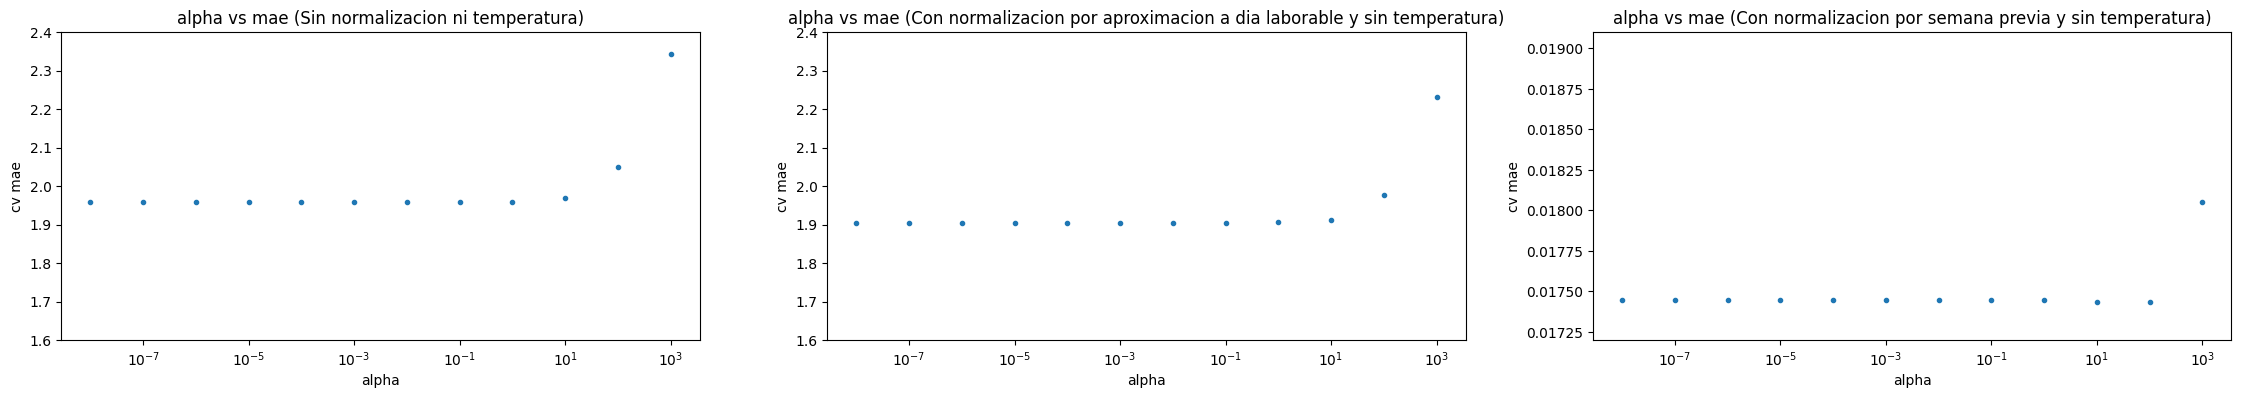

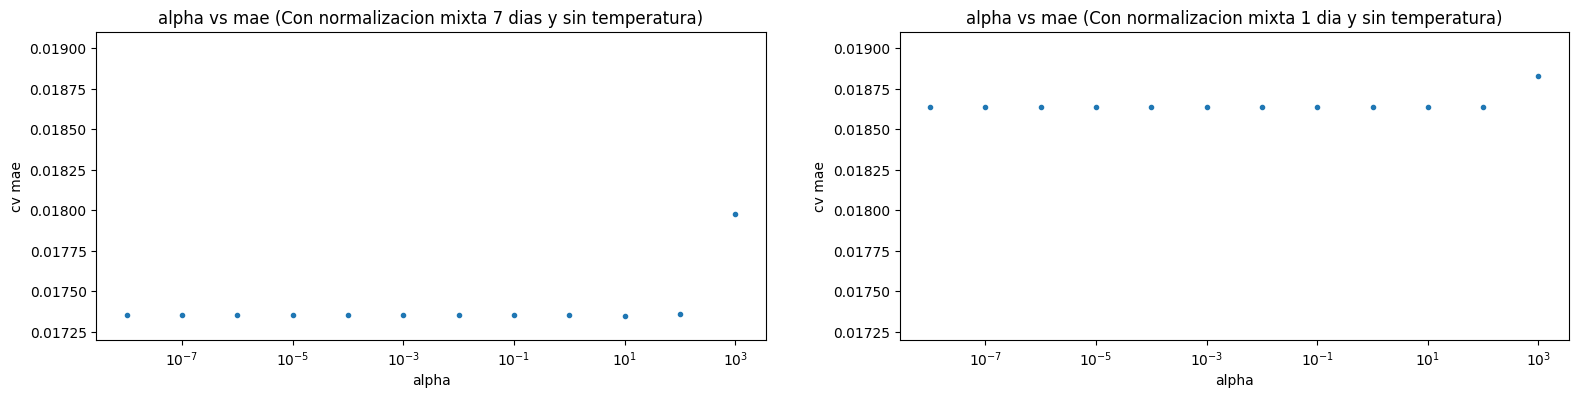

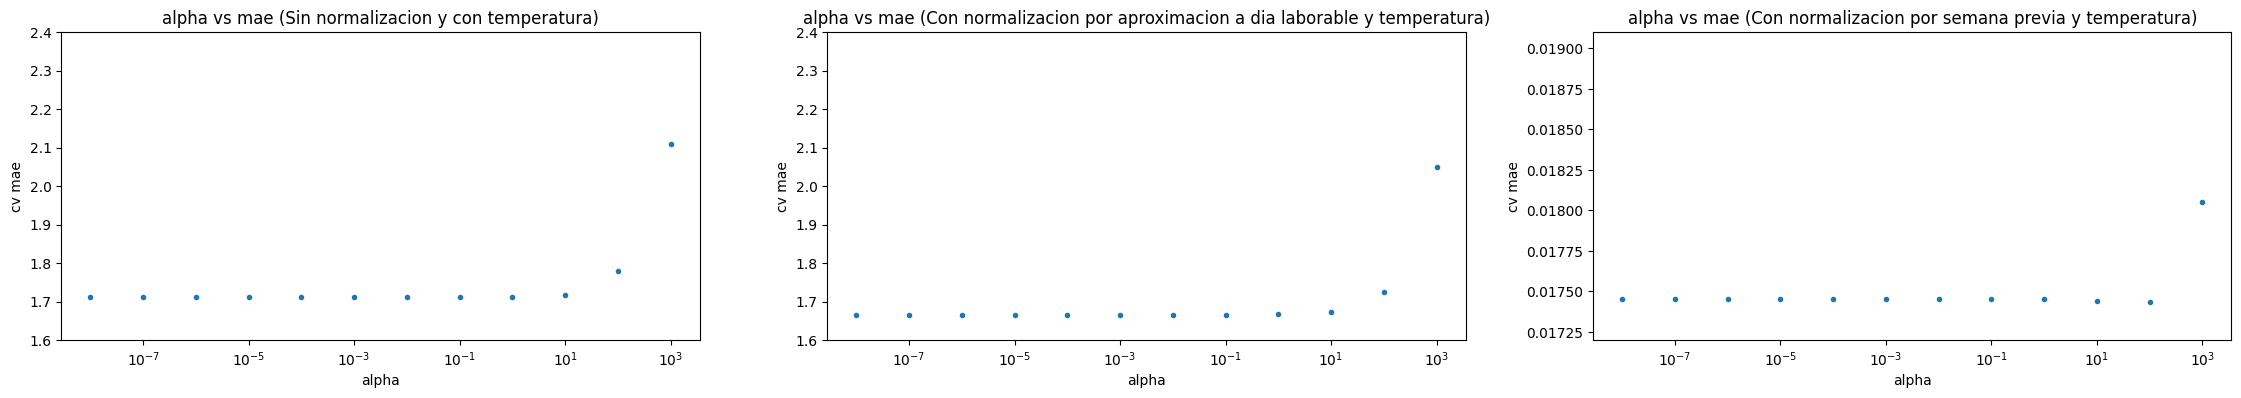

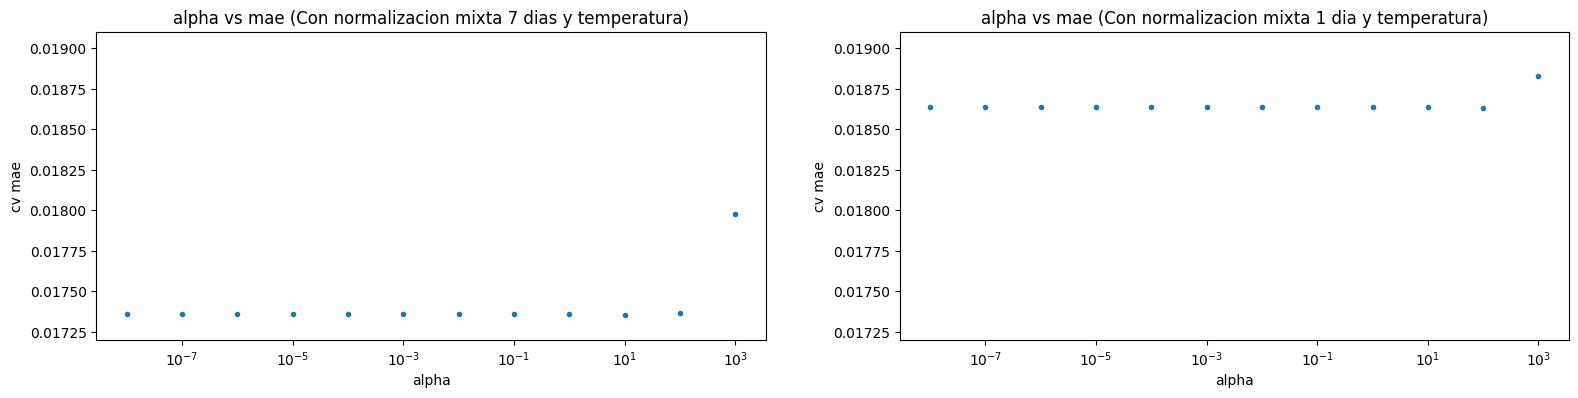

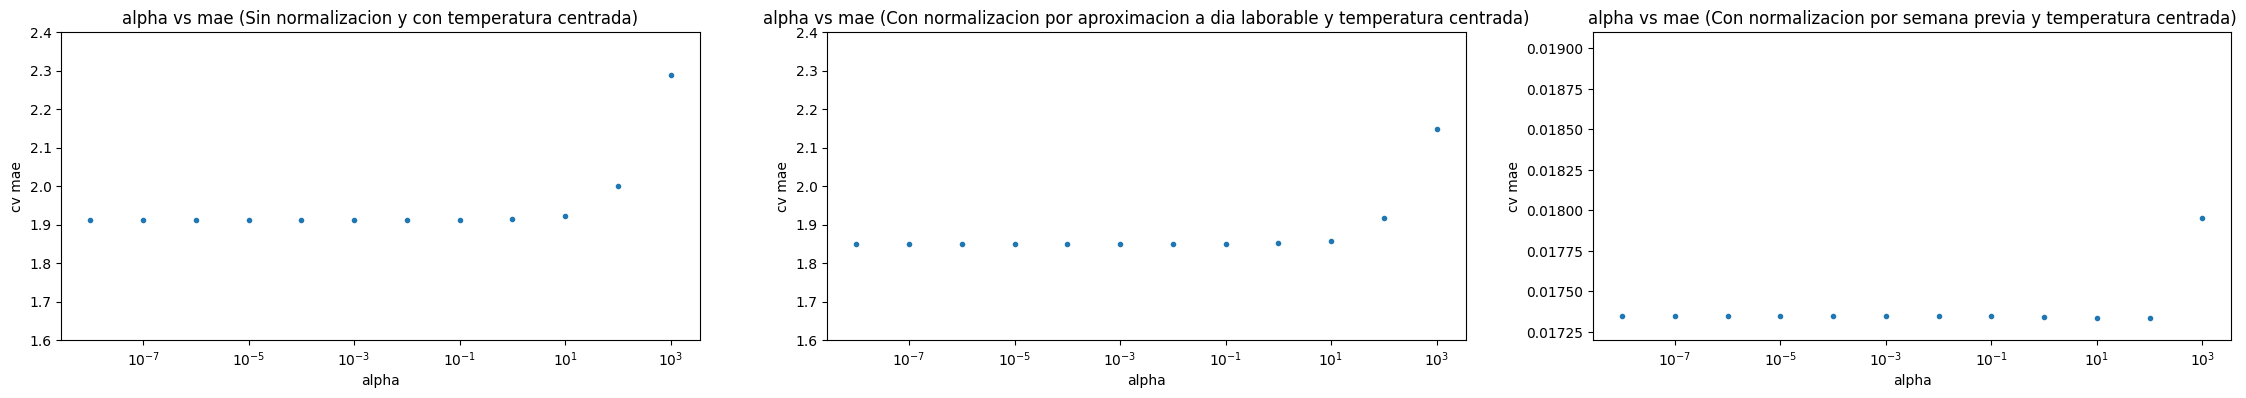

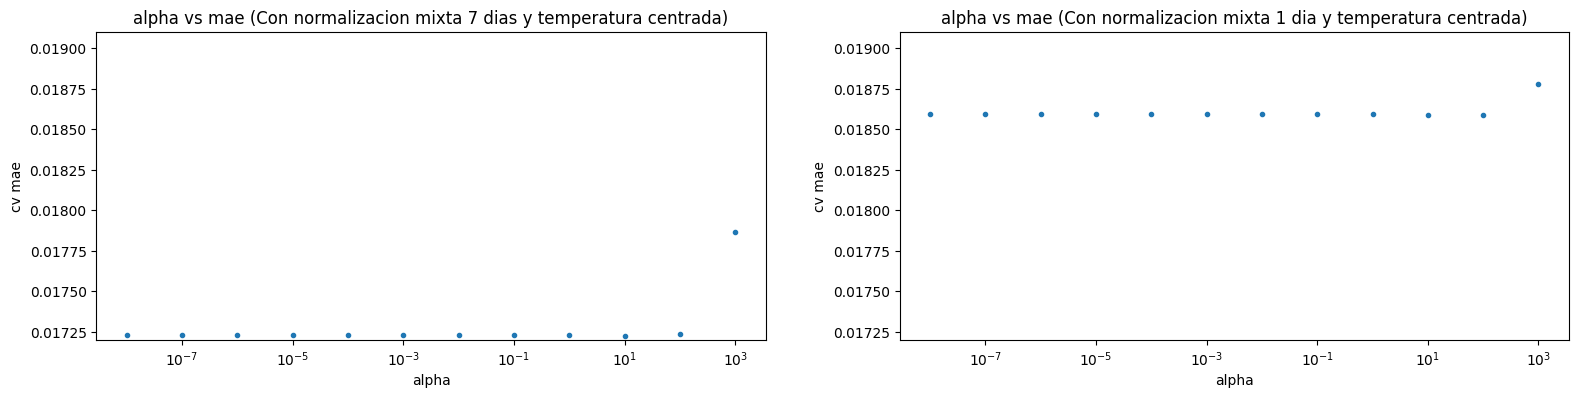

In [11]:
ancho = 28
alto = 4
plt.figure(figsize=(ancho,alto))

plt.subplot(1, 3, 1)
plt.title('alpha vs mae (Sin normalizacion ni temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_0Sin['param_regressor__ridge__alpha'], -df_ridge_search_0Sin['mean_test_score'], '.')

plt.subplot(1, 3, 2)
plt.title('alpha vs mae (Con normalizacion por aproximacion a dia laborable y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_1Sin['param_regressor__ridge__alpha'], -df_ridge_search_1Sin['mean_test_score'], '.')

plt.subplot(1, 3, 3)
plt.title('alpha vs mae (Con normalizacion por semana previa y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_2Sin['param_regressor__ridge__alpha'], -df_ridge_search_2Sin['mean_test_score'], '.')

plt.show()

ancho = 19
plt.figure(figsize=(ancho,alto))

plt.subplot(1, 2, 1)
plt.title('alpha vs mae (Con normalizacion mixta 7 dias y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_37Sin['param_regressor__ridge__alpha'], -df_ridge_search_37Sin['mean_test_score'], '.')

plt.subplot(1, 2, 2)
plt.title('alpha vs mae (Con normalizacion mixta 1 dia y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_31Sin['param_regressor__ridge__alpha'], -df_ridge_search_31Sin['mean_test_score'], '.')

plt.show()


ancho = 28
plt.figure(figsize=(ancho,alto))

plt.subplot(1, 3, 1)
plt.title('alpha vs mae (Sin normalizacion y con temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_0Con['param_regressor__ridge__alpha'], -df_ridge_search_0Con['mean_test_score'], '.')

plt.subplot(1, 3, 2)
plt.title('alpha vs mae (Con normalizacion por aproximacion a dia laborable y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_1Con['param_regressor__ridge__alpha'], -df_ridge_search_1Con['mean_test_score'], '.')

plt.subplot(1, 3, 3)
plt.title('alpha vs mae (Con normalizacion por semana previa y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_2Con['param_regressor__ridge__alpha'], -df_ridge_search_2Con['mean_test_score'], '.')

plt.show()

ancho = 19
plt.figure(figsize=(ancho,alto))

plt.subplot(1, 2, 1)
plt.title('alpha vs mae (Con normalizacion mixta 7 dias y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_37Con['param_regressor__ridge__alpha'], -df_ridge_search_37Con['mean_test_score'], '.')

plt.subplot(1, 2, 2)
plt.title('alpha vs mae (Con normalizacion mixta 1 dia y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_31Con['param_regressor__ridge__alpha'], -df_ridge_search_31Con['mean_test_score'], '.')

plt.show()


ancho = 28
plt.figure(figsize=(ancho,alto))

plt.subplot(1, 3, 1)
plt.title('alpha vs mae (Sin normalizacion y con temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_0ConCen['param_regressor__ridge__alpha'], -df_ridge_search_0ConCen['mean_test_score'], '.')

plt.subplot(1, 3, 2)
plt.title('alpha vs mae (Con normalizacion por aproximacion a dia laborable y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_1ConCen['param_regressor__ridge__alpha'], -df_ridge_search_1ConCen['mean_test_score'], '.')

plt.subplot(1, 3, 3)
plt.title('alpha vs mae (Con normalizacion por semana previa y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_2ConCen['param_regressor__ridge__alpha'], -df_ridge_search_2ConCen['mean_test_score'], '.')

plt.show()

ancho = 19
plt.figure(figsize=(ancho,alto))

plt.subplot(1, 2, 1)
plt.title('alpha vs mae (Con normalizacion mixta 7 dias y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_37ConCen['param_regressor__ridge__alpha'], -df_ridge_search_37ConCen['mean_test_score'], '.')

plt.subplot(1, 2, 2)
plt.title('alpha vs mae (Con normalizacion mixta 1 dia y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_31ConCen['param_regressor__ridge__alpha'], -df_ridge_search_31ConCen['mean_test_score'], '.')

plt.show()

Y se obtienen los mejores estimadores de cada conjunto de datos.

In [12]:
estimador_0Sin = cv_estimator_0Sin.best_estimator_
estimador_1Sin = cv_estimator_1Sin.best_estimator_
estimador_2Sin = cv_estimator_2Sin.best_estimator_
estimador_37Sin = cv_estimator_37Sin.best_estimator_
estimador_31Sin = cv_estimator_31Sin.best_estimator_
estimador_0Con = cv_estimator_0Con.best_estimator_
estimador_1Con = cv_estimator_1Con.best_estimator_
estimador_2Con = cv_estimator_2Con.best_estimator_
estimador_37Con = cv_estimator_37Con.best_estimator_
estimador_31Con = cv_estimator_31Con.best_estimator_
estimador_0ConCen = cv_estimator_0ConCen.best_estimator_
estimador_1ConCen = cv_estimator_1ConCen.best_estimator_
estimador_2ConCen = cv_estimator_2ConCen.best_estimator_
estimador_37ConCen = cv_estimator_37ConCen.best_estimator_
estimador_31ConCen = cv_estimator_31ConCen.best_estimator_

### Scores

Resultados de los scores de los distintos estimadores. Primero se leen los datos de la normalización, necesarios para la desnormalización de los datos previstos para la medición de los scores.

In [13]:
medias_festivos = lee_datos_normalizacion("festivos")
medias_laborables = lee_datos_normalizacion("laborables")
medias_sabados = lee_datos_normalizacion("sabados")

In [14]:
auxTest = yTest.T.tolist()
auxPersistencia = yPersistencia.T.tolist()
auxREE = yPrevision.T.tolist()
preds = pd.DataFrame()
for i in range(len(auxTest)):
    claveTest = "yTest_{}".format(i)
    clavePersistencia = "yPersistencia_{}".format(i)
    claveREE = "yREE_{}".format(i)
    preds[claveTest] = auxTest[i]
    preds[clavePersistencia] = auxPersistencia[i]
    preds[claveREE] = auxREE[i]
preds.to_csv(path_or_buf="preds.csv", sep=";", encoding="utf-8")

In [15]:
scores_0Sin = score0(estimador_0Sin, XTest0Sin, yTest, "RR0Sin")
scores_1Sin = score1(estimador_1Sin, XTest1Sin, yTest, data, medias_laborables, medias_festivos, medias_sabados, "RR1Sin")
scores_2Sin = score2(estimador_2Sin, XTest2Sin, yTest, data, "RR2Sin")
scores_37Sin = score3x(estimador_37Sin, XTest37Sin, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "RR37Sin")
scores_31Sin = score3x(estimador_31Sin, XTest31Sin, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "RR31Sin")
scores_0Con = score0(estimador_0Con, XTest0Con, yTest, "RR0Con")
scores_1Con = score1(estimador_1Con, XTest1Con, yTest, data, medias_laborables, medias_festivos, medias_sabados, "RR1Con")
scores_2Con = score2(estimador_2Con, XTest2Con, yTest, data, "RR2Con")
scores_37Con = score3x(estimador_37Con, XTest37Con, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "RR37Con")
scores_31Con = score3x(estimador_31Con, XTest31Con, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "RR31Con")
scores_0ConCen = score0(estimador_0ConCen, XTest0ConCen, yTest, "RR0ConCen")
scores_1ConCen = score1(estimador_1ConCen, XTest1ConCen, yTest, data, medias_laborables, medias_festivos, medias_sabados, "RR1ConCen")
scores_2ConCen = score2(estimador_2ConCen, XTest2ConCen, yTest, data, "RR2ConCen")
scores_37ConCen = score3x(estimador_37ConCen, XTest37ConCen, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "RR37ConCen")
scores_31ConCen = score3x(estimador_31ConCen, XTest31ConCen, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "RR31ConCen")

scores_persistencia = mean_absolute_error(yTest, yPersistencia, multioutput='raw_values').tolist()
scores_prediccion = mean_absolute_error(yTest, yPrevision, multioutput='raw_values').tolist()

Y los resultados calculados se mostrarán en las siguientes tablas.

In [16]:
nombres = ['Sin normalizacion', 
           'Con normalizacion por aproximacion a dia laborable', 
           'Con normalizacion por semana previa',
           'Con normalizacion mixta 7 dias',
           'Con normalizacion mixta 1 dia']

sin_temperatura = []
con_temperatura = []
con_temperatura_centrada = []
for i in range(horas_delante):
    sin_temperatura.append([])
    sin_temperatura[i].append(scores_0Sin[i])
    sin_temperatura[i].append(scores_1Sin[i])
    sin_temperatura[i].append(scores_2Sin[i])
    sin_temperatura[i].append(scores_37Sin[i])
    sin_temperatura[i].append(scores_31Sin[i])

    con_temperatura.append([])
    con_temperatura[i].append(scores_0Con[i])
    con_temperatura[i].append(scores_1Con[i])
    con_temperatura[i].append(scores_2Con[i])
    con_temperatura[i].append(scores_37Con[i])
    con_temperatura[i].append(scores_31Con[i])

    con_temperatura_centrada.append([])
    con_temperatura_centrada[i].append(scores_0ConCen[i])
    con_temperatura_centrada[i].append(scores_1ConCen[i])
    con_temperatura_centrada[i].append(scores_2ConCen[i])
    con_temperatura_centrada[i].append(scores_37ConCen[i])
    con_temperatura_centrada[i].append(scores_31ConCen[i])

scores = []
for i in range(horas_delante):
    scores.append(pd.DataFrame({'Nombres': nombres, 
                                'Sin temperatura': sin_temperatura[i], 
                                'Con temperatura': con_temperatura[i], 
                                'Con temperatura centrada': con_temperatura_centrada[i]}))

In [17]:
print('SCORES PRIMERA HORA:')
print('Persistencia: {}'.format(scores_persistencia[0]))
print('Prevision REE: {}'.format(scores_prediccion[0]))
scores[0]

SCORES PRIMERA HORA:
Persistencia: 0.940542781972088
Prevision REE: 0.2343971631205674


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.573889   
1  Con normalizacion por aproximacion a dia labor...         0.601519   
2                Con normalizacion por semana previa         0.296335   
3                     Con normalizacion mixta 7 dias         0.298740   
4                      Con normalizacion mixta 1 dia         0.313337   

   Con temperatura  Con temperatura centrada  
0         0.570408                  0.566618  
1         0.583181                  0.595657  
2         0.296227                  0.295813  
3         0.298563                  0.298064  
4         0.313324                  0.313316

In [18]:
print('SCORES SEGUNDA HORA:')
print('Persistencia: {}'.format(scores_persistencia[1]))
scores[1]

SCORES SEGUNDA HORA:
Persistencia: 1.7705314573324182


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.201177   
1  Con normalizacion por aproximacion a dia labor...         1.232330   
2                Con normalizacion por semana previa         0.414578   
3                     Con normalizacion mixta 7 dias         0.418952   
4                      Con normalizacion mixta 1 dia         0.440719   

   Con temperatura  Con temperatura centrada  
0         1.183415                  1.178389  
1         1.164693                  1.214852  
2         0.414415                  0.412759  
3         0.418771                  0.416927  
4         0.440670                  0.439886

In [19]:
print('SCORES TERCERA HORA:')
print('Persistencia: {}'.format(scores_persistencia[2]))
scores[2]

SCORES TERCERA HORA:
Persistencia: 2.491478609013953


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.821275   
1  Con normalizacion por aproximacion a dia labor...         1.816934   
2                Con normalizacion por semana previa         0.503844   
3                     Con normalizacion mixta 7 dias         0.507660   
4                      Con normalizacion mixta 1 dia         0.523520   

   Con temperatura  Con temperatura centrada  
0         1.751826                  1.773235  
1         1.678672                  1.785851  
2         0.503437                  0.500448  
3         0.507234                  0.504178  
4         0.523346                  0.522217

In [20]:
print('SCORES CUARTA HORA:')
print('Persistencia: {}'.format(scores_persistencia[3]))
scores[3]

SCORES CUARTA HORA:
Persistencia: 3.0877304964538976


Nombres  Sin temperatura  \
0                                  Sin normalizacion         2.355818   
1  Con normalizacion por aproximacion a dia labor...         2.308091   
2                Con normalizacion por semana previa         0.576108   
3                     Con normalizacion mixta 7 dias         0.575491   
4                      Con normalizacion mixta 1 dia         0.576394   

   Con temperatura  Con temperatura centrada  
0         2.207570                  2.267927  
1         2.077772                  2.252664  
2         0.575420                  0.571668  
3         0.574975                  0.570302  
4         0.576183                  0.574908

In [21]:
print('SCORES QUINTA HORA:')
print('Persistencia: {}'.format(scores_persistencia[4]))
scores[4]

SCORES QUINTA HORA:
Persistencia: 3.5760843056508893


Nombres  Sin temperatura  \
0                                  Sin normalizacion         2.732726   
1  Con normalizacion por aproximacion a dia labor...         2.643042   
2                Con normalizacion por semana previa         0.630047   
3                     Con normalizacion mixta 7 dias         0.625101   
4                      Con normalizacion mixta 1 dia         0.612958   

   Con temperatura  Con temperatura centrada  
0         2.518127                  2.616134  
1         2.336060                  2.570816  
2         0.629404                  0.624047  
3         0.624630                  0.618327  
4         0.612724                  0.611345

In [22]:
print('SCORES SEXTA HORA:')
print('Persistencia: {}'.format(scores_persistencia[5]))
scores[5]

SCORES SEXTA HORA:
Persistencia: 3.949588538091953


Nombres  Sin temperatura  \
0                                  Sin normalizacion         2.948505   
1  Con normalizacion por aproximacion a dia labor...         2.817776   
2                Con normalizacion por semana previa         0.671697   
3                     Con normalizacion mixta 7 dias         0.665678   
4                      Con normalizacion mixta 1 dia         0.644519   

   Con temperatura  Con temperatura centrada  
0         2.665457                  2.812382  
1         2.441388                  2.728622  
2         0.670759                  0.664578  
3         0.665005                  0.657380  
4         0.644134                  0.642974

### Curvas realidad-predicción

Para obtener una idea más visual de los resultados, se muestran a continuación las curvas realidad-predicción de las estimaciones del primer horizonte realizadas por los estimadores para todos los casos de normalización y temperaturas.

Estas curvas enfrentan en el eje X el valor real de demanda contra el eje Y que muestra el valor predicho, para cada momento sobre el que se predice.

In [23]:
preds = pd.read_csv('preds.csv', sep=';', index_col=0)

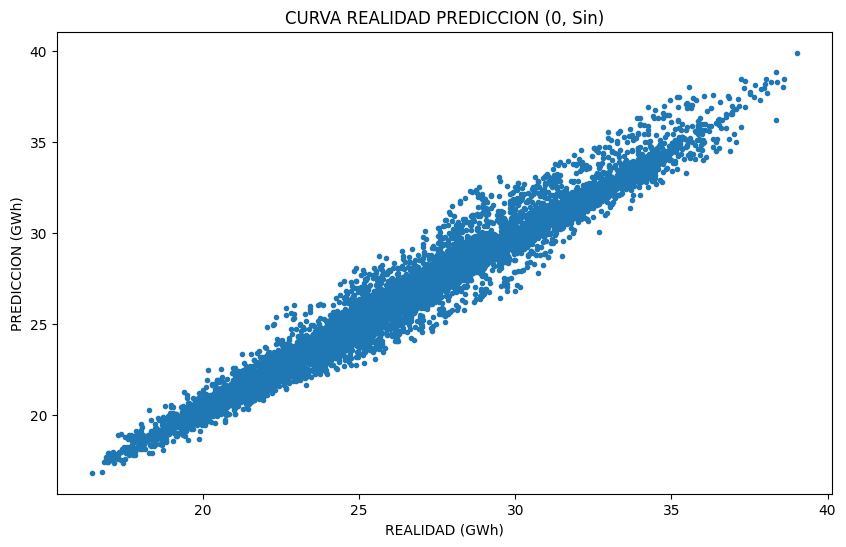

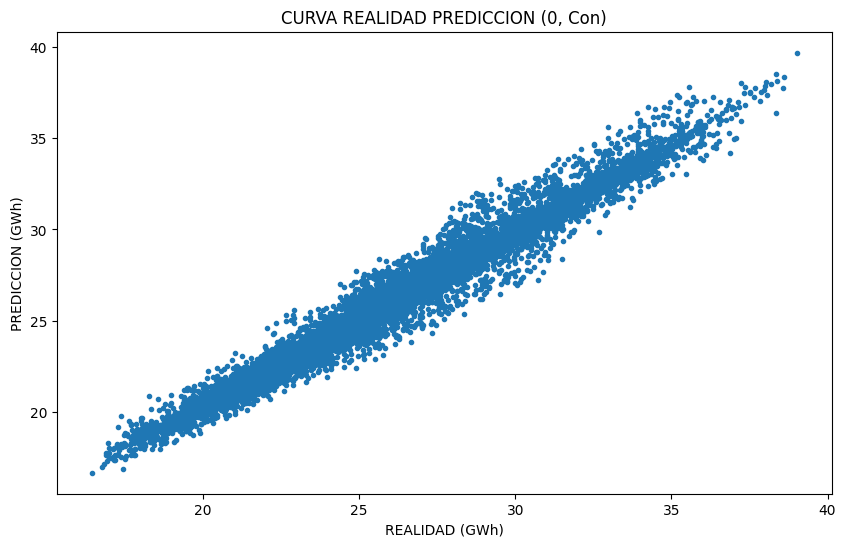

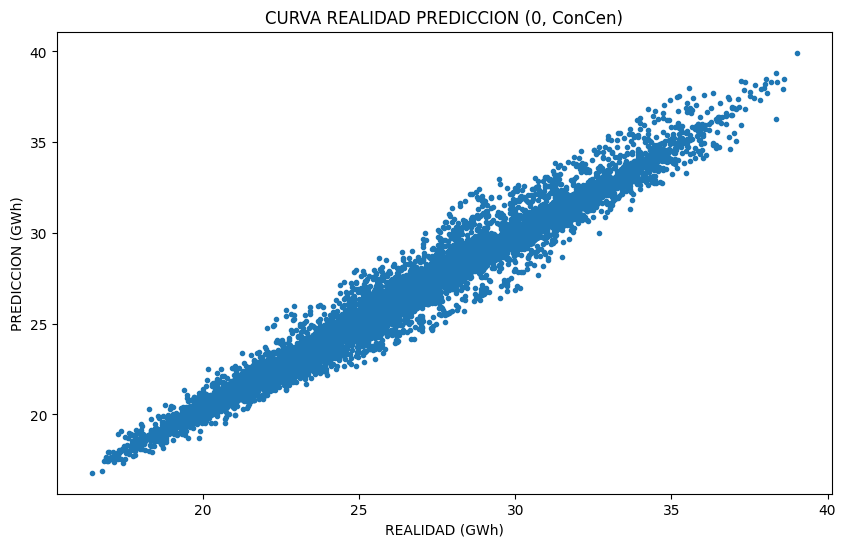

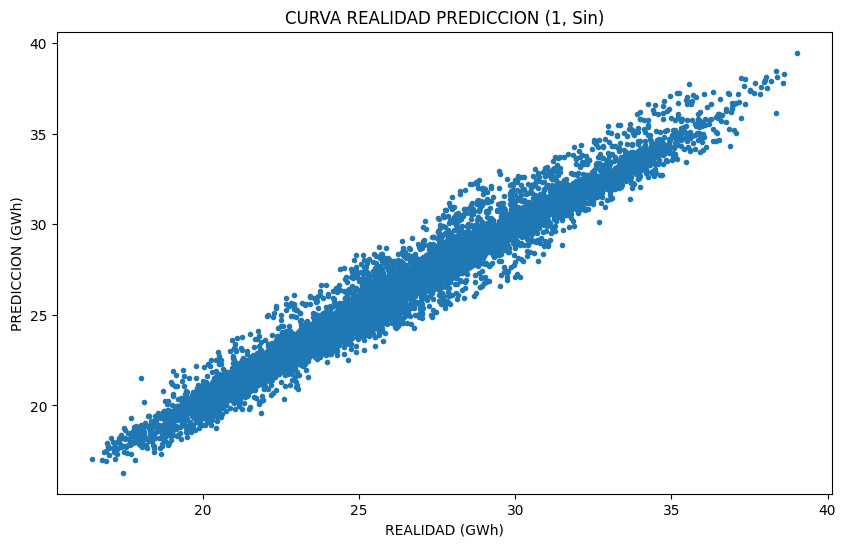

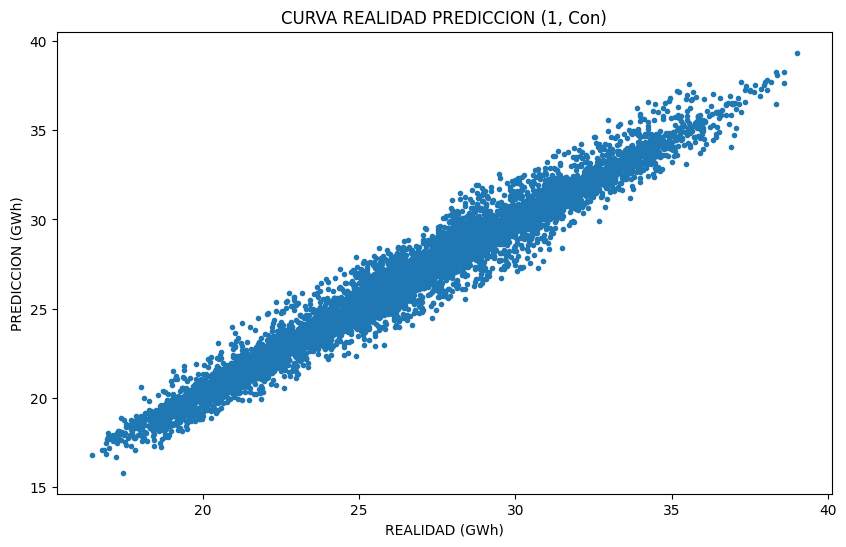

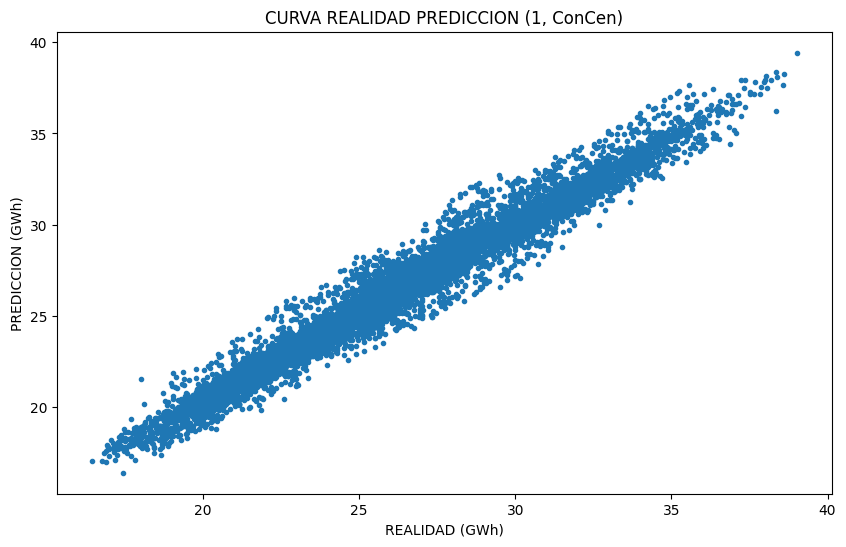

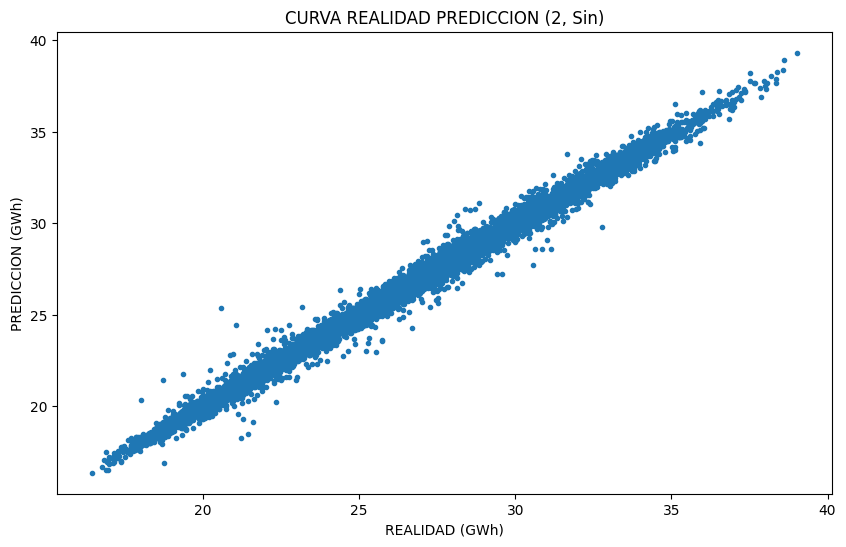

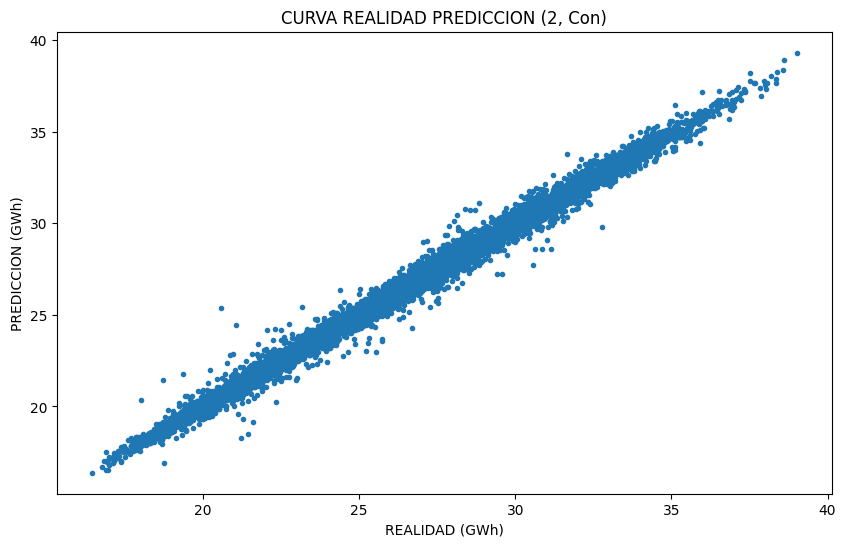

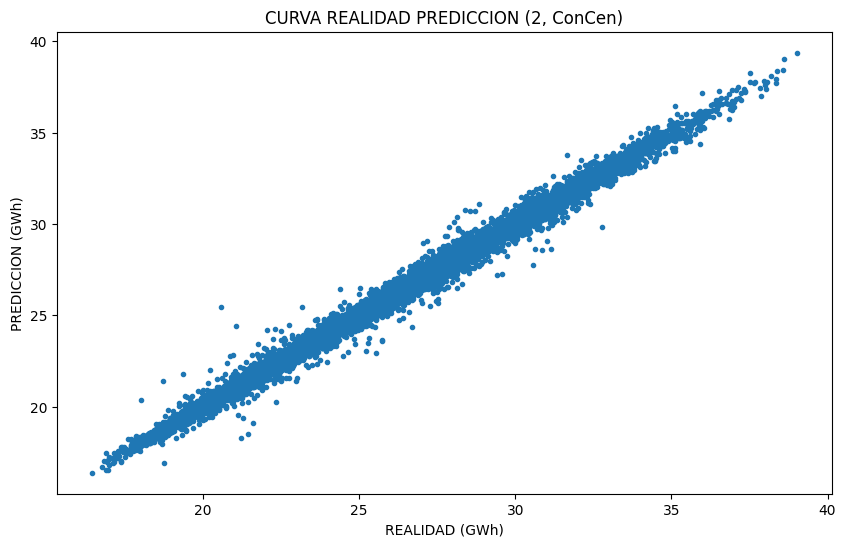

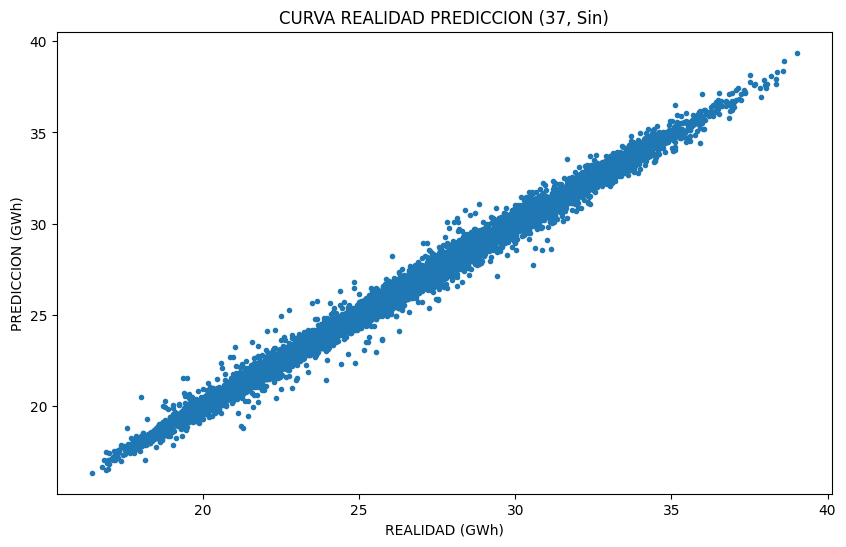

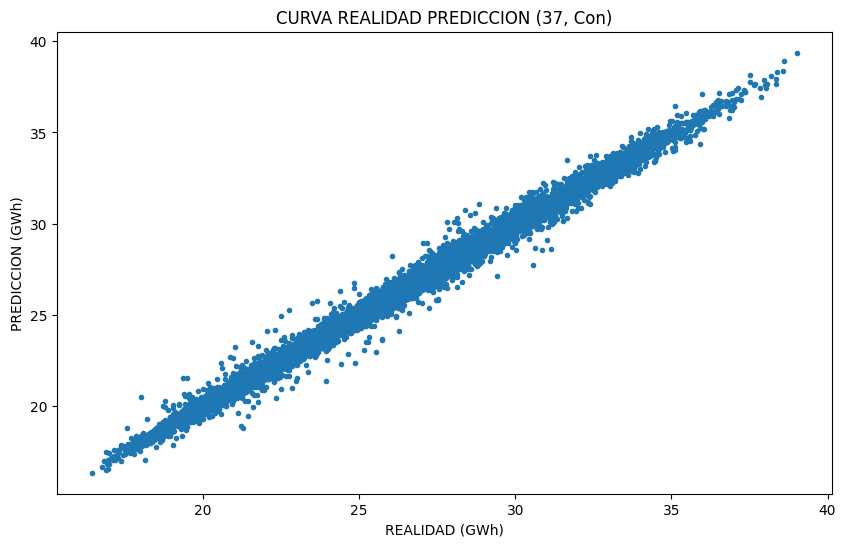

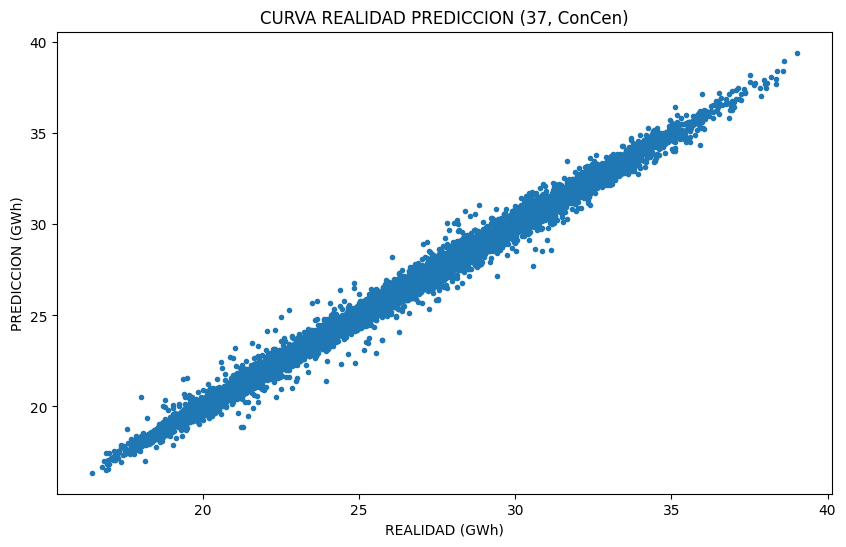

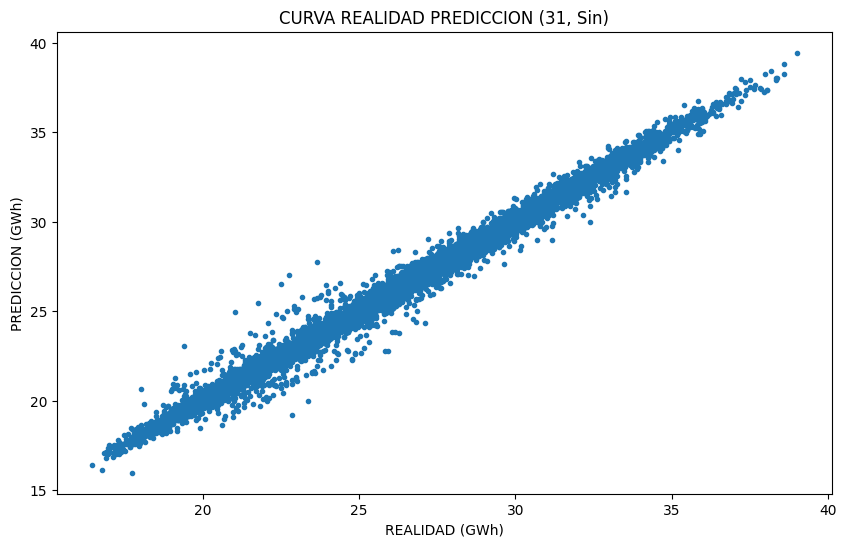

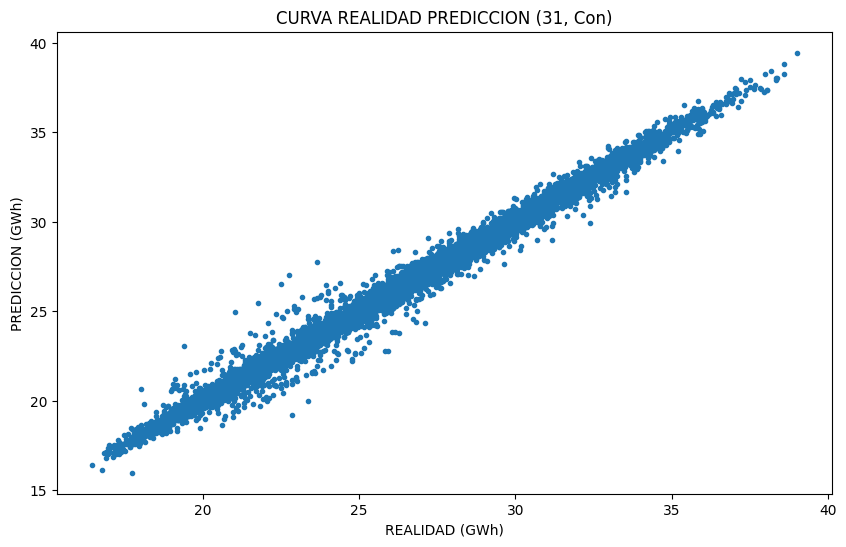

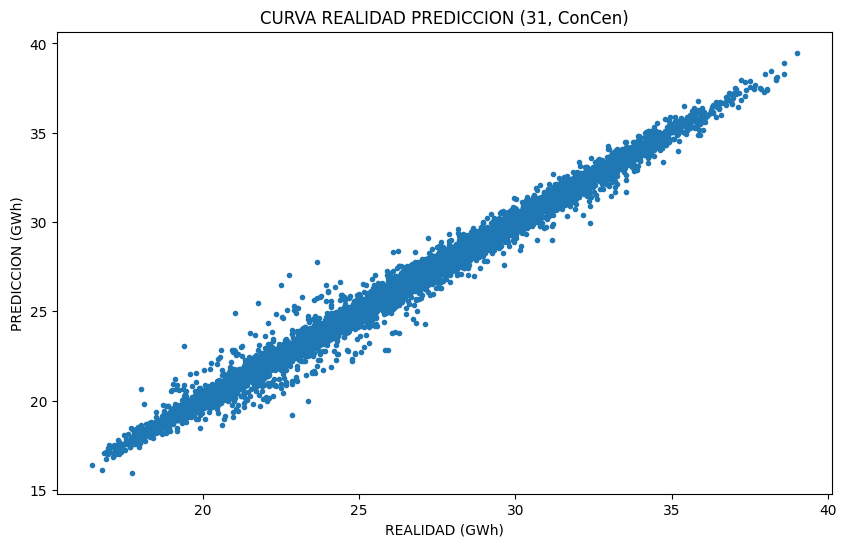

In [24]:
ancho = 10
alto = 6

for norm in [0, 1, 2, 37, 31]:
    for temp in ["Sin", "Con", "ConCen"]:
        clave = "RR{}{}_0".format(norm, temp)
        plt.figure(figsize=(ancho,alto))
        plt.plot(preds["yTest_0"], preds[clave], ".")
        plt.title("CURVA REALIDAD PREDICCION ({}, {})".format(norm, temp))
        plt.xlabel("REALIDAD (GWh)")
        plt.ylabel("PREDICCION (GWh)")
        plt.show()

## Multilayer Perceptrons

### Hiperparametrización

Las MLPs tienen como único hiperparámetro *alpha*. También se probarán dos configuraciones de capas ocultas.

In [2]:
l_alpha = [10**k for k in range(-8, 4)]
l_hidden_layer_sizes = [(100,), (100,20,)]
param_grid = {'regressor__mlp__alpha': l_alpha,
              'regressor__mlp__hidden_layer_sizes': l_hidden_layer_sizes}

In [30]:
cv_estimator_0Sin = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining0Sin, yTraining0Sin, '0Sin')
cv_estimator_1Sin = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining1Sin, yTraining1Sin, '1Sin')
cv_estimator_2Sin = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining2Sin, yTraining2Sin, '2Sin')
cv_estimator_37Sin = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining37Sin, yTraining37Sin, '37Sin')
cv_estimator_31Sin = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining31Sin, yTraining31Sin, '31Sin')
cv_estimator_0Con = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining0Con, yTraining0Con, '0Con')
cv_estimator_1Con = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining1Con, yTraining1Con, '1Con')
cv_estimator_2Con = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining2Con, yTraining2Con, '2Con')
cv_estimator_37Con = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining37Con, yTraining37Con, '37Con')
cv_estimator_31Con = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining31Con, yTraining31Con, '31Con')
cv_estimator_0ConCen = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining0ConCen, yTraining0ConCen, '0ConCen')
cv_estimator_1ConCen = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining1ConCen, yTraining1ConCen, '1ConCen')
cv_estimator_2ConCen = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining2ConCen, yTraining2ConCen, '2ConCen')
cv_estimator_37ConCen = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining37ConCen, yTraining37ConCen, '37ConCen')
cv_estimator_31ConCen = hiperparametriza_estimador(MLPRegressor(max_iter=5000), 'mlp', param_grid, XTraining31ConCen, yTraining31ConCen, '31ConCen')

In [3]:
cv_estimator_0Sin = joblib.load("estimadores/mlp/est_0Sin.pkl")
cv_estimator_1Sin = joblib.load("estimadores/mlp/est_1Sin.pkl")
cv_estimator_2Sin = joblib.load("estimadores/mlp/est_2Sin.pkl")
cv_estimator_37Sin = joblib.load("estimadores/mlp/est_37Sin.pkl")
cv_estimator_31Sin = joblib.load("estimadores/mlp/est_31Sin.pkl")
cv_estimator_0Con = joblib.load("estimadores/mlp/est_0Con.pkl")
cv_estimator_1Con = joblib.load("estimadores/mlp/est_1Con.pkl")
cv_estimator_2Con = joblib.load("estimadores/mlp/est_2Con.pkl")
cv_estimator_37Con = joblib.load("estimadores/mlp/est_37Con.pkl")
cv_estimator_31Con = joblib.load("estimadores/mlp/est_31Con.pkl")
cv_estimator_0ConCen = joblib.load("estimadores/mlp/est_0ConCen.pkl")
cv_estimator_1ConCen = joblib.load("estimadores/mlp/est_1ConCen.pkl")
cv_estimator_2ConCen = joblib.load("estimadores/mlp/est_2ConCen.pkl")
cv_estimator_37ConCen = joblib.load("estimadores/mlp/est_37ConCen.pkl")
cv_estimator_31ConCen = joblib.load("estimadores/mlp/est_31ConCen.pkl")

In [4]:
df_mlp_search_0Sin = info_mejores_estimadores(cv_estimator_0Sin, param_grid)
df_mlp_search_1Sin = info_mejores_estimadores(cv_estimator_1Sin, param_grid)
df_mlp_search_2Sin = info_mejores_estimadores(cv_estimator_2Sin, param_grid)
df_mlp_search_37Sin = info_mejores_estimadores(cv_estimator_37Sin, param_grid)
df_mlp_search_31Sin = info_mejores_estimadores(cv_estimator_31Sin, param_grid)
df_mlp_search_0Con = info_mejores_estimadores(cv_estimator_0Con, param_grid)
df_mlp_search_1Con = info_mejores_estimadores(cv_estimator_1Con, param_grid)
df_mlp_search_2Con = info_mejores_estimadores(cv_estimator_2Con, param_grid)
df_mlp_search_37Con = info_mejores_estimadores(cv_estimator_37Con, param_grid)
df_mlp_search_31Con = info_mejores_estimadores(cv_estimator_31Con, param_grid)
df_mlp_search_0ConCen = info_mejores_estimadores(cv_estimator_0ConCen, param_grid)
df_mlp_search_1ConCen = info_mejores_estimadores(cv_estimator_1ConCen, param_grid)
df_mlp_search_2ConCen = info_mejores_estimadores(cv_estimator_2ConCen, param_grid)
df_mlp_search_37ConCen = info_mejores_estimadores(cv_estimator_37ConCen, param_grid)
df_mlp_search_31ConCen = info_mejores_estimadores(cv_estimator_31ConCen, param_grid)

Se plotean a continuación los resultados de la hiperparametrización.

In [5]:
df_0Sin1alpha = []
df_0Sin1score = []
df_0Sin2alpha = []
df_0Sin2score = []
df_1Sin1alpha = []
df_1Sin1score = []
df_1Sin2alpha = []
df_1Sin2score = []
df_2Sin1alpha = []
df_2Sin1score = []
df_2Sin2alpha = []
df_2Sin2score = []
df_37Sin1alpha = []
df_37Sin1score = []
df_37Sin2alpha = []
df_37Sin2score = []
df_31Sin1alpha = []
df_31Sin1score = []
df_31Sin2alpha = []
df_31Sin2score = []

for i in range(len(df_mlp_search_0Sin['mean_test_score'])):
    if df_mlp_search_0Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_0Sin1alpha.append(df_mlp_search_0Sin['param_regressor__mlp__alpha'][i])
        df_0Sin1score.append(-df_mlp_search_0Sin['mean_test_score'][i])
    elif df_mlp_search_0Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_0Sin2alpha.append(df_mlp_search_0Sin['param_regressor__mlp__alpha'][i])
        df_0Sin2score.append(-df_mlp_search_0Sin['mean_test_score'][i])
    
    if df_mlp_search_1Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_1Sin1alpha.append(df_mlp_search_1Sin['param_regressor__mlp__alpha'][i])
        df_1Sin1score.append(-df_mlp_search_1Sin['mean_test_score'][i])
    elif df_mlp_search_1Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_1Sin2alpha.append(df_mlp_search_1Sin['param_regressor__mlp__alpha'][i])
        df_1Sin2score.append(-df_mlp_search_1Sin['mean_test_score'][i])
    
    if df_mlp_search_2Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_2Sin1alpha.append(df_mlp_search_2Sin['param_regressor__mlp__alpha'][i])
        df_2Sin1score.append(-df_mlp_search_2Sin['mean_test_score'][i])
    elif df_mlp_search_2Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_2Sin2alpha.append(df_mlp_search_2Sin['param_regressor__mlp__alpha'][i])
        df_2Sin2score.append(-df_mlp_search_2Sin['mean_test_score'][i])
    
    if df_mlp_search_37Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_37Sin1alpha.append(df_mlp_search_37Sin['param_regressor__mlp__alpha'][i])
        df_37Sin1score.append(-df_mlp_search_37Sin['mean_test_score'][i])
    elif df_mlp_search_37Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_37Sin2alpha.append(df_mlp_search_37Sin['param_regressor__mlp__alpha'][i])
        df_37Sin2score.append(-df_mlp_search_37Sin['mean_test_score'][i])
    
    if df_mlp_search_31Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_31Sin1alpha.append(df_mlp_search_31Sin['param_regressor__mlp__alpha'][i])
        df_31Sin1score.append(-df_mlp_search_31Sin['mean_test_score'][i])
    elif df_mlp_search_31Sin['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_31Sin2alpha.append(df_mlp_search_31Sin['param_regressor__mlp__alpha'][i])
        df_31Sin2score.append(-df_mlp_search_31Sin['mean_test_score'][i])

In [6]:
df_0Con1alpha = []
df_0Con1score = []
df_0Con2alpha = []
df_0Con2score = []
df_1Con1alpha = []
df_1Con1score = []
df_1Con2alpha = []
df_1Con2score = []
df_2Con1alpha = []
df_2Con1score = []
df_2Con2alpha = []
df_2Con2score = []
df_37Con1alpha = []
df_37Con1score = []
df_37Con2alpha = []
df_37Con2score = []
df_31Con1alpha = []
df_31Con1score = []
df_31Con2alpha = []
df_31Con2score = []

for i in range(len(df_mlp_search_0Con['mean_test_score'])):
    if df_mlp_search_0Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_0Con1alpha.append(df_mlp_search_0Con['param_regressor__mlp__alpha'][i])
        df_0Con1score.append(-df_mlp_search_0Con['mean_test_score'][i])
    elif df_mlp_search_0Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_0Con2alpha.append(df_mlp_search_0Con['param_regressor__mlp__alpha'][i])
        df_0Con2score.append(-df_mlp_search_0Con['mean_test_score'][i])
    
    if df_mlp_search_1Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_1Con1alpha.append(df_mlp_search_1Con['param_regressor__mlp__alpha'][i])
        df_1Con1score.append(-df_mlp_search_1Con['mean_test_score'][i])
    elif df_mlp_search_1Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_1Con2alpha.append(df_mlp_search_1Con['param_regressor__mlp__alpha'][i])
        df_1Con2score.append(-df_mlp_search_1Con['mean_test_score'][i])
    
    if df_mlp_search_2Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_2Con1alpha.append(df_mlp_search_2Con['param_regressor__mlp__alpha'][i])
        df_2Con1score.append(-df_mlp_search_2Con['mean_test_score'][i])
    elif df_mlp_search_2Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_2Con2alpha.append(df_mlp_search_2Con['param_regressor__mlp__alpha'][i])
        df_2Con2score.append(-df_mlp_search_2Con['mean_test_score'][i])
    
    if df_mlp_search_37Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_37Con1alpha.append(df_mlp_search_37Con['param_regressor__mlp__alpha'][i])
        df_37Con1score.append(-df_mlp_search_37Con['mean_test_score'][i])
    elif df_mlp_search_37Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_37Con2alpha.append(df_mlp_search_37Con['param_regressor__mlp__alpha'][i])
        df_37Con2score.append(-df_mlp_search_37Con['mean_test_score'][i])
    
    if df_mlp_search_31Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_31Con1alpha.append(df_mlp_search_31Con['param_regressor__mlp__alpha'][i])
        df_31Con1score.append(-df_mlp_search_31Con['mean_test_score'][i])
    elif df_mlp_search_31Con['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_31Con2alpha.append(df_mlp_search_31Con['param_regressor__mlp__alpha'][i])
        df_31Con2score.append(-df_mlp_search_31Con['mean_test_score'][i])

In [7]:
df_0ConCen1alpha = []
df_0ConCen1score = []
df_0ConCen2alpha = []
df_0ConCen2score = []
df_1ConCen1alpha = []
df_1ConCen1score = []
df_1ConCen2alpha = []
df_1ConCen2score = []
df_2ConCen1alpha = []
df_2ConCen1score = []
df_2ConCen2alpha = []
df_2ConCen2score = []
df_37ConCen1alpha = []
df_37ConCen1score = []
df_37ConCen2alpha = []
df_37ConCen2score = []
df_31ConCen1alpha = []
df_31ConCen1score = []
df_31ConCen2alpha = []
df_31ConCen2score = []

for i in range(len(df_mlp_search_0ConCen['mean_test_score'])):
    if df_mlp_search_0ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_0ConCen1alpha.append(df_mlp_search_0ConCen['param_regressor__mlp__alpha'][i])
        df_0ConCen1score.append(-df_mlp_search_0ConCen['mean_test_score'][i])
    elif df_mlp_search_0ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_0ConCen2alpha.append(df_mlp_search_0ConCen['param_regressor__mlp__alpha'][i])
        df_0ConCen2score.append(-df_mlp_search_0ConCen['mean_test_score'][i])
    
    if df_mlp_search_1ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_1ConCen1alpha.append(df_mlp_search_1ConCen['param_regressor__mlp__alpha'][i])
        df_1ConCen1score.append(-df_mlp_search_1ConCen['mean_test_score'][i])
    elif df_mlp_search_1ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_1ConCen2alpha.append(df_mlp_search_1ConCen['param_regressor__mlp__alpha'][i])
        df_1ConCen2score.append(-df_mlp_search_1ConCen['mean_test_score'][i])
    
    if df_mlp_search_2ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_2ConCen1alpha.append(df_mlp_search_2ConCen['param_regressor__mlp__alpha'][i])
        df_2ConCen1score.append(-df_mlp_search_2ConCen['mean_test_score'][i])
    elif df_mlp_search_2ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_2ConCen2alpha.append(df_mlp_search_2ConCen['param_regressor__mlp__alpha'][i])
        df_2ConCen2score.append(-df_mlp_search_2ConCen['mean_test_score'][i])
    
    if df_mlp_search_37ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_37ConCen1alpha.append(df_mlp_search_37ConCen['param_regressor__mlp__alpha'][i])
        df_37ConCen1score.append(-df_mlp_search_37ConCen['mean_test_score'][i])
    elif df_mlp_search_37ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_37ConCen2alpha.append(df_mlp_search_37ConCen['param_regressor__mlp__alpha'][i])
        df_37ConCen2score.append(-df_mlp_search_37ConCen['mean_test_score'][i])
    
    if df_mlp_search_31ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,):
        df_31ConCen1alpha.append(df_mlp_search_31ConCen['param_regressor__mlp__alpha'][i])
        df_31ConCen1score.append(-df_mlp_search_31ConCen['mean_test_score'][i])
    elif df_mlp_search_31ConCen['param_regressor__mlp__hidden_layer_sizes'][i] == (100,20):
        df_31ConCen2alpha.append(df_mlp_search_31ConCen['param_regressor__mlp__alpha'][i])
        df_31ConCen2score.append(-df_mlp_search_31ConCen['mean_test_score'][i])

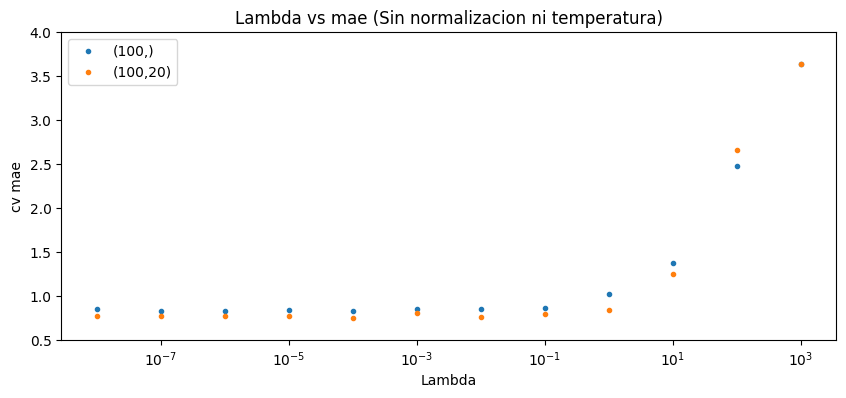

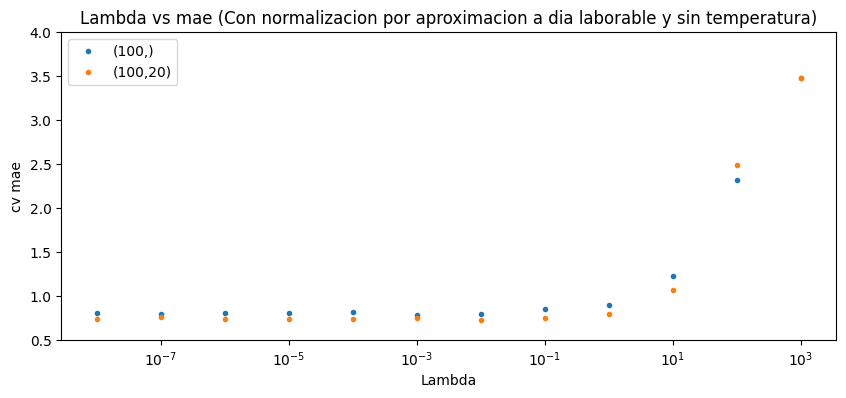

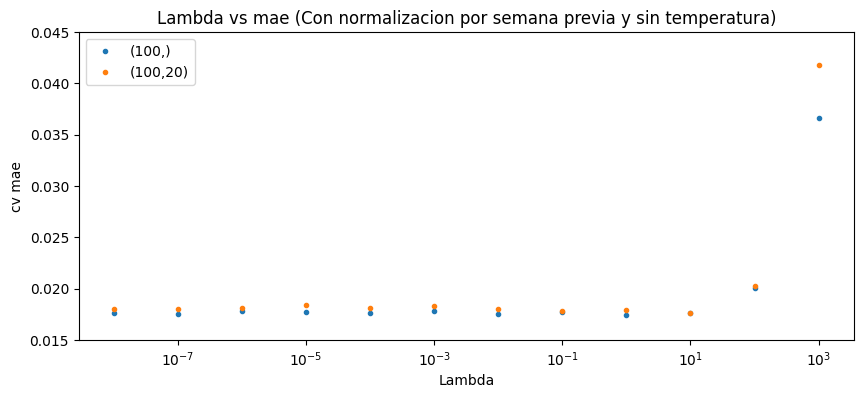

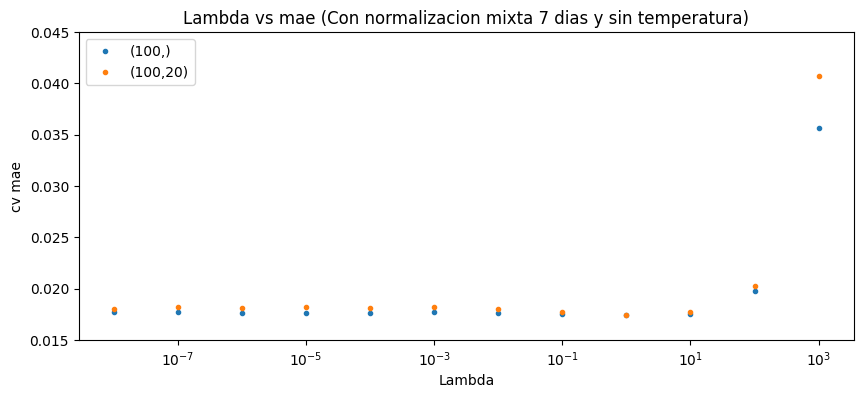

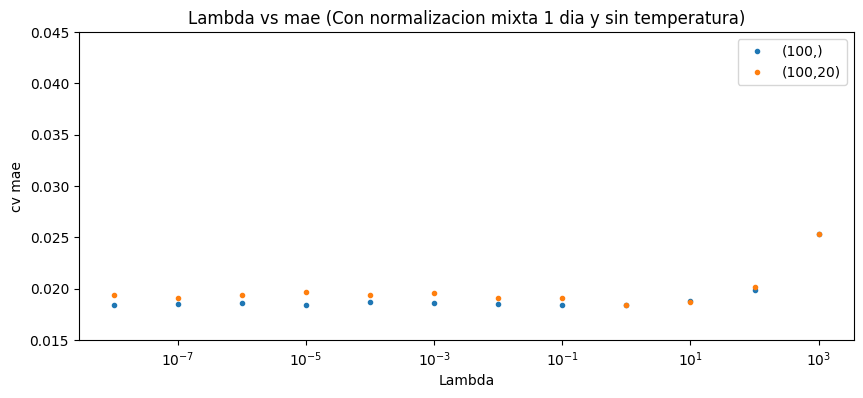

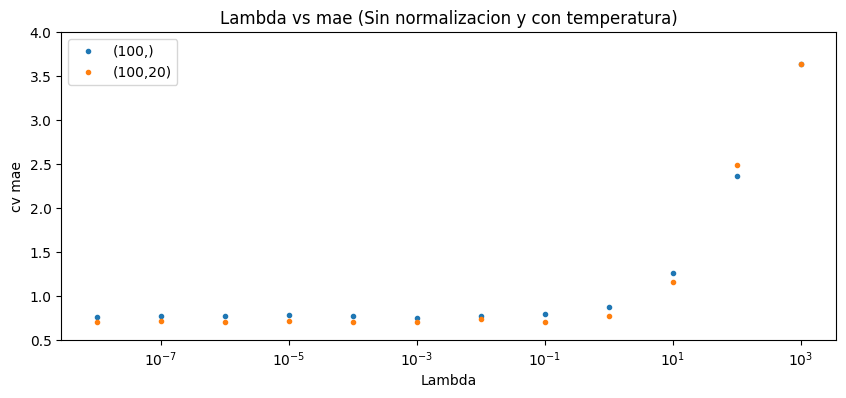

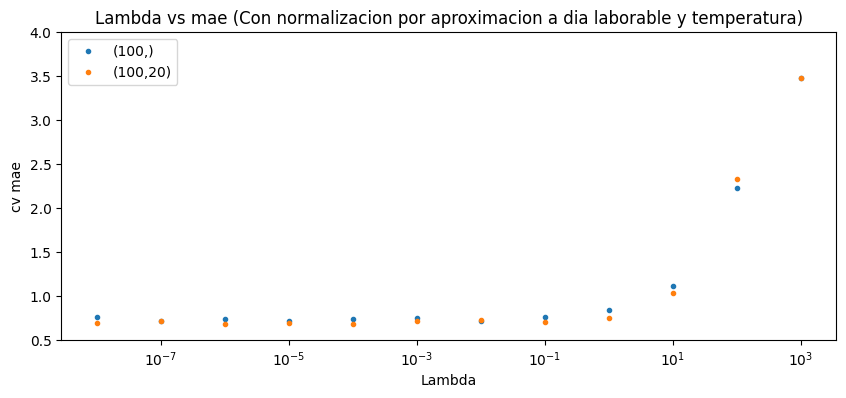

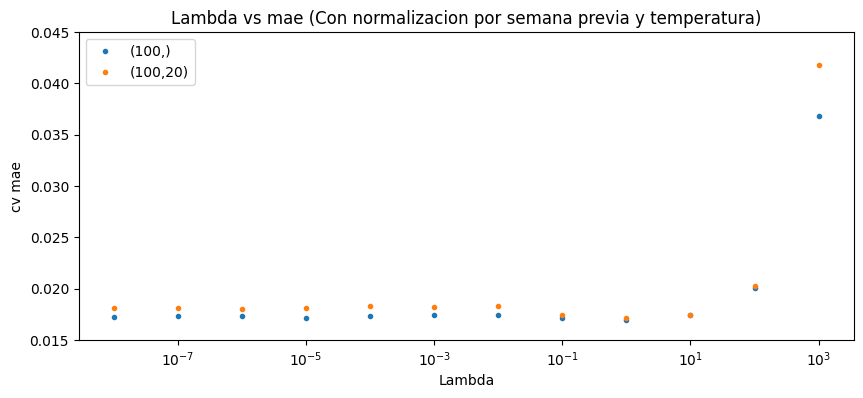

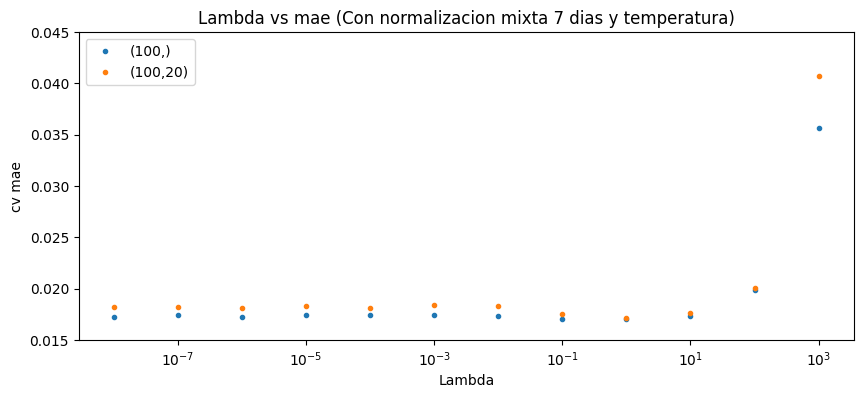

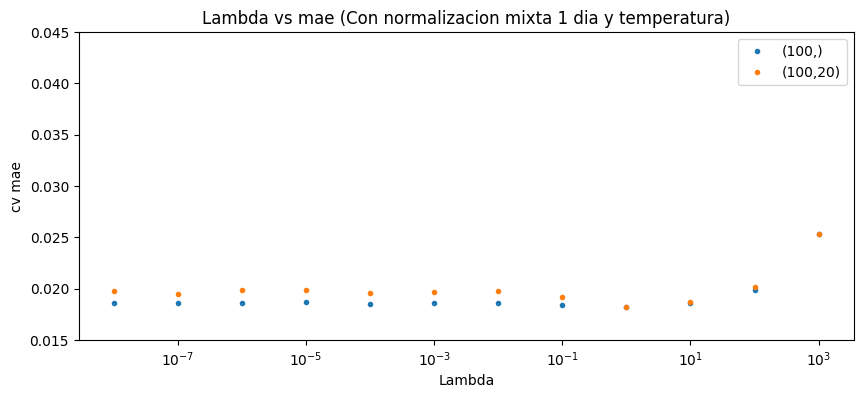

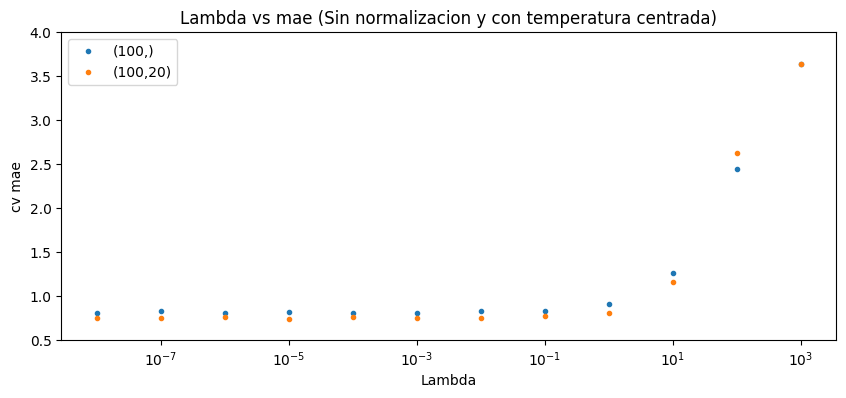

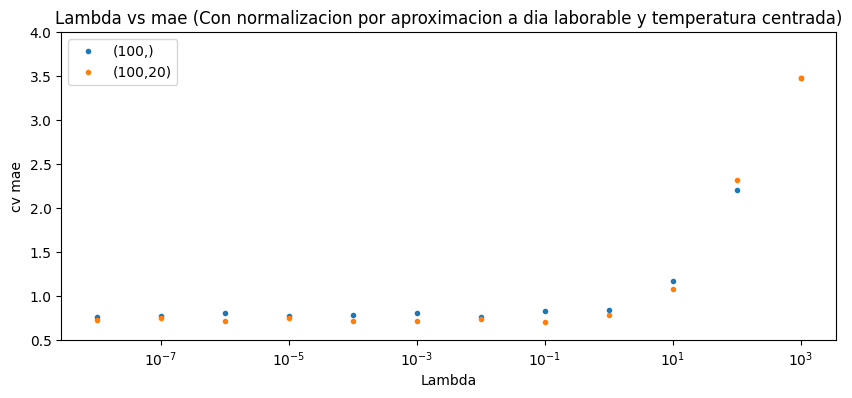

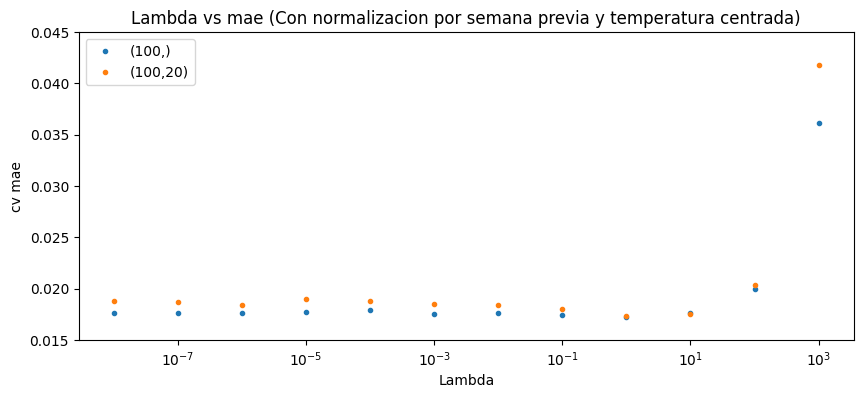

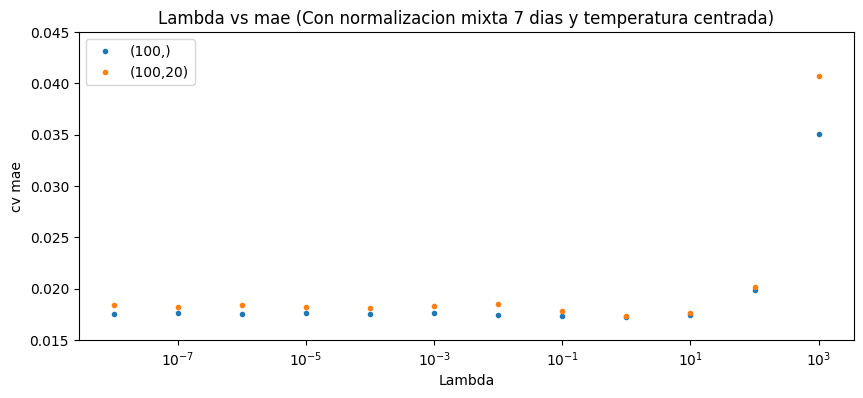

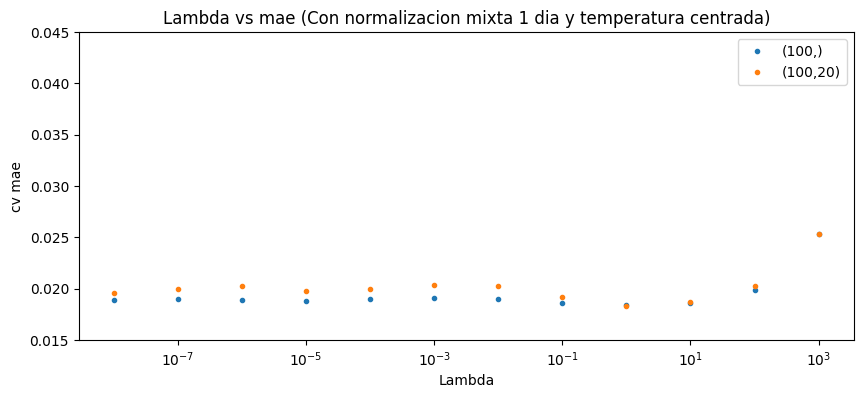

In [8]:
ancho = 10
alto = 4

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Sin normalizacion ni temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.5, 4])
plt.plot(df_0Sin1alpha, df_0Sin1score, '.', label="(100,)")
plt.plot(df_0Sin2alpha, df_0Sin2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion por aproximacion a dia laborable y sin temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.5, 4])
plt.plot(df_1Sin1alpha, df_1Sin1score, '.', label="(100,)")
plt.plot(df_1Sin2alpha, df_1Sin2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion por semana previa y sin temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_2Sin1alpha, df_2Sin1score, '.', label="(100,)")
plt.plot(df_2Sin2alpha, df_2Sin2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion mixta 7 dias y sin temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_37Sin1alpha, df_37Sin1score, '.', label="(100,)")
plt.plot(df_37Sin2alpha, df_37Sin2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion mixta 1 dia y sin temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_31Sin1alpha, df_31Sin1score, '.', label="(100,)")
plt.plot(df_31Sin2alpha, df_31Sin2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Sin normalizacion y con temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.5, 4])
plt.plot(df_0Con1alpha, df_0Con1score, '.', label="(100,)")
plt.plot(df_0Con2alpha, df_0Con2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion por aproximacion a dia laborable y temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.5, 4])
plt.plot(df_1Con1alpha, df_1Con1score, '.', label="(100,)")
plt.plot(df_1Con2alpha, df_1Con2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion por semana previa y temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_2Con1alpha, df_2Con1score, '.', label="(100,)")
plt.plot(df_2Con2alpha, df_2Con2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion mixta 7 dias y temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_37Con1alpha, df_37Con1score, '.', label="(100,)")
plt.plot(df_37Con2alpha, df_37Con2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion mixta 1 dia y temperatura)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_31Con1alpha, df_31Con1score, '.', label="(100,)")
plt.plot(df_31Con2alpha, df_31Con2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Sin normalizacion y con temperatura centrada)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.5, 4])
plt.plot(df_0ConCen1alpha, df_0ConCen1score, '.', label="(100,)")
plt.plot(df_0ConCen2alpha, df_0ConCen2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion por aproximacion a dia laborable y temperatura centrada)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.5, 4])
plt.plot(df_1ConCen1alpha, df_1ConCen1score, '.', label="(100,)")
plt.plot(df_1ConCen2alpha, df_1ConCen2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion por semana previa y temperatura centrada)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_2ConCen1alpha, df_2ConCen1score, '.', label="(100,)")
plt.plot(df_2ConCen2alpha, df_2ConCen2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion mixta 7 dias y temperatura centrada)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_37ConCen1alpha, df_37ConCen1score, '.', label="(100,)")
plt.plot(df_37ConCen2alpha, df_37ConCen2score, '.', label="(100,20)")
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Lambda vs mae (Con normalizacion mixta 1 dia y temperatura centrada)')
plt.xlabel('Lambda')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_31ConCen1alpha, df_31ConCen1score, '.', label="(100,)")
plt.plot(df_31ConCen2alpha, df_31ConCen2score, '.', label="(100,20)")
plt.legend()
plt.show()

Y se obtienen los mejores estimadores de cada conjunto de datos.

In [32]:
estimador_0Sin = cv_estimator_0Sin.best_estimator_
estimador_1Sin = cv_estimator_1Sin.best_estimator_
estimador_2Sin = cv_estimator_2Sin.best_estimator_
estimador_37Sin = cv_estimator_37Sin.best_estimator_
estimador_31Sin = cv_estimator_31Sin.best_estimator_
estimador_0Con = cv_estimator_0Con.best_estimator_
estimador_1Con = cv_estimator_1Con.best_estimator_
estimador_2Con = cv_estimator_2Con.best_estimator_
estimador_37Con = cv_estimator_37Con.best_estimator_
estimador_31Con = cv_estimator_31Con.best_estimator_
estimador_0ConCen = cv_estimator_0ConCen.best_estimator_
estimador_1ConCen = cv_estimator_1ConCen.best_estimator_
estimador_2ConCen = cv_estimator_2ConCen.best_estimator_
estimador_37ConCen = cv_estimator_37ConCen.best_estimator_
estimador_31ConCen = cv_estimator_31ConCen.best_estimator_

### Scores

Resultados de los scores de los distintos estimadores. Primero se leen los datos de la normalización, necesarios para la desnormalización de los datos previstos para la medición de los scores.

In [33]:
medias_festivos = lee_datos_normalizacion("festivos")
medias_laborables = lee_datos_normalizacion("laborables")
medias_sabados = lee_datos_normalizacion("sabados")

In [40]:
scores_0Sin = score0(estimador_0Sin, XTest0Sin, yTest, "MLP0Sin")
scores_1Sin = score1(estimador_1Sin, XTest1Sin, yTest, data, medias_laborables, medias_festivos, medias_sabados, "MLP1Sin")
scores_2Sin = score2(estimador_2Sin, XTest2Sin, yTest, data, "MLP2Sin")
scores_37Sin = score3x(estimador_37Sin, XTest37Sin, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "MLP37Sin")
scores_31Sin = score3x(estimador_31Sin, XTest31Sin, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "MLP31Sin")
scores_0Con = score0(estimador_0Con, XTest0Con, yTest, "MLP0Con")
scores_1Con = score1(estimador_1Con, XTest1Con, yTest, data, medias_laborables, medias_festivos, medias_sabados, "MLP1Con")
scores_2Con = score2(estimador_2Con, XTest2Con, yTest, data, "MLP2Con")
scores_37Con = score3x(estimador_37Con, XTest37Con, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "MLP37Con")
scores_31Con = score3x(estimador_31Con, XTest31Con, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "MLP31Con")
scores_0ConCen = score0(estimador_0ConCen, XTest0ConCen, yTest, "MLP0ConCen")
scores_1ConCen = score1(estimador_1ConCen, XTest1ConCen, yTest, data, medias_laborables, medias_festivos, medias_sabados, "MLP1ConCen")
scores_2ConCen = score2(estimador_2ConCen, XTest2ConCen, yTest, data, "MLP2ConCen")
scores_37ConCen = score3x(estimador_37ConCen, XTest37ConCen, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "MLP37ConCen")
scores_31ConCen = score3x(estimador_31ConCen, XTest31ConCen, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "MLP31ConCen")

Y los resultados calculados se mostrarán en las siguientes tablas.

In [41]:
nombres = ['Sin normalizacion', 
           'Con normalizacion por aproximacion a dia laborable', 
           'Con normalizacion por semana previa',
           'Con normalizacion mixta 7 dias',
           'Con normalizacion mixta 1 dia']

sin_temperatura = []
con_temperatura = []
con_temperatura_centrada = []
for i in range(horas_delante):
    sin_temperatura.append([])
    sin_temperatura[i].append(scores_0Sin[i])
    sin_temperatura[i].append(scores_1Sin[i])
    sin_temperatura[i].append(scores_2Sin[i])
    sin_temperatura[i].append(scores_37Sin[i])
    sin_temperatura[i].append(scores_31Sin[i])

    con_temperatura.append([])
    con_temperatura[i].append(scores_0Con[i])
    con_temperatura[i].append(scores_1Con[i])
    con_temperatura[i].append(scores_2Con[i])
    con_temperatura[i].append(scores_37Con[i])
    con_temperatura[i].append(scores_31Con[i])

    con_temperatura_centrada.append([])
    con_temperatura_centrada[i].append(scores_0ConCen[i])
    con_temperatura_centrada[i].append(scores_1ConCen[i])
    con_temperatura_centrada[i].append(scores_2ConCen[i])
    con_temperatura_centrada[i].append(scores_37ConCen[i])
    con_temperatura_centrada[i].append(scores_31ConCen[i])

scores = []
for i in range(horas_delante):
    scores.append(pd.DataFrame({'Nombres': nombres, 
                                'Sin temperatura': sin_temperatura[i], 
                                'Con temperatura': con_temperatura[i], 
                                'Con temperatura centrada': con_temperatura_centrada[i]}))

In [42]:
print('SCORES PRIMERA HORA:')
scores[0]

SCORES PRIMERA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.438716   
1  Con normalizacion por aproximacion a dia labor...         0.475017   
2                Con normalizacion por semana previa         0.298282   
3                     Con normalizacion mixta 7 dias         0.300505   
4                      Con normalizacion mixta 1 dia         0.309190   

   Con temperatura  Con temperatura centrada  
0         0.444878                  0.477474  
1         0.433729                  0.490630  
2         0.302429                  0.303564  
3         0.304026                  0.304342  
4         0.309504                  0.318016

In [43]:
print('SCORES SEGUNDA HORA:')
scores[1]

SCORES SEGUNDA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.735086   
1  Con normalizacion por aproximacion a dia labor...         0.762251   
2                Con normalizacion por semana previa         0.414387   
3                     Con normalizacion mixta 7 dias         0.418549   
4                      Con normalizacion mixta 1 dia         0.428488   

   Con temperatura  Con temperatura centrada  
0         0.716375                  0.786485  
1         0.674435                  0.766300  
2         0.407377                  0.411655  
3         0.412568                  0.413122  
4         0.426806                  0.431206

In [44]:
print('SCORES TERCERA HORA:')
scores[2]

SCORES TERCERA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.957261   
1  Con normalizacion por aproximacion a dia labor...         0.960179   
2                Con normalizacion por semana previa         0.504169   
3                     Con normalizacion mixta 7 dias         0.507623   
4                      Con normalizacion mixta 1 dia         0.508478   

   Con temperatura  Con temperatura centrada  
0         0.925379                  1.002747  
1         0.814114                  0.921792  
2         0.486982                  0.493366  
3         0.494631                  0.497160  
4         0.505942                  0.504602

In [45]:
print('SCORES CUARTA HORA:')
scores[3]

SCORES CUARTA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.150742   
1  Con normalizacion por aproximacion a dia labor...         1.081957   
2                Con normalizacion por semana previa         0.576095   
3                     Con normalizacion mixta 7 dias         0.575838   
4                      Con normalizacion mixta 1 dia         0.563794   

   Con temperatura  Con temperatura centrada  
0         1.120472                  1.186569  
1         0.916186                  1.051527  
2         0.550230                  0.559992  
3         0.555154                  0.560796  
4         0.560173                  0.556604

In [46]:
print('SCORES QUINTA HORA:')
scores[4]

SCORES QUINTA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.305689   
1  Con normalizacion por aproximacion a dia labor...         1.172119   
2                Con normalizacion por semana previa         0.631492   
3                     Con normalizacion mixta 7 dias         0.626784   
4                      Con normalizacion mixta 1 dia         0.602178   

   Con temperatura  Con temperatura centrada  
0         1.275176                  1.336500  
1         1.017137                  1.162863  
2         0.597461                  0.611018  
3         0.600784                  0.608034  
4         0.599466                  0.596926

In [47]:
print('SCORES SEXTA HORA:')
scores[5]

SCORES SEXTA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.393367   
1  Con normalizacion por aproximacion a dia labor...         1.231371   
2                Con normalizacion por semana previa         0.675203   
3                     Con normalizacion mixta 7 dias         0.667603   
4                      Con normalizacion mixta 1 dia         0.632168   

   Con temperatura  Con temperatura centrada  
0         1.379449                  1.443749  
1         1.077968                  1.261896  
2         0.636491                  0.653568  
3         0.635408                  0.648482  
4         0.628625                  0.622036

### Curvas realidad-predicción

Para obtener una idea más visual de los resultados, se muestran a continuación las curvas realidad-predicción de las estimaciones del primer horizonte realizadas por los estimadores para todos los casos de normalización y temperaturas.

Estas curvas enfrentan en el eje X el valor real de demanda contra el eje Y que muestra el valor predicho, para cada momento sobre el que se predice.

In [48]:
preds = pd.read_csv('preds.csv', sep=';', index_col=0)

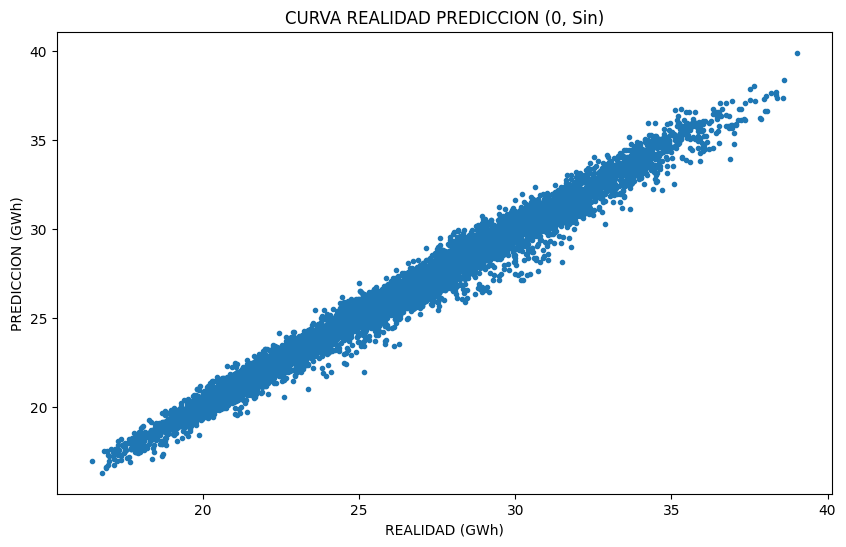

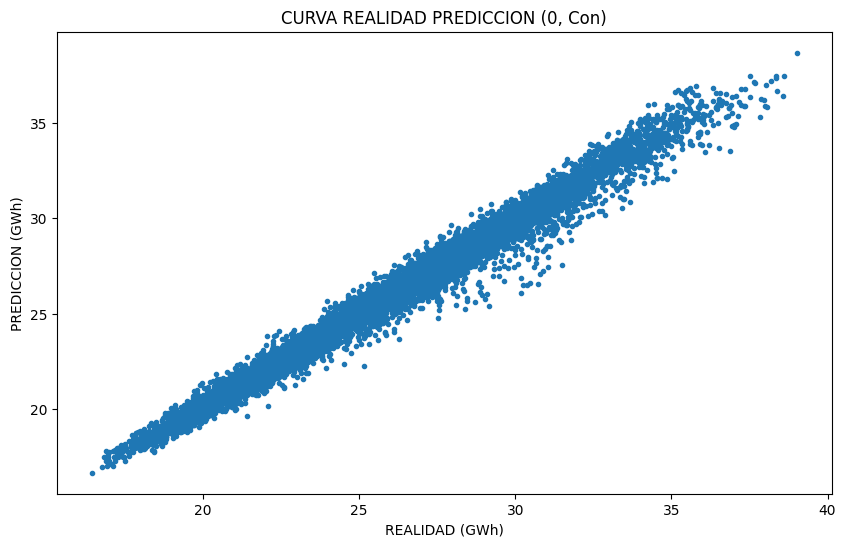

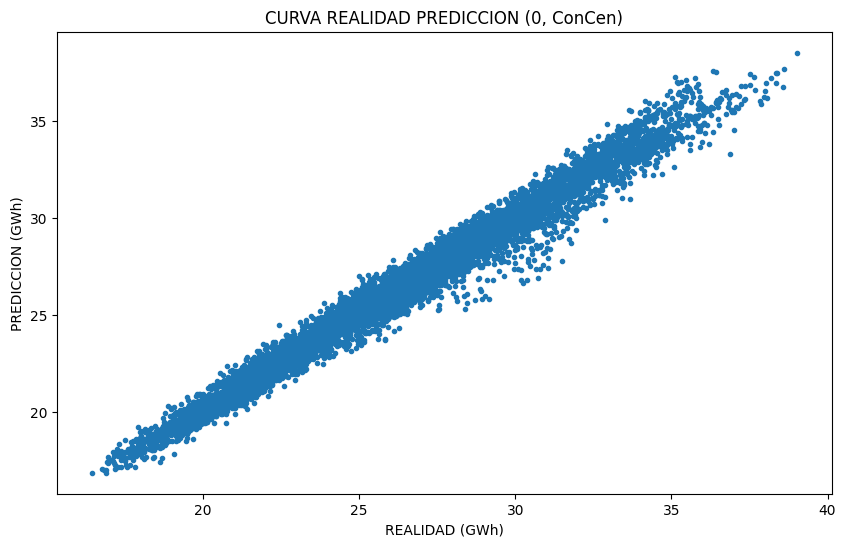

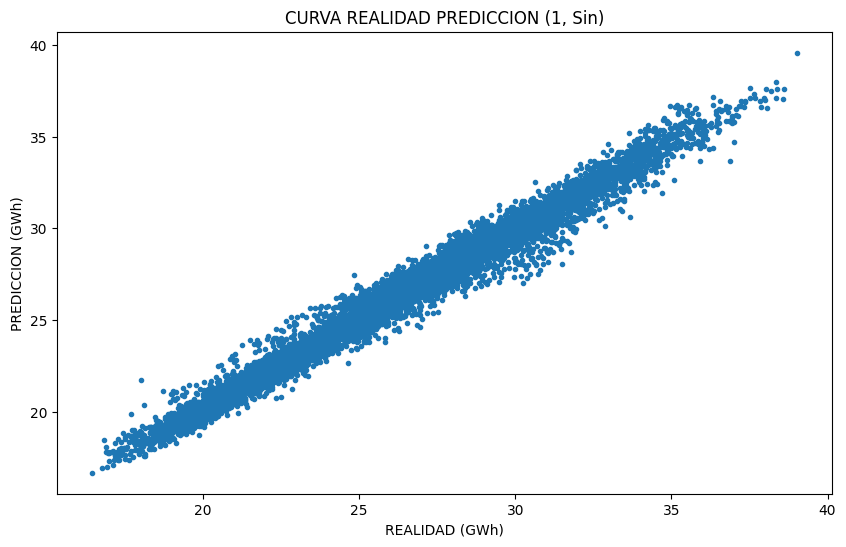

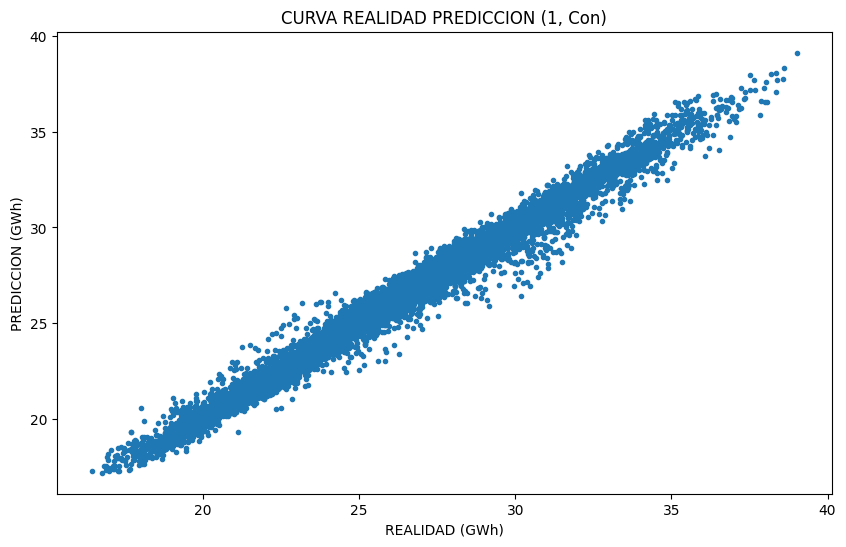

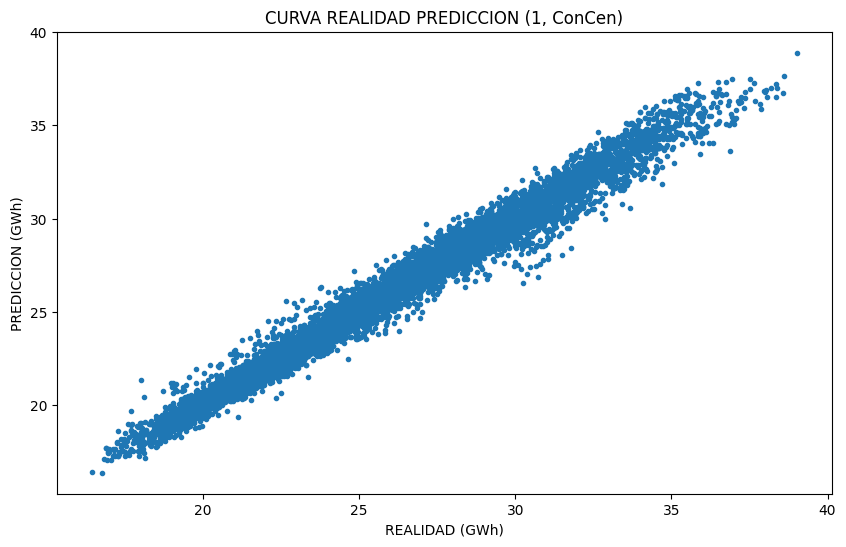

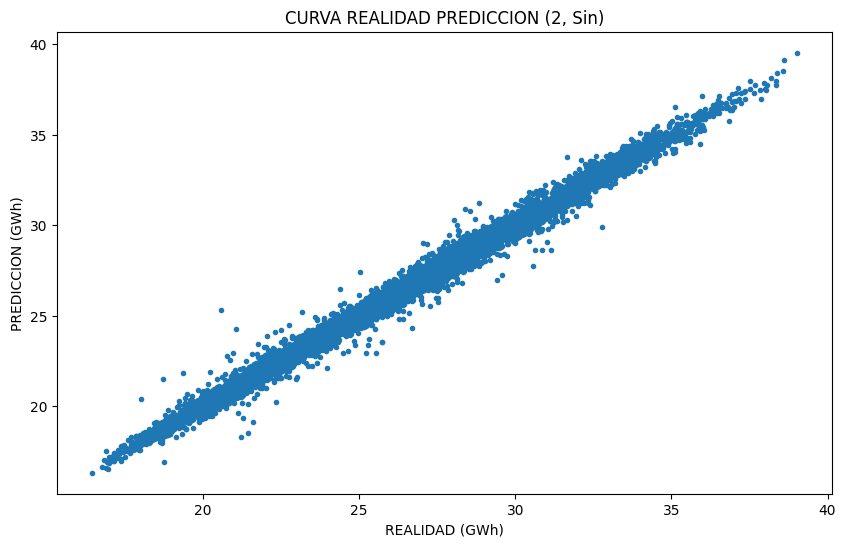

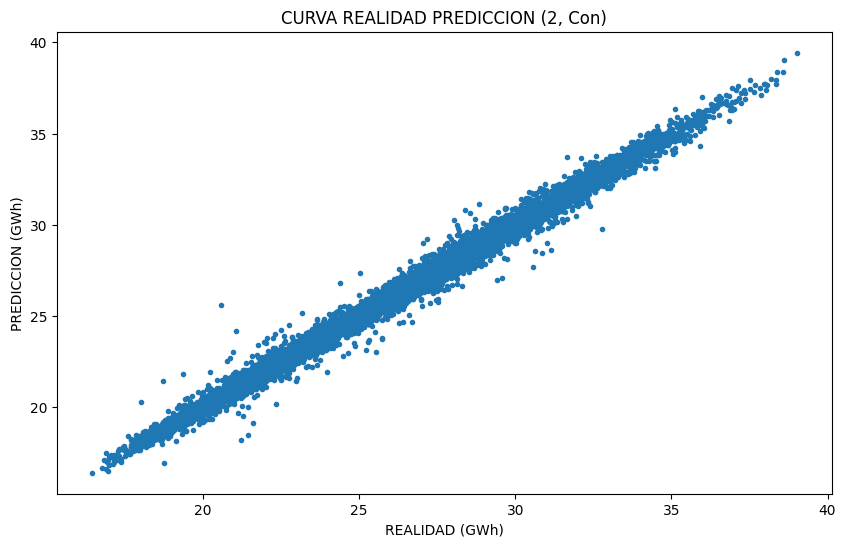

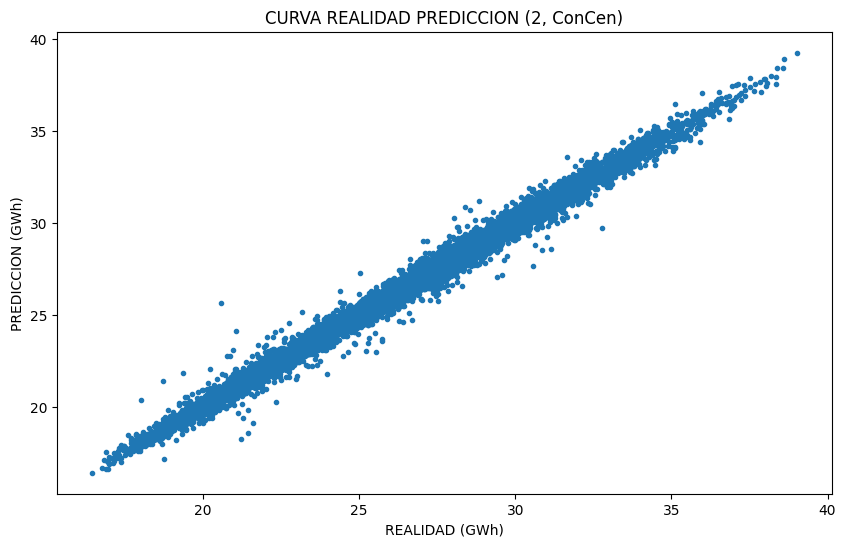

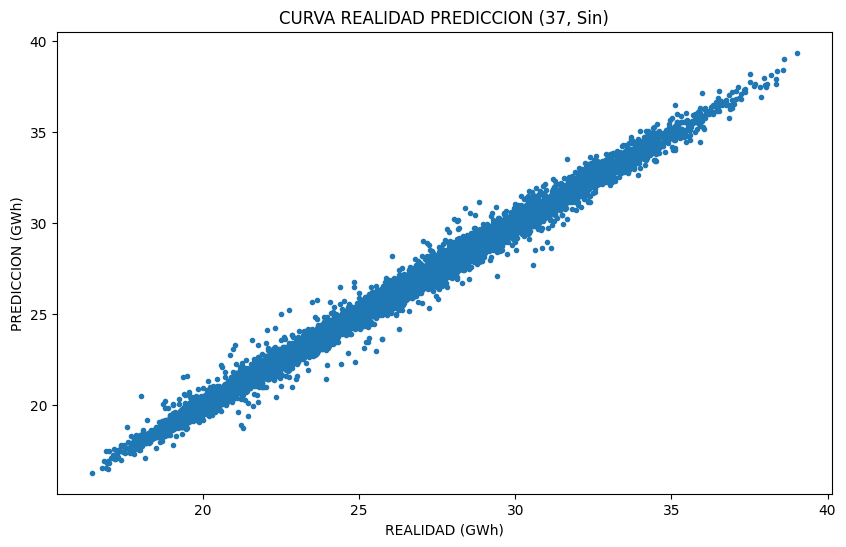

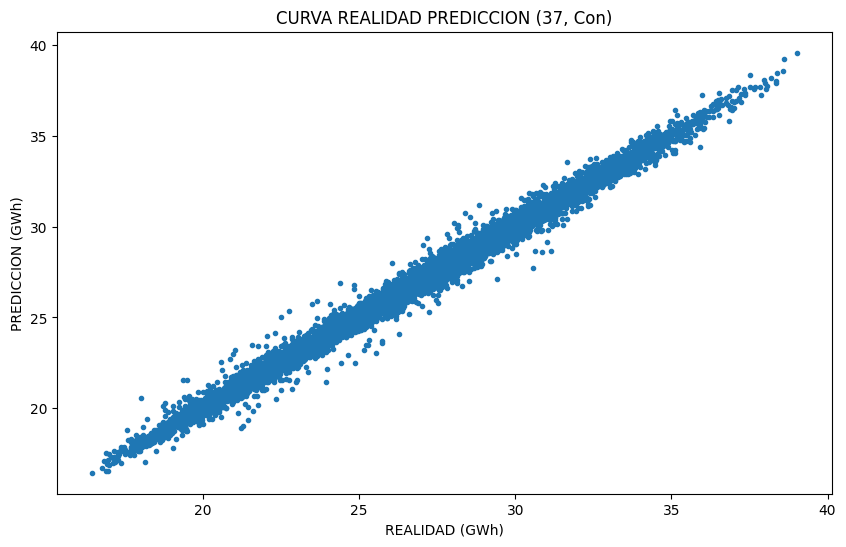

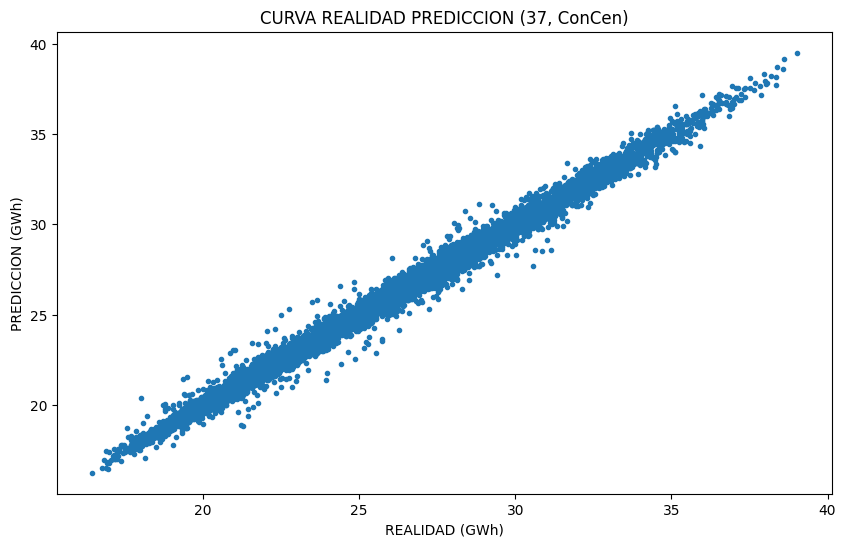

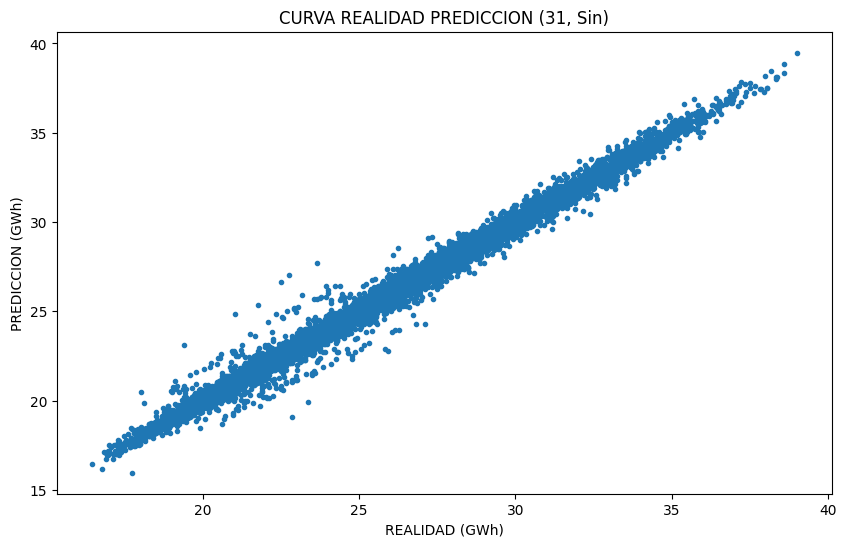

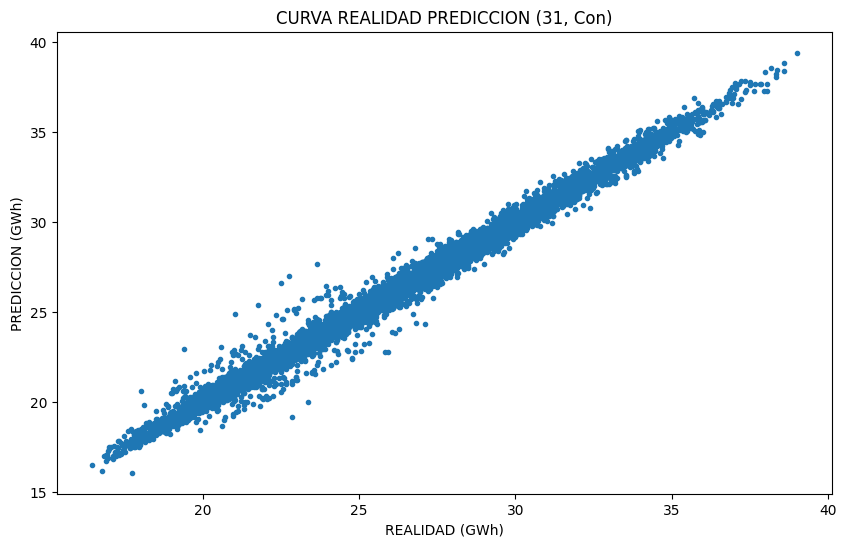

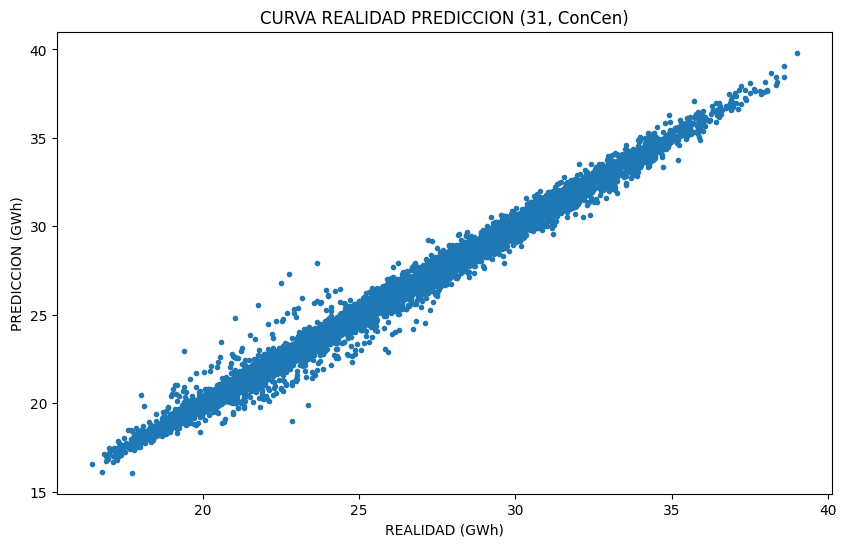

In [49]:
ancho = 10
alto = 6

for norm in [0, 1, 2, 37, 31]:
    for temp in ["Sin", "Con", "ConCen"]:
        clave = "MLP{}{}_0".format(norm, temp)
        plt.figure(figsize=(ancho,alto))
        plt.plot(preds["yTest_0"], preds[clave], ".")
        plt.title("CURVA REALIDAD PREDICCION ({}, {})".format(norm, temp))
        plt.xlabel("REALIDAD (GWh)")
        plt.ylabel("PREDICCION (GWh)")
        plt.show()

## SVR

### Hiperparametrización

Las SVRs tienen como hiperparámetros los valores *C*, *gamma* y *epsilon*.

In [15]:
_,dimSin = XTest0Sin.shape
_,dimCon = XTest0Con.shape

In [16]:
l_C = [10.**k for k in range(-3,4)]
l_gamma_sin = list(np.array([2.**k for k in range(-2,7)]) / dimSin)
l_gamma_con = list(np.array([2.**k for k in range(-2,7)]) / dimCon)
l_epsilon = [2.**k for k in range(-6,0)]
param_grid_sin = {'regressor__svr__estimator__C': l_C,
                  'regressor__svr__estimator__gamma': l_gamma_sin,
                  'regressor__svr__estimator__epsilon': l_epsilon}
param_grid_con = {'regressor__svr__estimator__C': l_C,
                  'regressor__svr__estimator__gamma': l_gamma_con,
                  'regressor__svr__estimator__epsilon': l_epsilon}

In [9]:
cv_estimator_0Sin = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_sin, XTraining0Sin, yTraining0Sin, '0Sin')
cv_estimator_1Sin = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_sin, XTraining1Sin, yTraining1Sin, '1Sin')
cv_estimator_2Sin = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_sin, XTraining2Sin, yTraining2Sin, '2Sin')
cv_estimator_37Sin = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_sin, XTraining37Sin, yTraining37Sin, '37Sin')
cv_estimator_31Sin = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_sin, XTraining31Sin, yTraining31Sin, '31Sin')
cv_estimator_0Con = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining0Con, yTraining0Con, '0Con')
cv_estimator_1Con = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining1Con, yTraining1Con, '1Con')
cv_estimator_2Con = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining2Con, yTraining2Con, '2Con')
cv_estimator_37Con = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining37Con, yTraining37Con, '37Con')
cv_estimator_31Con = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining31Con, yTraining31Con, '31Con')
cv_estimator_0ConCen = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining0ConCen, yTraining0ConCen, '0ConCen')
cv_estimator_1ConCen = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining1ConCen, yTraining1ConCen, '1ConCen')
cv_estimator_2ConCen = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining2ConCen, yTraining2ConCen, '2ConCen')
cv_estimator_37ConCen = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining37ConCen, yTraining37ConCen, '37ConCen')
cv_estimator_31ConCen = hiperparametriza_estimador(MultiOutputRegressor(SVR(shrinking=False)), 'svr', param_grid_con, XTraining31ConCen, yTraining31ConCen, '31ConCen')

In [17]:
cv_estimator_0Sin = joblib.load("estimadores/svr/est_0Sin.pkl")
cv_estimator_1Sin = joblib.load("estimadores/svr/est_1Sin.pkl")
cv_estimator_2Sin = joblib.load("estimadores/svr/est_2Sin.pkl")
cv_estimator_37Sin = joblib.load("estimadores/svr/est_37Sin.pkl")
cv_estimator_31Sin = joblib.load("estimadores/svr/est_31Sin.pkl")
cv_estimator_0Con = joblib.load("estimadores/svr/est_0Con.pkl")
cv_estimator_1Con = joblib.load("estimadores/svr/est_1Con.pkl")
cv_estimator_2Con = joblib.load("estimadores/svr/est_2Con.pkl")
cv_estimator_37Con = joblib.load("estimadores/svr/est_37Con.pkl")
cv_estimator_31Con = joblib.load("estimadores/svr/est_31Con.pkl")
cv_estimator_0ConCen = joblib.load("estimadores/svr/est_0ConCen.pkl")
cv_estimator_1ConCen = joblib.load("estimadores/svr/est_1ConCen.pkl")
cv_estimator_2ConCen = joblib.load("estimadores/svr/est_2ConCen.pkl")
cv_estimator_37ConCen = joblib.load("estimadores/svr/est_37ConCen.pkl")
cv_estimator_31ConCen = joblib.load("estimadores/svr/est_31ConCen.pkl")

In [18]:
df_svr_search_0Sin = info_mejores_estimadores(cv_estimator_0Sin, param_grid_sin)
df_svr_search_1Sin = info_mejores_estimadores(cv_estimator_1Sin, param_grid_sin)
df_svr_search_2Sin = info_mejores_estimadores(cv_estimator_2Sin, param_grid_sin)
df_svr_search_37Sin = info_mejores_estimadores(cv_estimator_37Sin, param_grid_sin)
df_svr_search_31Sin = info_mejores_estimadores(cv_estimator_31Sin, param_grid_sin)
df_svr_search_0Con = info_mejores_estimadores(cv_estimator_0Con, param_grid_con)
df_svr_search_1Con = info_mejores_estimadores(cv_estimator_1Con, param_grid_con)
df_svr_search_2Con = info_mejores_estimadores(cv_estimator_2Con, param_grid_con)
df_svr_search_37Con = info_mejores_estimadores(cv_estimator_37Con, param_grid_con)
df_svr_search_31Con = info_mejores_estimadores(cv_estimator_31Con, param_grid_con)
df_svr_search_0ConCen = info_mejores_estimadores(cv_estimator_0ConCen, param_grid_con)
df_svr_search_1ConCen = info_mejores_estimadores(cv_estimator_1ConCen, param_grid_con)
df_svr_search_2ConCen = info_mejores_estimadores(cv_estimator_2ConCen, param_grid_con)
df_svr_search_37ConCen = info_mejores_estimadores(cv_estimator_37ConCen, param_grid_con)
df_svr_search_31ConCen = info_mejores_estimadores(cv_estimator_31ConCen, param_grid_con)

Se plotean a continuación los resultados de la hiperparametrización.

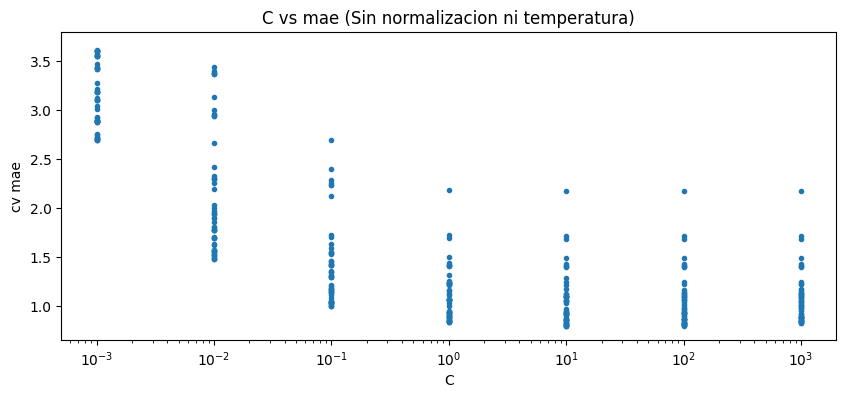

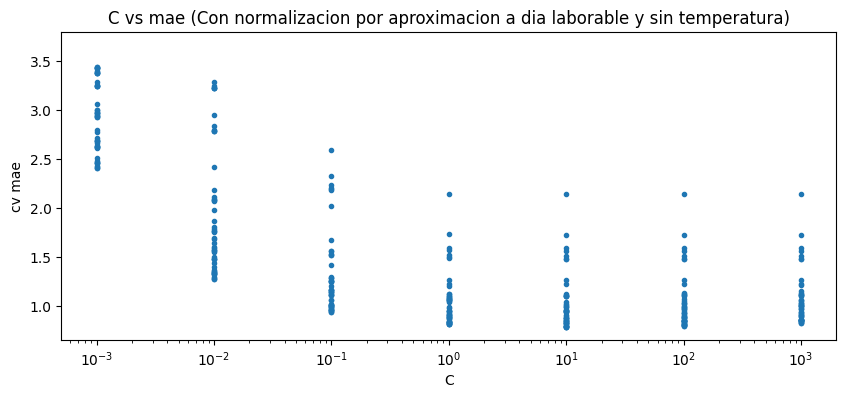

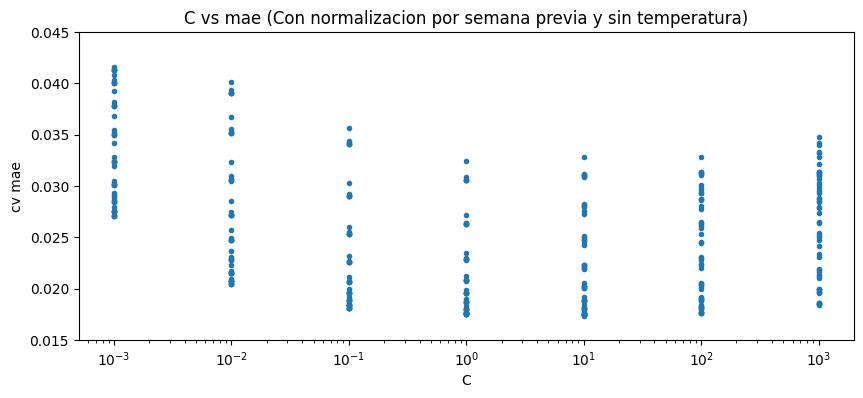

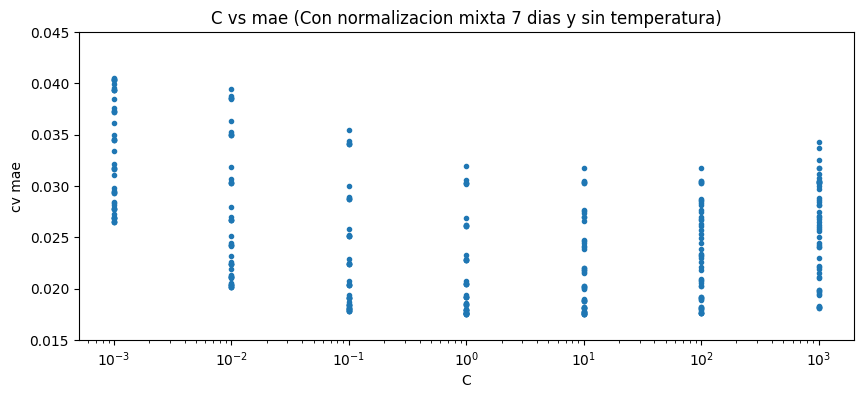

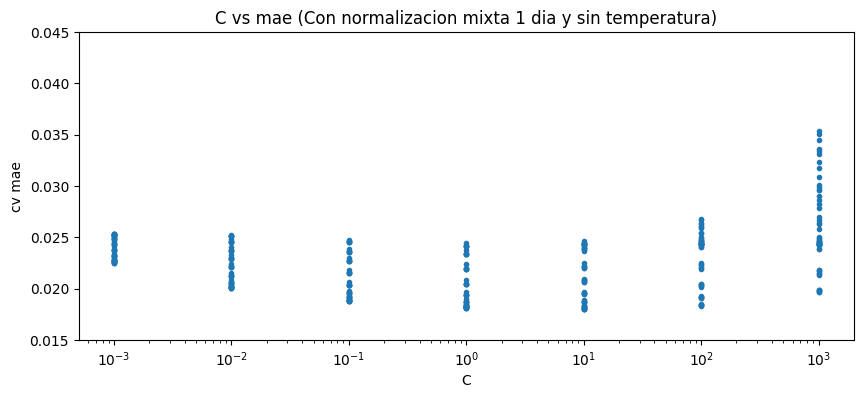

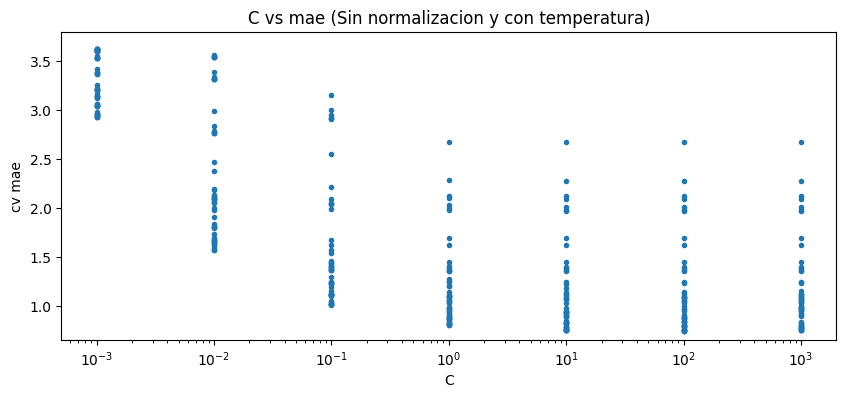

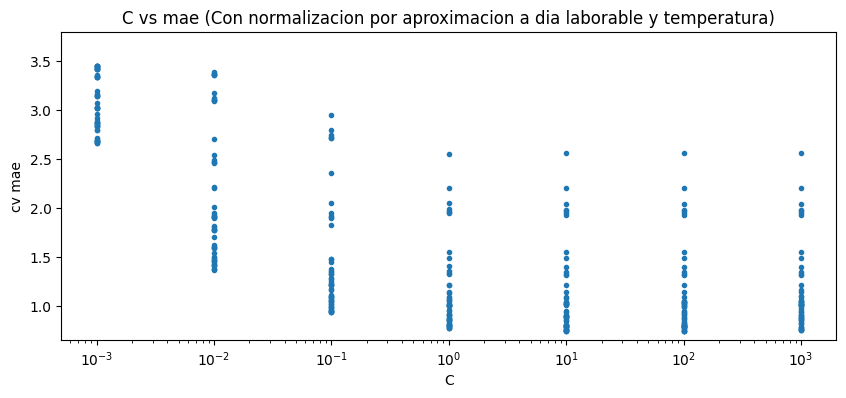

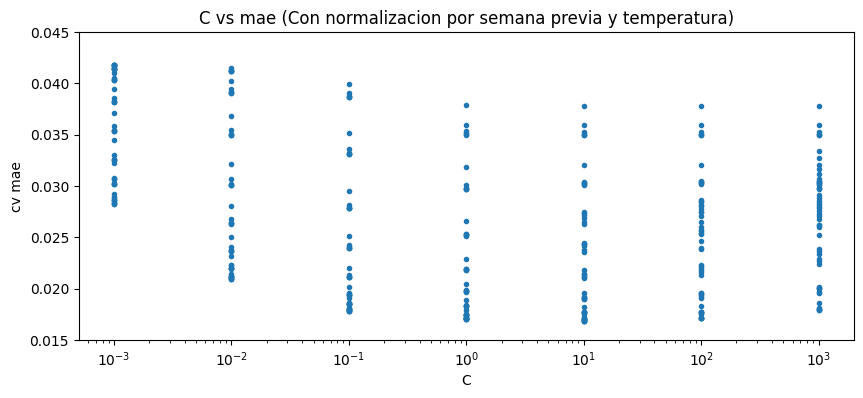

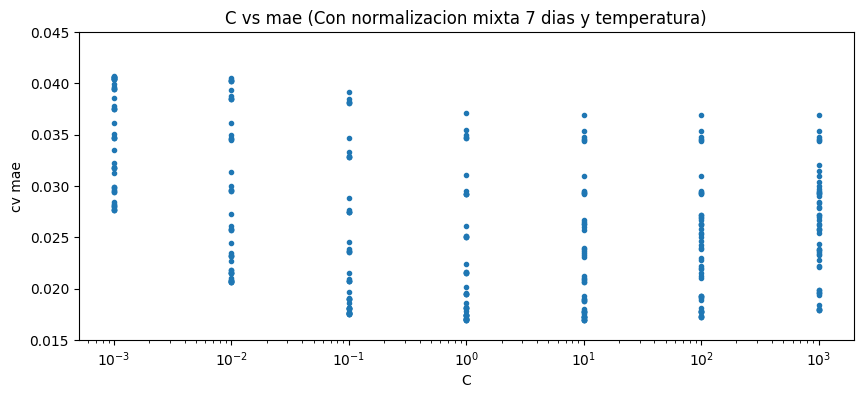

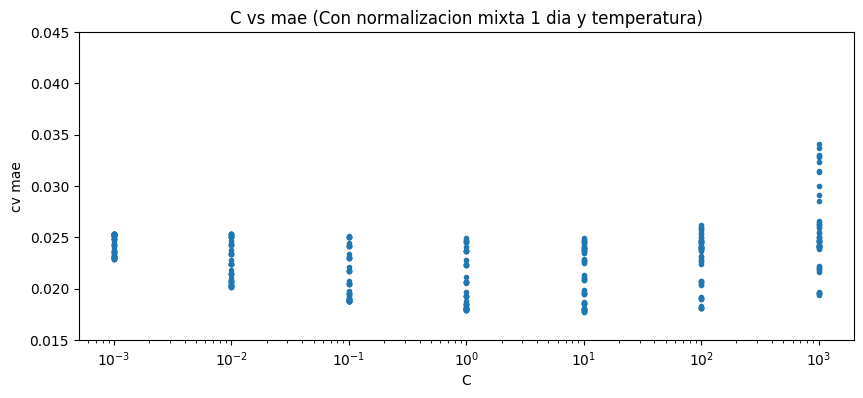

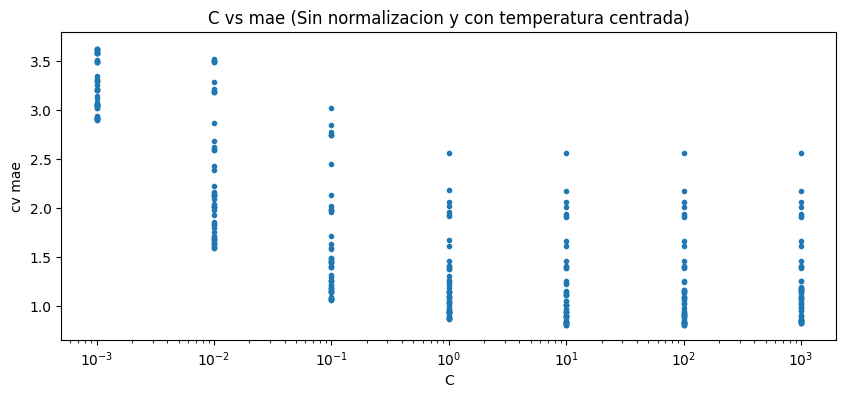

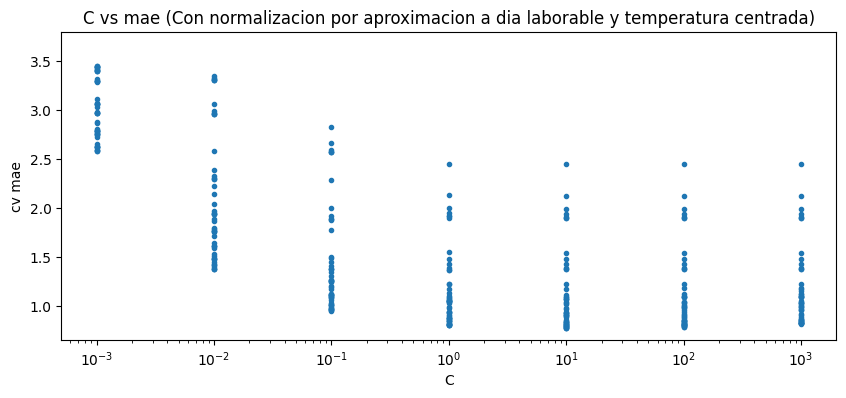

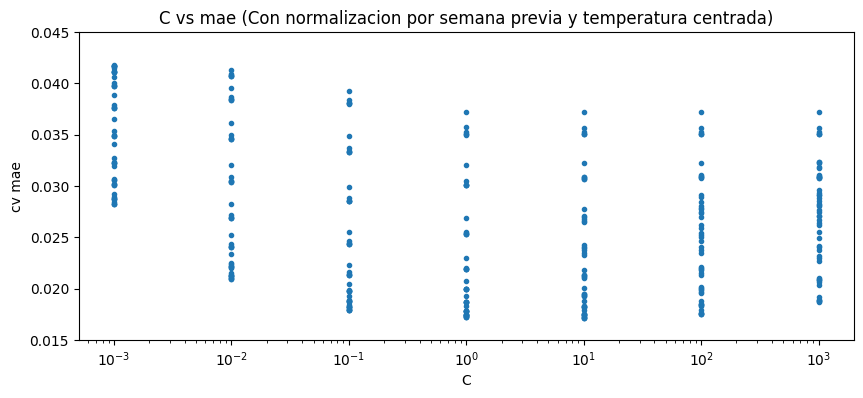

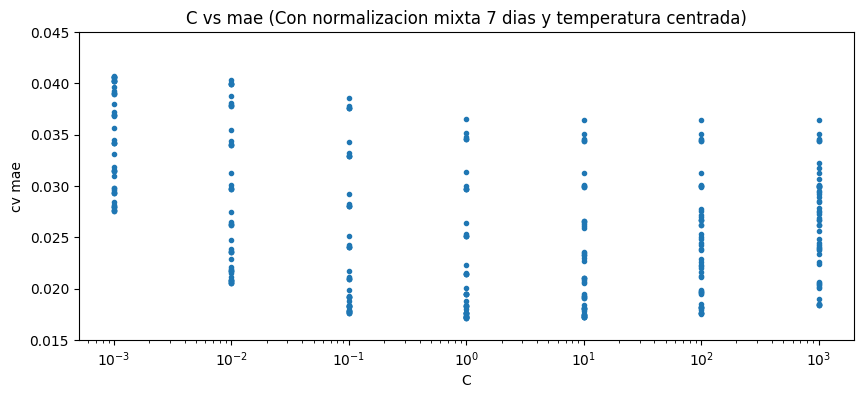

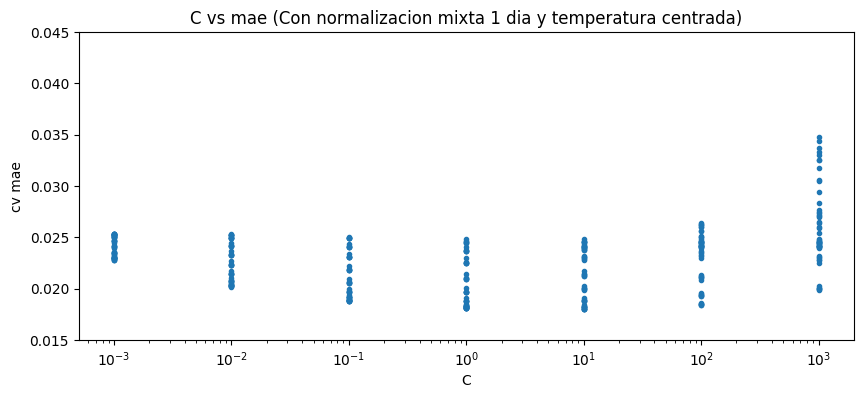

In [23]:
ancho = 10
alto = 4


plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Sin normalizacion ni temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0Sin['param_regressor__svr__estimator__C'], -df_svr_search_0Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion por aproximacion a dia laborable y sin temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1Sin['param_regressor__svr__estimator__C'], -df_svr_search_1Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion por semana previa y sin temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2Sin['param_regressor__svr__estimator__C'], -df_svr_search_2Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion mixta 7 dias y sin temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37Sin['param_regressor__svr__estimator__C'], -df_svr_search_37Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion mixta 1 dia y sin temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31Sin['param_regressor__svr__estimator__C'], -df_svr_search_31Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Sin normalizacion y con temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0Con['param_regressor__svr__estimator__C'], -df_svr_search_0Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion por aproximacion a dia laborable y temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1Con['param_regressor__svr__estimator__C'], -df_svr_search_1Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion por semana previa y temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2Con['param_regressor__svr__estimator__C'], -df_svr_search_2Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion mixta 7 dias y temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37Con['param_regressor__svr__estimator__C'], -df_svr_search_37Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion mixta 1 dia y temperatura)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31Con['param_regressor__svr__estimator__C'], -df_svr_search_31Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Sin normalizacion y con temperatura centrada)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0ConCen['param_regressor__svr__estimator__C'], -df_svr_search_0ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion por aproximacion a dia laborable y temperatura centrada)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1ConCen['param_regressor__svr__estimator__C'], -df_svr_search_1ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion por semana previa y temperatura centrada)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2ConCen['param_regressor__svr__estimator__C'], -df_svr_search_2ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion mixta 7 dias y temperatura centrada)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37ConCen['param_regressor__svr__estimator__C'], -df_svr_search_37ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('C vs mae (Con normalizacion mixta 1 dia y temperatura centrada)')
plt.xlabel('C')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31ConCen['param_regressor__svr__estimator__C'], -df_svr_search_31ConCen['mean_test_score'], '.')
plt.show()

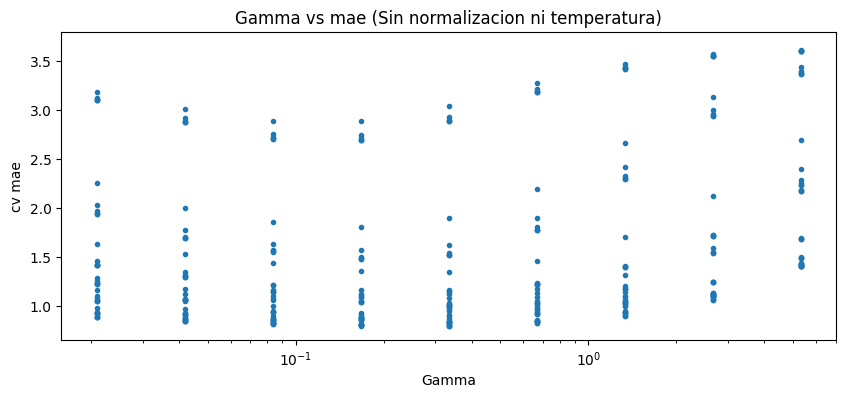

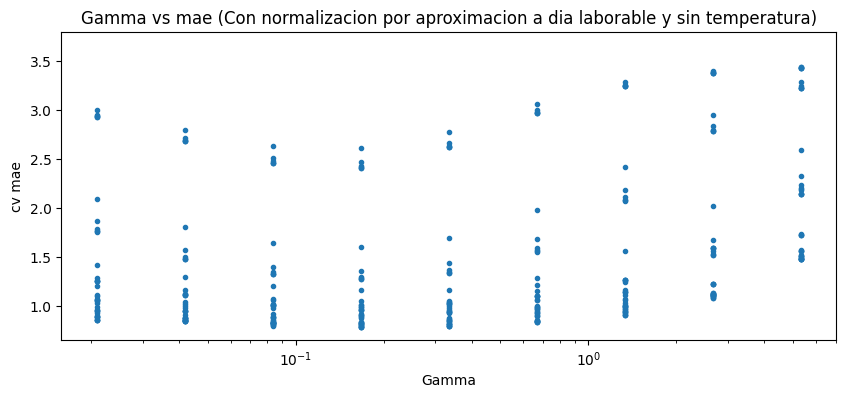

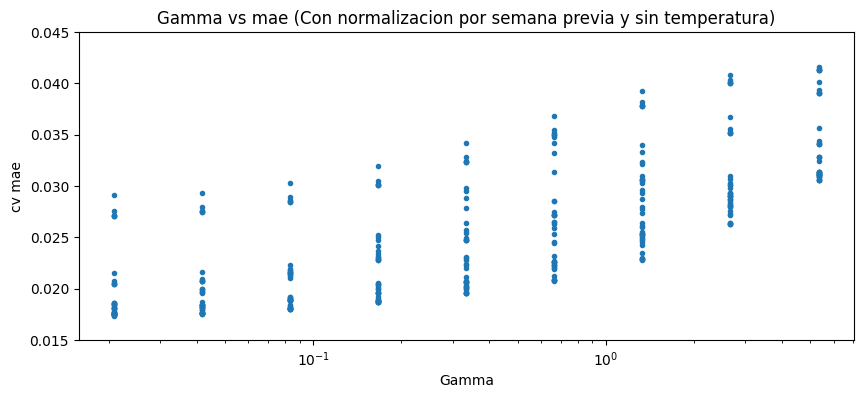

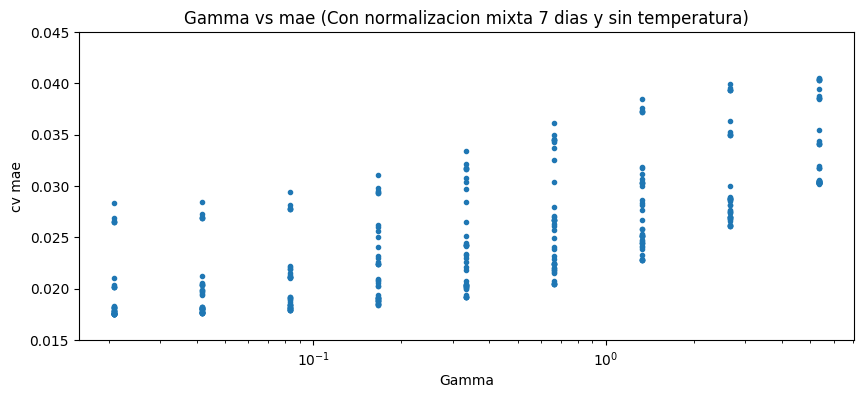

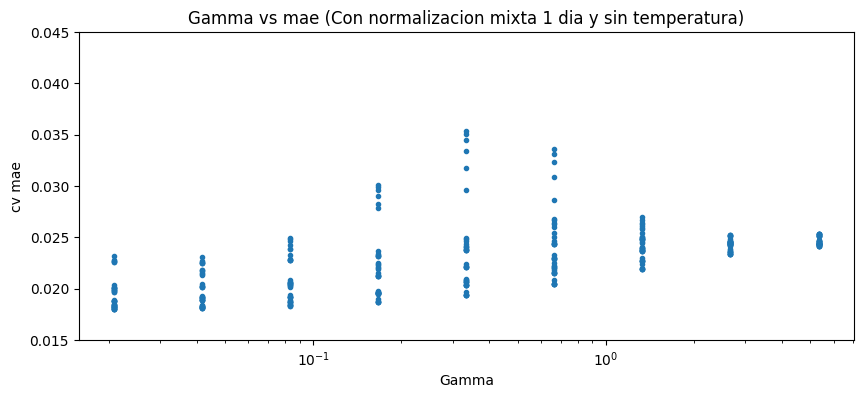

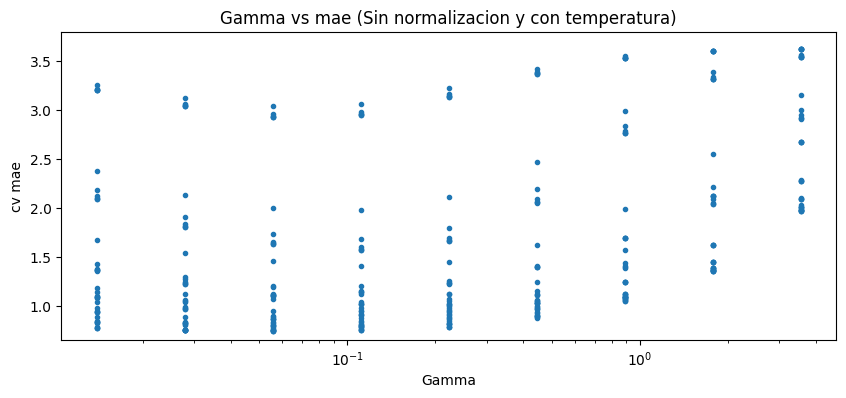

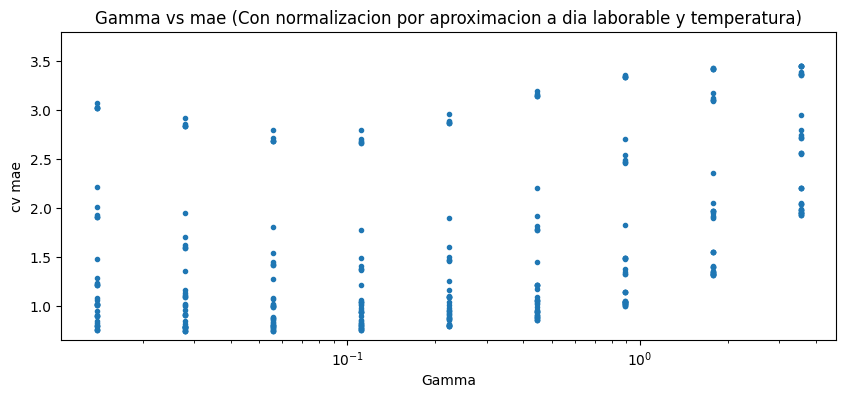

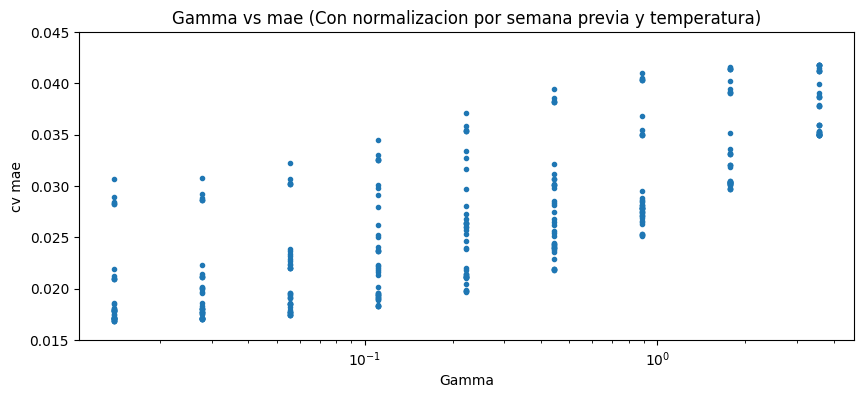

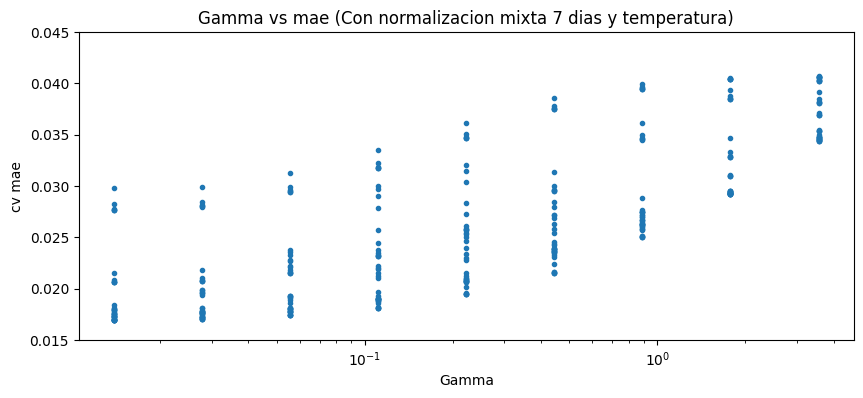

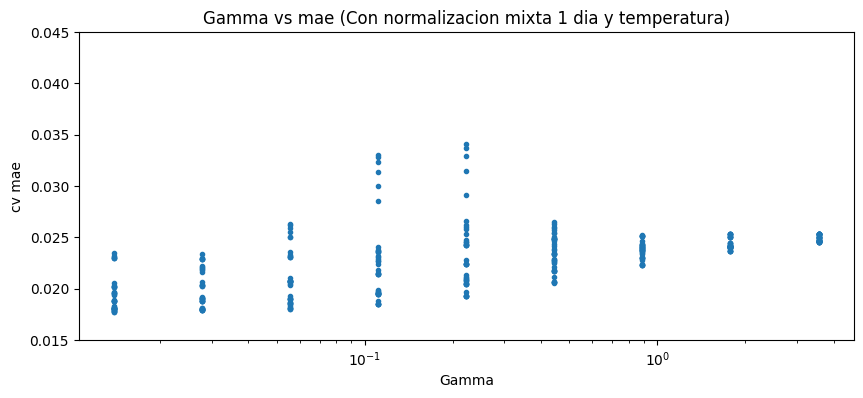

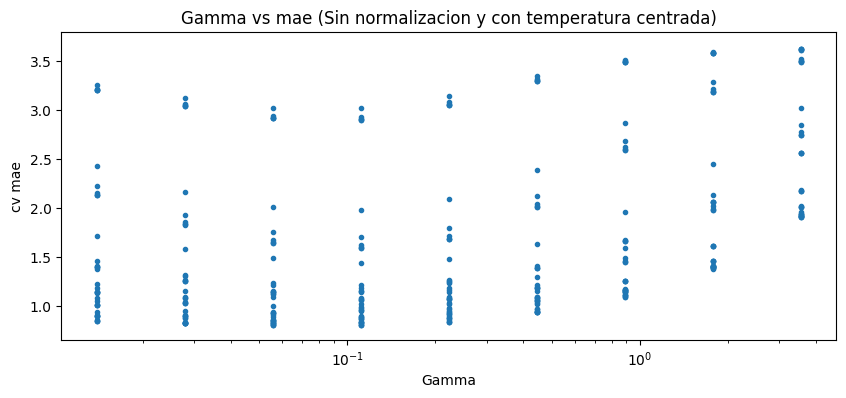

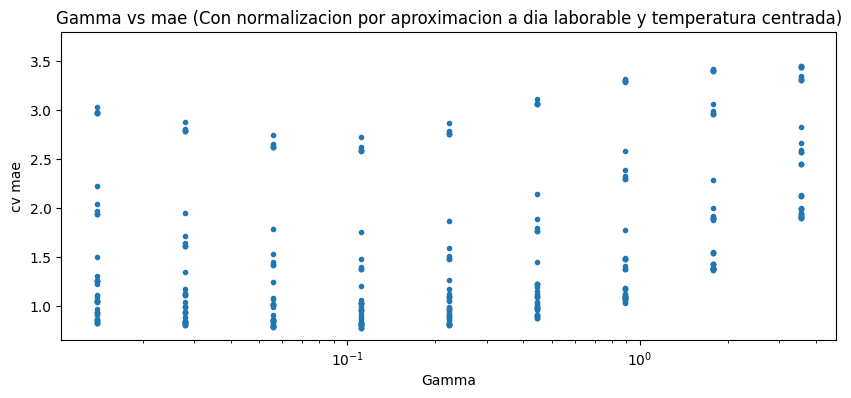

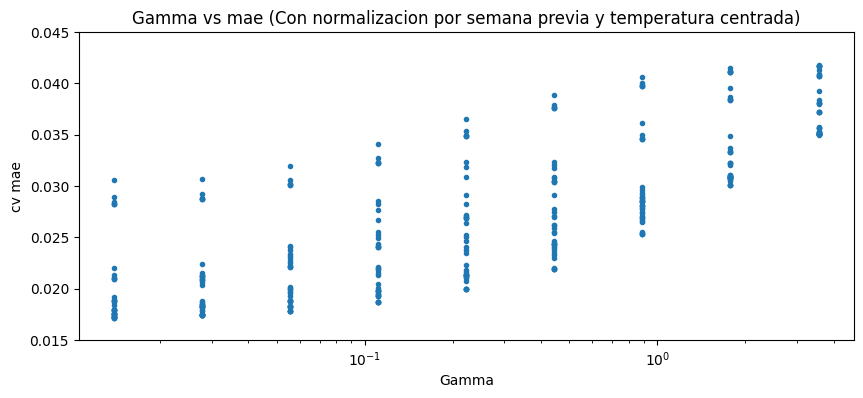

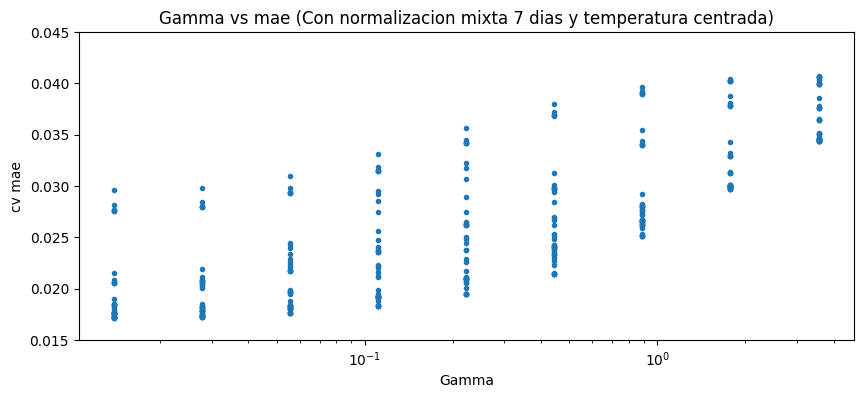

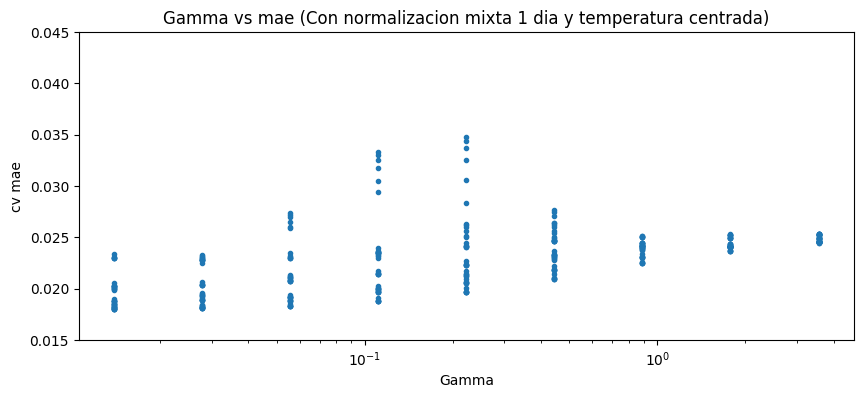

In [24]:
ancho = 10
alto = 4


plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Sin normalizacion ni temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0Sin['param_regressor__svr__estimator__gamma'], -df_svr_search_0Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion por aproximacion a dia laborable y sin temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1Sin['param_regressor__svr__estimator__gamma'], -df_svr_search_1Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion por semana previa y sin temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2Sin['param_regressor__svr__estimator__gamma'], -df_svr_search_2Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion mixta 7 dias y sin temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37Sin['param_regressor__svr__estimator__gamma'], -df_svr_search_37Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion mixta 1 dia y sin temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31Sin['param_regressor__svr__estimator__gamma'], -df_svr_search_31Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Sin normalizacion y con temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0Con['param_regressor__svr__estimator__gamma'], -df_svr_search_0Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion por aproximacion a dia laborable y temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1Con['param_regressor__svr__estimator__gamma'], -df_svr_search_1Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion por semana previa y temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2Con['param_regressor__svr__estimator__gamma'], -df_svr_search_2Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion mixta 7 dias y temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37Con['param_regressor__svr__estimator__gamma'], -df_svr_search_37Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion mixta 1 dia y temperatura)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31Con['param_regressor__svr__estimator__gamma'], -df_svr_search_31Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Sin normalizacion y con temperatura centrada)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0ConCen['param_regressor__svr__estimator__gamma'], -df_svr_search_0ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion por aproximacion a dia laborable y temperatura centrada)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1ConCen['param_regressor__svr__estimator__gamma'], -df_svr_search_1ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion por semana previa y temperatura centrada)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2ConCen['param_regressor__svr__estimator__gamma'], -df_svr_search_2ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion mixta 7 dias y temperatura centrada)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37ConCen['param_regressor__svr__estimator__gamma'], -df_svr_search_37ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Gamma vs mae (Con normalizacion mixta 1 dia y temperatura centrada)')
plt.xlabel('Gamma')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31ConCen['param_regressor__svr__estimator__gamma'], -df_svr_search_31ConCen['mean_test_score'], '.')
plt.show()

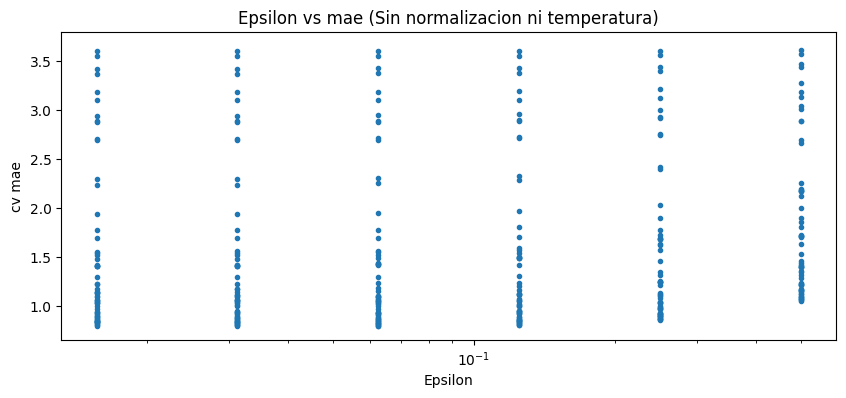

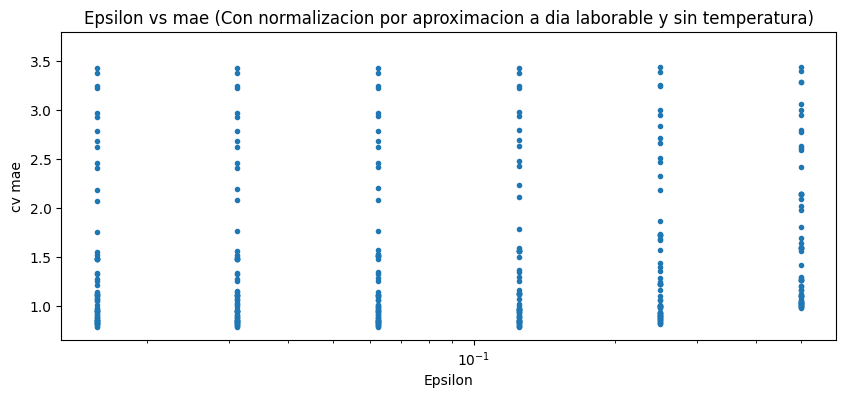

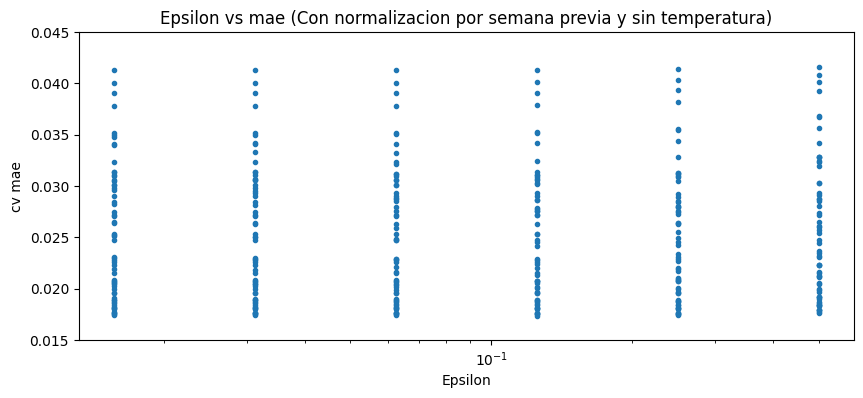

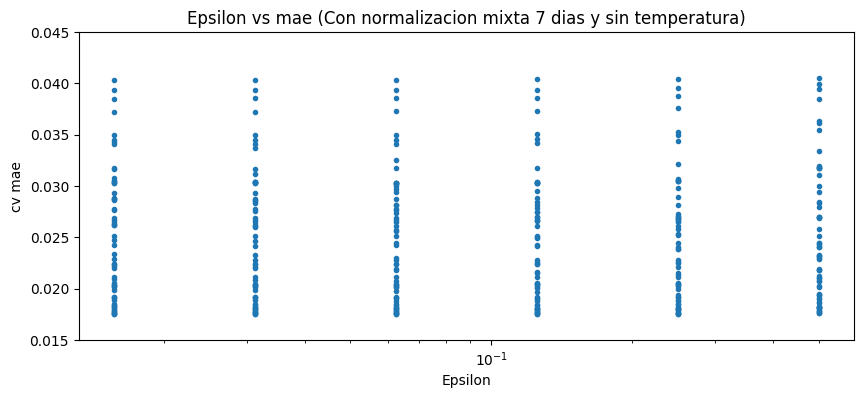

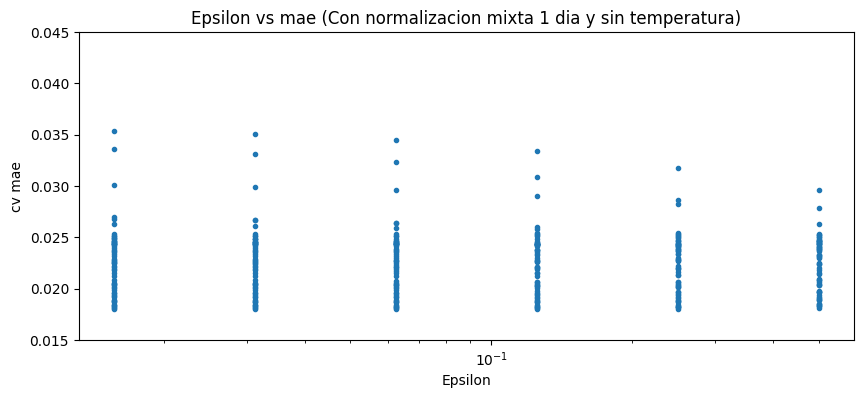

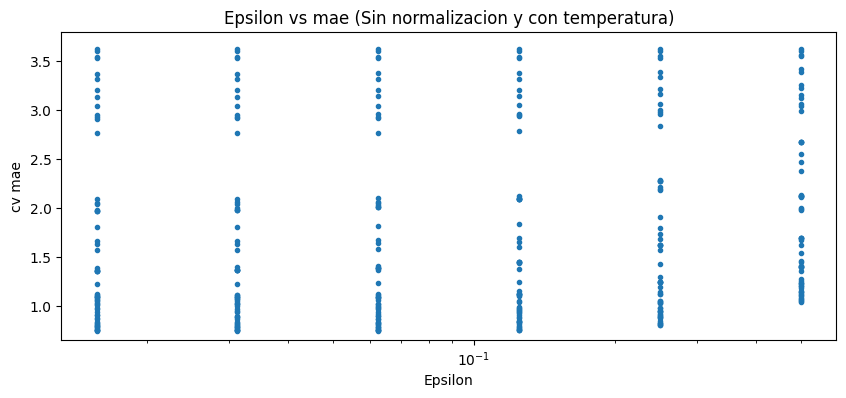

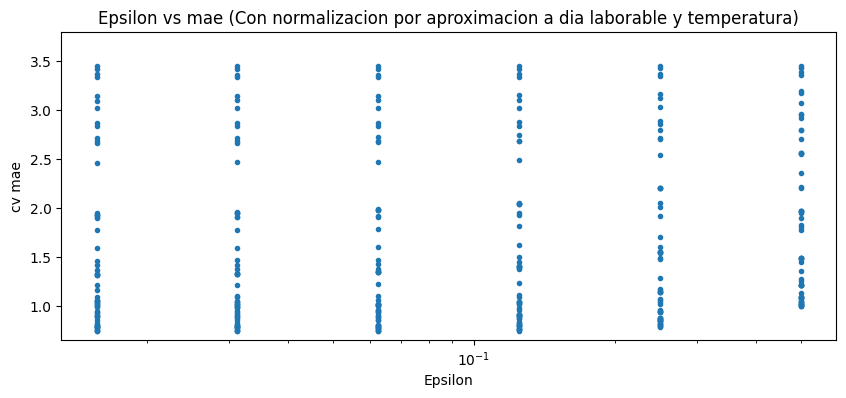

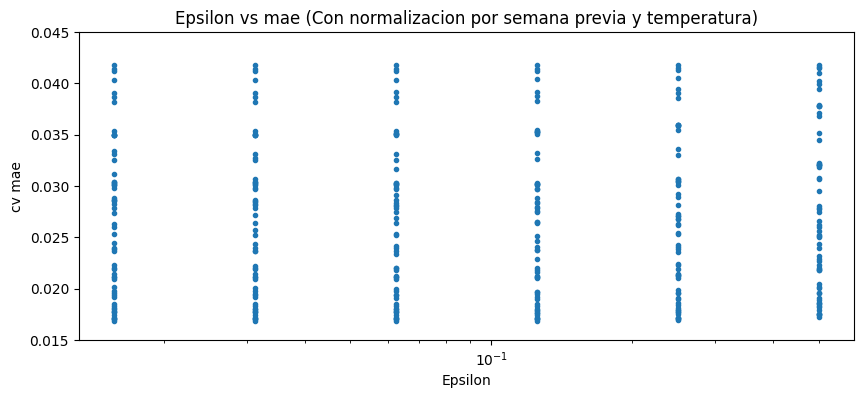

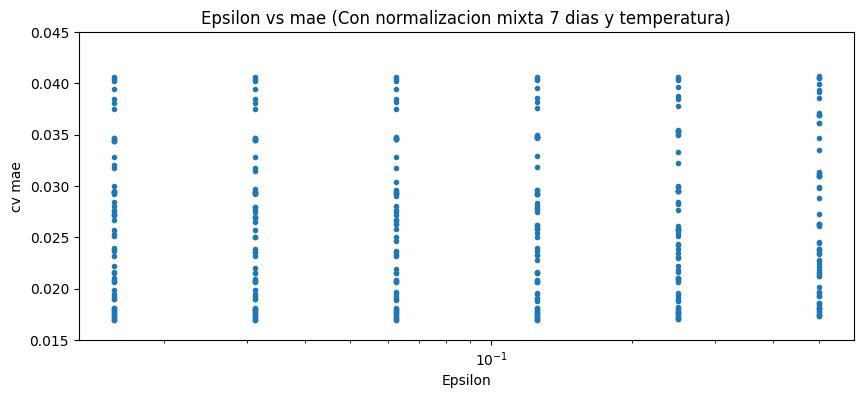

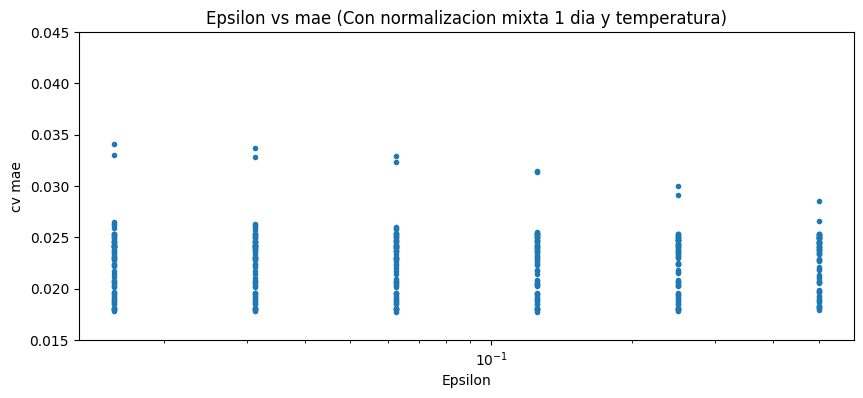

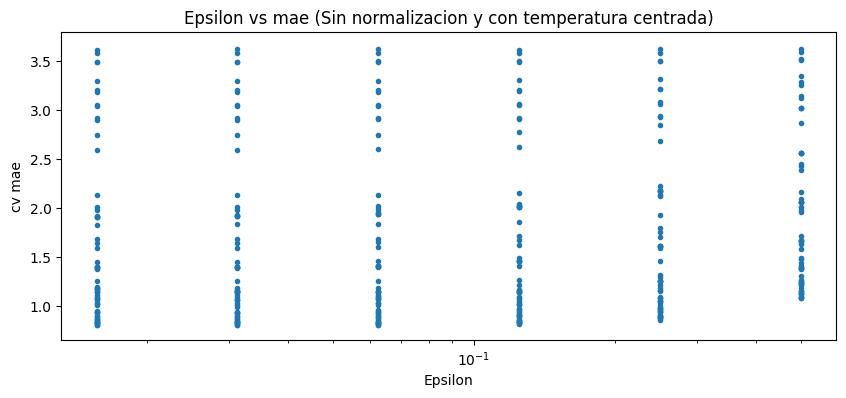

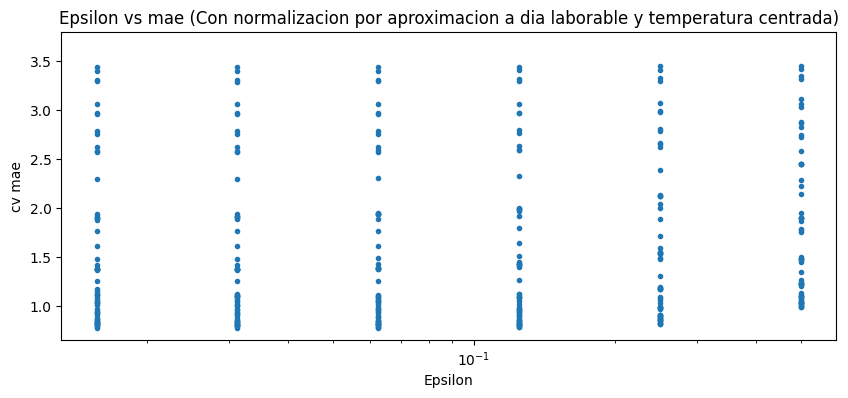

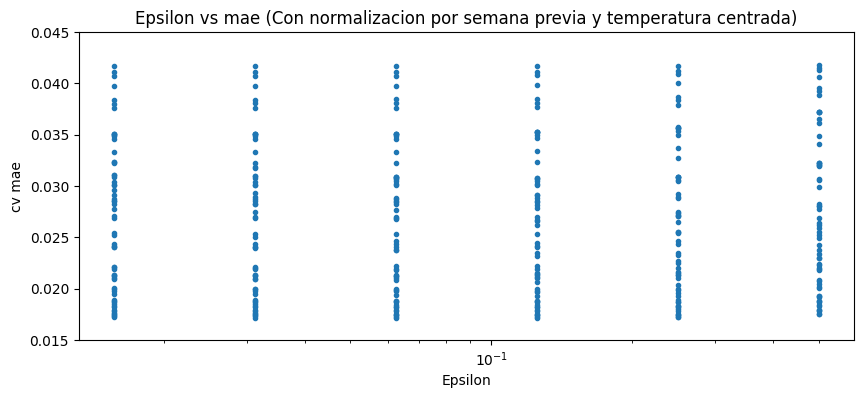

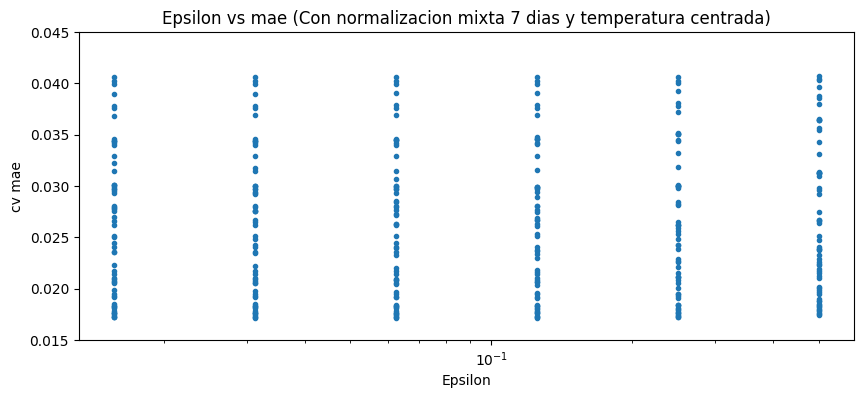

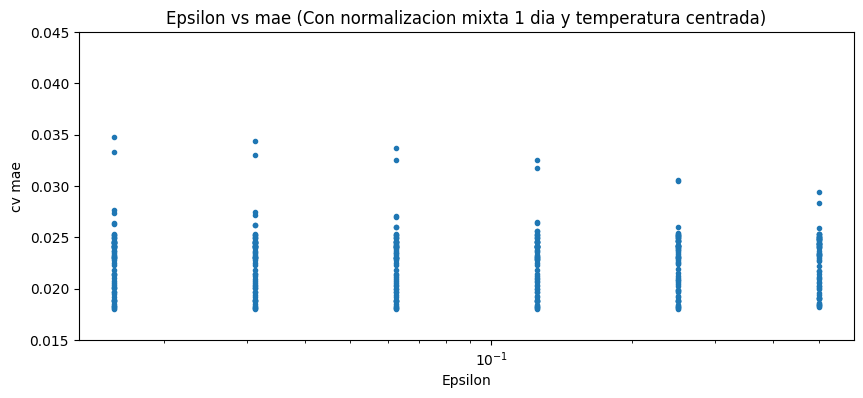

In [25]:
ancho = 10
alto = 4


plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Sin normalizacion ni temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0Sin['param_regressor__svr__estimator__epsilon'], -df_svr_search_0Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion por aproximacion a dia laborable y sin temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1Sin['param_regressor__svr__estimator__epsilon'], -df_svr_search_1Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion por semana previa y sin temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2Sin['param_regressor__svr__estimator__epsilon'], -df_svr_search_2Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion mixta 7 dias y sin temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37Sin['param_regressor__svr__estimator__epsilon'], -df_svr_search_37Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion mixta 1 dia y sin temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31Sin['param_regressor__svr__estimator__epsilon'], -df_svr_search_31Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Sin normalizacion y con temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0Con['param_regressor__svr__estimator__epsilon'], -df_svr_search_0Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion por aproximacion a dia laborable y temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1Con['param_regressor__svr__estimator__epsilon'], -df_svr_search_1Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion por semana previa y temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2Con['param_regressor__svr__estimator__epsilon'], -df_svr_search_2Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion mixta 7 dias y temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37Con['param_regressor__svr__estimator__epsilon'], -df_svr_search_37Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion mixta 1 dia y temperatura)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31Con['param_regressor__svr__estimator__epsilon'], -df_svr_search_31Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Sin normalizacion y con temperatura centrada)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_0ConCen['param_regressor__svr__estimator__epsilon'], -df_svr_search_0ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion por aproximacion a dia laborable y temperatura centrada)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.65, 3.8])
plt.plot(df_svr_search_1ConCen['param_regressor__svr__estimator__epsilon'], -df_svr_search_1ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion por semana previa y temperatura centrada)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_2ConCen['param_regressor__svr__estimator__epsilon'], -df_svr_search_2ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion mixta 7 dias y temperatura centrada)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_37ConCen['param_regressor__svr__estimator__epsilon'], -df_svr_search_37ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('Epsilon vs mae (Con normalizacion mixta 1 dia y temperatura centrada)')
plt.xlabel('Epsilon')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.015, 0.045])
plt.plot(df_svr_search_31ConCen['param_regressor__svr__estimator__epsilon'], -df_svr_search_31ConCen['mean_test_score'], '.')
plt.show()

Y se obtienen los mejores estimadores de cada conjunto de datos.

In [22]:
estimador_0Sin = cv_estimator_0Sin.best_estimator_
estimador_1Sin = cv_estimator_1Sin.best_estimator_
estimador_2Sin = cv_estimator_2Sin.best_estimator_
estimador_37Sin = cv_estimator_37Sin.best_estimator_
estimador_31Sin = cv_estimator_31Sin.best_estimator_
estimador_0Con = cv_estimator_0Con.best_estimator_
estimador_1Con = cv_estimator_1Con.best_estimator_
estimador_2Con = cv_estimator_2Con.best_estimator_
estimador_37Con = cv_estimator_37Con.best_estimator_
estimador_31Con = cv_estimator_31Con.best_estimator_
estimador_0ConCen = cv_estimator_0ConCen.best_estimator_
estimador_1ConCen = cv_estimator_1ConCen.best_estimator_
estimador_2ConCen = cv_estimator_2ConCen.best_estimator_
estimador_37ConCen = cv_estimator_37ConCen.best_estimator_
estimador_31ConCen = cv_estimator_31ConCen.best_estimator_

### Scores

Resultados de los scores de los distintos estimadores. Primero se leen los datos de la normalización, necesarios para la desnormalización de los datos previstos para la medición de los scores.

In [23]:
medias_festivos = lee_datos_normalizacion("festivos")
medias_laborables = lee_datos_normalizacion("laborables")
medias_sabados = lee_datos_normalizacion("sabados")

In [24]:
scores_0Sin = score0(estimador_0Sin, XTest0Sin, yTest, "SVR0Sin")
scores_1Sin = score1(estimador_1Sin, XTest1Sin, yTest, data, medias_laborables, medias_festivos, medias_sabados, "SVR1Sin")
scores_2Sin = score2(estimador_2Sin, XTest2Sin, yTest, data, "SVR2Sin")
scores_37Sin = score3x(estimador_37Sin, XTest37Sin, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "SVR37Sin")
scores_31Sin = score3x(estimador_31Sin, XTest31Sin, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "SVR31Sin")
scores_0Con = score0(estimador_0Con, XTest0Con, yTest, "SVR0Con")
scores_1Con = score1(estimador_1Con, XTest1Con, yTest, data, medias_laborables, medias_festivos, medias_sabados, "SVR1Con")
scores_2Con = score2(estimador_2Con, XTest2Con, yTest, data, "SVR2Con")
scores_37Con = score3x(estimador_37Con, XTest37Con, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "SVR37Con")
scores_31Con = score3x(estimador_31Con, XTest31Con, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "SVR31Con")
scores_0ConCen = score0(estimador_0ConCen, XTest0ConCen, yTest, "SVR0ConCen")
scores_1ConCen = score1(estimador_1ConCen, XTest1ConCen, yTest, data, medias_laborables, medias_festivos, medias_sabados, "SVR1ConCen")
scores_2ConCen = score2(estimador_2ConCen, XTest2ConCen, yTest, data, "SVR2ConCen")
scores_37ConCen = score3x(estimador_37ConCen, XTest37ConCen, yTest, 7, data, medias_laborables, medias_festivos, medias_sabados, "SVR37ConCen")
scores_31ConCen = score3x(estimador_31ConCen, XTest31ConCen, yTest, 1, data, medias_laborables, medias_festivos, medias_sabados, "SVR31ConCen")

Y los resultados calculados se mostrarán en las siguientes tablas.

In [25]:
nombres = ['Sin normalizacion', 
           'Con normalizacion por aproximacion a dia laborable', 
           'Con normalizacion por semana previa',
           'Con normalizacion mixta 7 dias',
           'Con normalizacion mixta 1 dia']

sin_temperatura = []
con_temperatura = []
con_temperatura_centrada = []
for i in range(horas_delante):
    sin_temperatura.append([])
    sin_temperatura[i].append(scores_0Sin[i])
    sin_temperatura[i].append(scores_1Sin[i])
    sin_temperatura[i].append(scores_2Sin[i])
    sin_temperatura[i].append(scores_37Sin[i])
    sin_temperatura[i].append(scores_31Sin[i])

    con_temperatura.append([])
    con_temperatura[i].append(scores_0Con[i])
    con_temperatura[i].append(scores_1Con[i])
    con_temperatura[i].append(scores_2Con[i])
    con_temperatura[i].append(scores_37Con[i])
    con_temperatura[i].append(scores_31Con[i])

    con_temperatura_centrada.append([])
    con_temperatura_centrada[i].append(scores_0ConCen[i])
    con_temperatura_centrada[i].append(scores_1ConCen[i])
    con_temperatura_centrada[i].append(scores_2ConCen[i])
    con_temperatura_centrada[i].append(scores_37ConCen[i])
    con_temperatura_centrada[i].append(scores_31ConCen[i])

scores = []
for i in range(horas_delante):
    scores.append(pd.DataFrame({'Nombres': nombres, 
                                'Sin temperatura': sin_temperatura[i], 
                                'Con temperatura': con_temperatura[i], 
                                'Con temperatura centrada': con_temperatura_centrada[i]}))

In [26]:
print('SCORES PRIMERA HORA:')
scores[0]

SCORES PRIMERA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.431965   
1  Con normalizacion por aproximacion a dia labor...         0.434467   
2                Con normalizacion por semana previa         0.293447   
3                     Con normalizacion mixta 7 dias         0.298828   
4                      Con normalizacion mixta 1 dia         0.301429   

   Con temperatura  Con temperatura centrada  
0         0.416170                  0.426319  
1         0.415304                  0.445220  
2         0.289799                  0.292288  
3         0.296171                  0.298125  
4         0.296901                  0.299887

In [27]:
print('SCORES SEGUNDA HORA:')
scores[1]

SCORES SEGUNDA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.730694   
1  Con normalizacion por aproximacion a dia labor...         0.751927   
2                Con normalizacion por semana previa         0.409691   
3                     Con normalizacion mixta 7 dias         0.416253   
4                      Con normalizacion mixta 1 dia         0.413666   

   Con temperatura  Con temperatura centrada  
0         0.703764                  0.724992  
1         0.709934                  0.727284  
2         0.400151                  0.403063  
3         0.408391                  0.410723  
4         0.407148                  0.411490

In [28]:
print('SCORES TERCERA HORA:')
scores[2]

SCORES TERCERA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         0.960646   
1  Con normalizacion por aproximacion a dia labor...         0.966856   
2                Con normalizacion por semana previa         0.499140   
3                     Con normalizacion mixta 7 dias         0.505688   
4                      Con normalizacion mixta 1 dia         0.490915   

   Con temperatura  Con temperatura centrada  
0         0.927710                  0.963318  
1         0.894211                  0.889323  
2         0.481894                  0.488162  
3         0.490023                  0.494898  
4         0.482792                  0.488467

In [29]:
print('SCORES CUARTA HORA:')
scores[3]

SCORES CUARTA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.143251   
1  Con normalizacion por aproximacion a dia labor...         1.097616   
2                Con normalizacion por semana previa         0.571341   
3                     Con normalizacion mixta 7 dias         0.572960   
4                      Con normalizacion mixta 1 dia         0.545163   

   Con temperatura  Con temperatura centrada  
0         1.115635                  1.154986  
1         0.994629                  1.007180  
2         0.546690                  0.556347  
3         0.550401                  0.556465  
4         0.536059                  0.541252

In [30]:
print('SCORES QUINTA HORA:')
scores[4]

SCORES QUINTA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.302983   
1  Con normalizacion por aproximacion a dia labor...         1.202864   
2                Con normalizacion por semana previa         0.627826   
3                     Con normalizacion mixta 7 dias         0.625467   
4                      Con normalizacion mixta 1 dia         0.585242   

   Con temperatura  Con temperatura centrada  
0         1.278719                  1.312144  
1         1.084552                  1.095180  
2         0.596682                  0.608449  
3         0.596246                  0.604140  
4         0.576330                  0.579691

In [31]:
print('SCORES SEXTA HORA:')
scores[5]

SCORES SEXTA HORA:


Nombres  Sin temperatura  \
0                                  Sin normalizacion         1.430791   
1  Con normalizacion por aproximacion a dia labor...         1.269819   
2                Con normalizacion por semana previa         0.671930   
3                     Con normalizacion mixta 7 dias         0.667357   
4                      Con normalizacion mixta 1 dia         0.615630   

   Con temperatura  Con temperatura centrada  
0         1.404199                  1.436498  
1         1.138810                  1.151740  
2         0.637560                  0.648384  
3         0.633159                  0.642973  
4         0.604559                  0.609173

### Curvas realidad-predicción

Para obtener una idea más visual de los resultados, se muestran a continuación las curvas realidad-predicción de las estimaciones del primer horizonte realizadas por los estimadores para todos los casos de normalización y temperaturas.

Estas curvas enfrentan en el eje X el valor real de demanda contra el eje Y que muestra el valor predicho, para cada momento sobre el que se predice.

In [32]:
preds = pd.read_csv('preds.csv', sep=';', index_col=0)

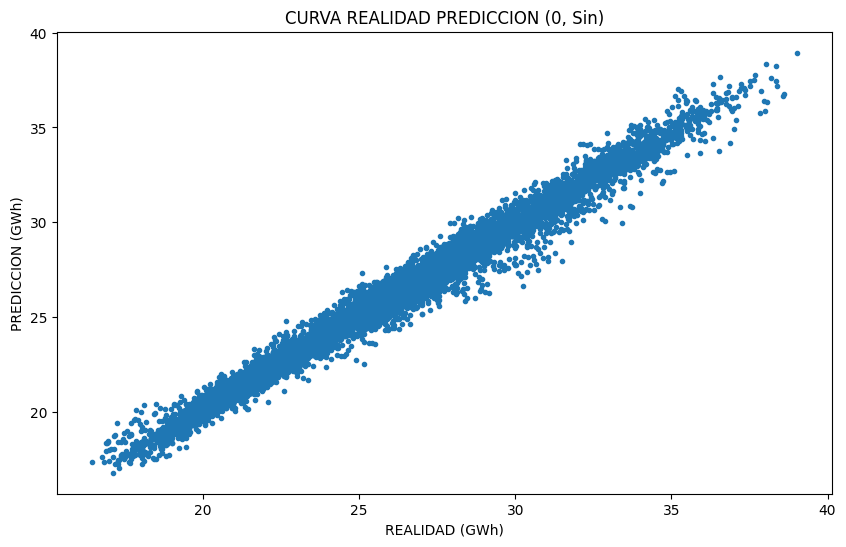

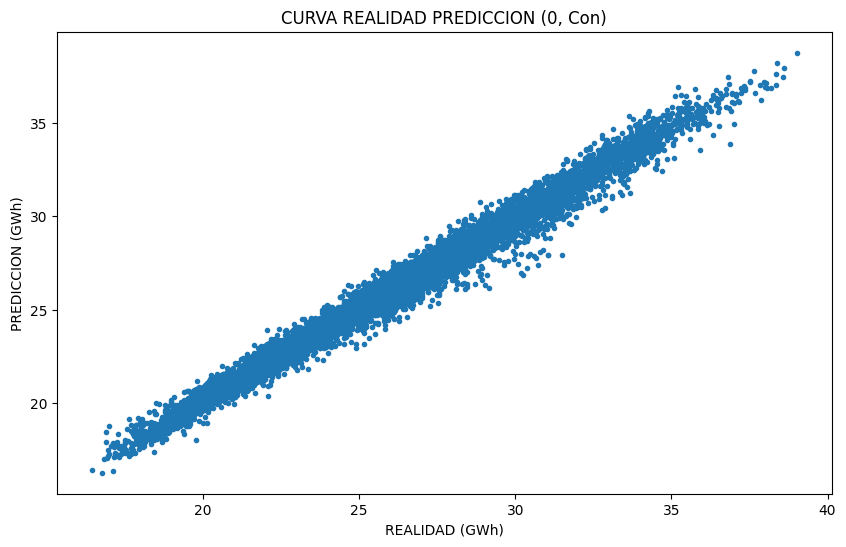

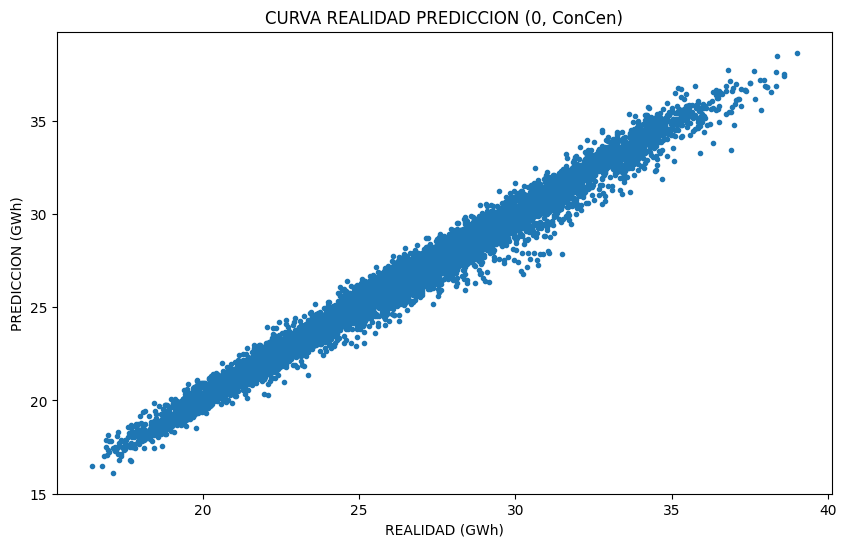

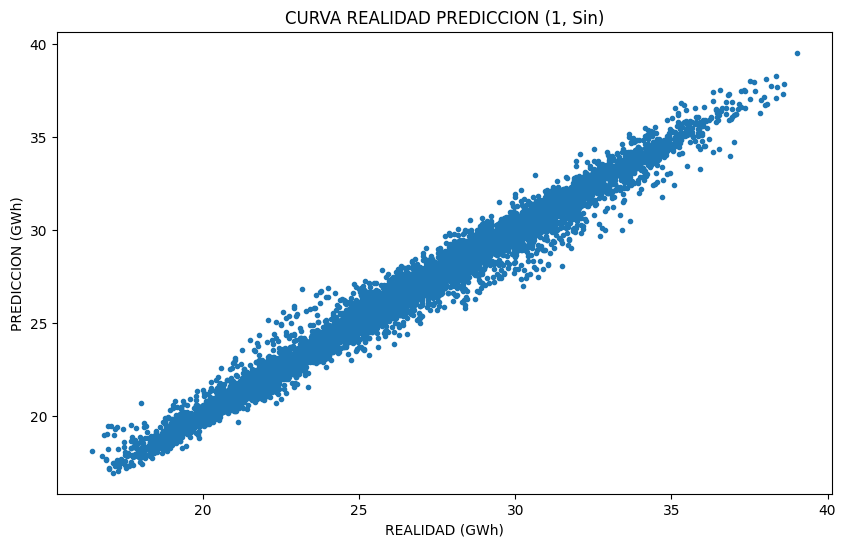

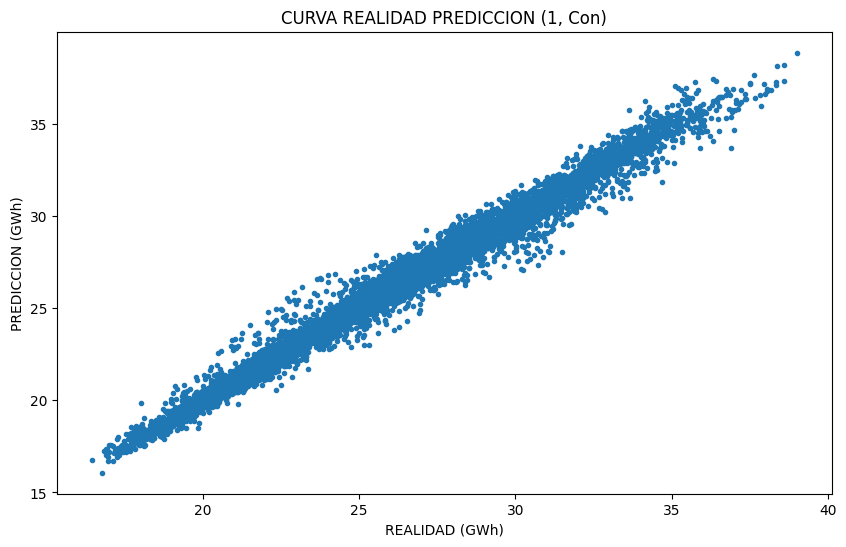

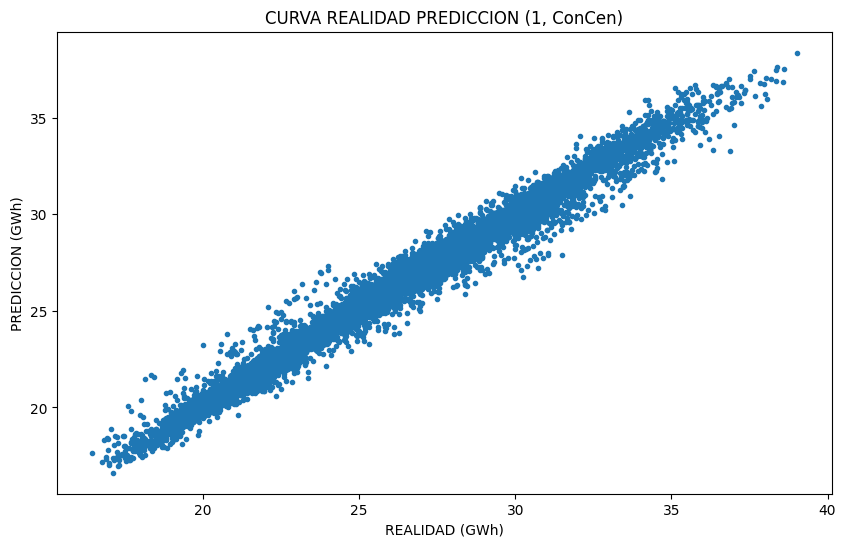

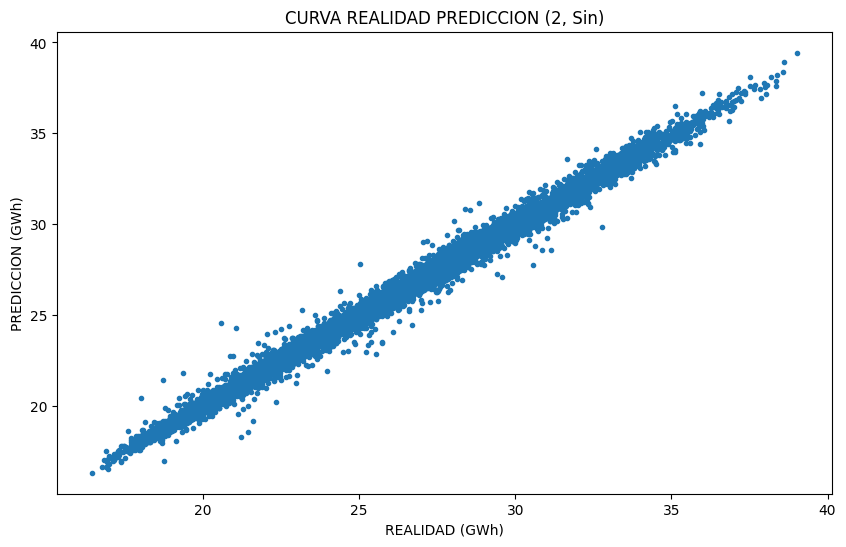

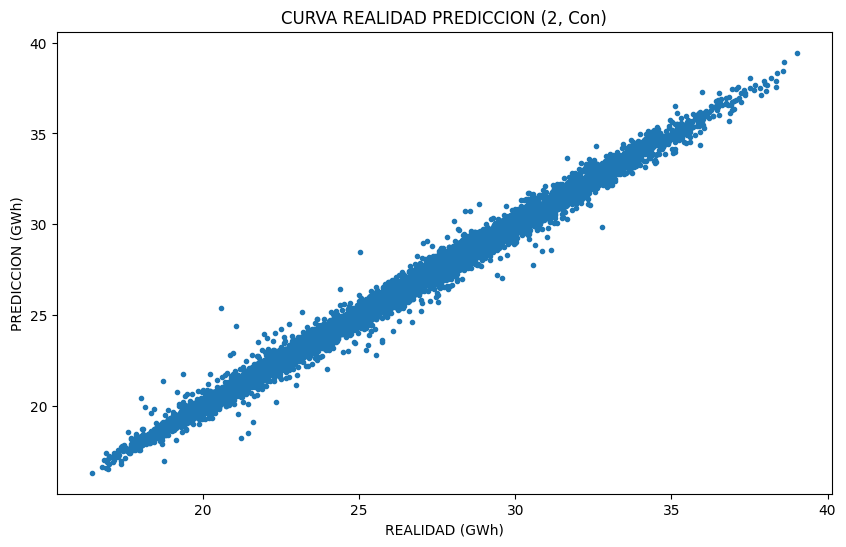

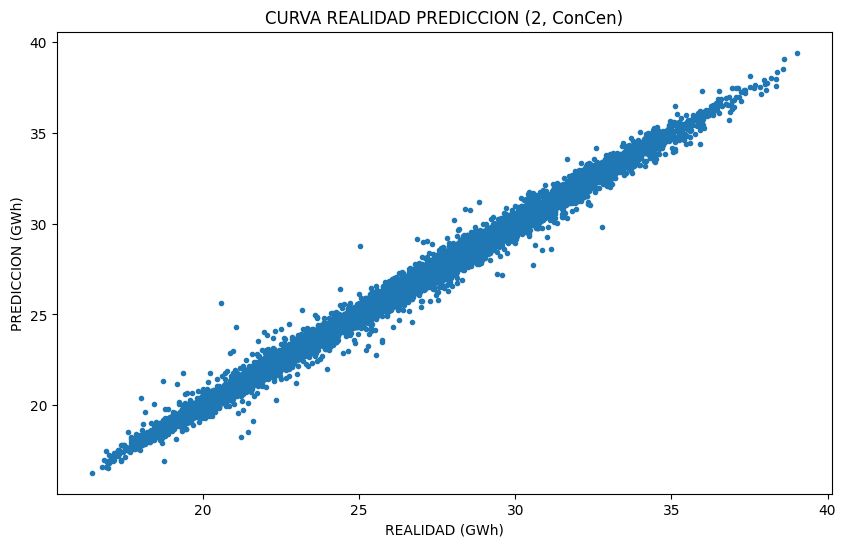

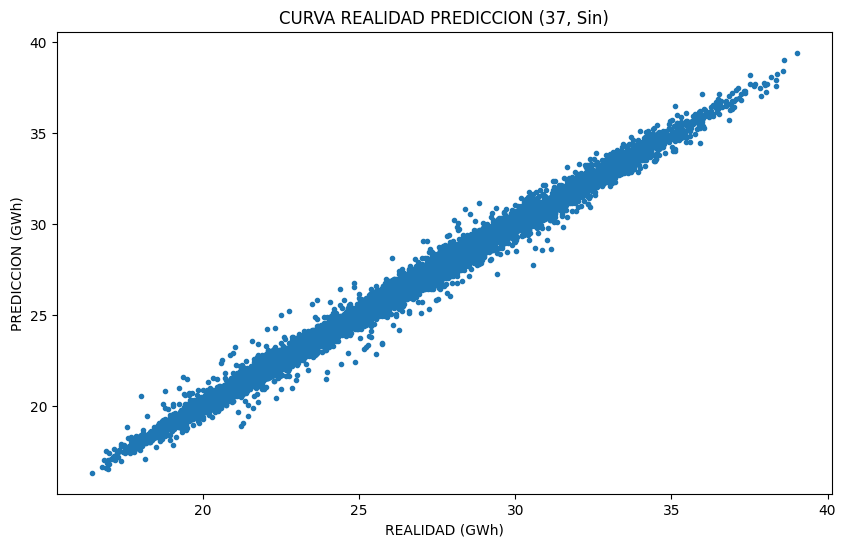

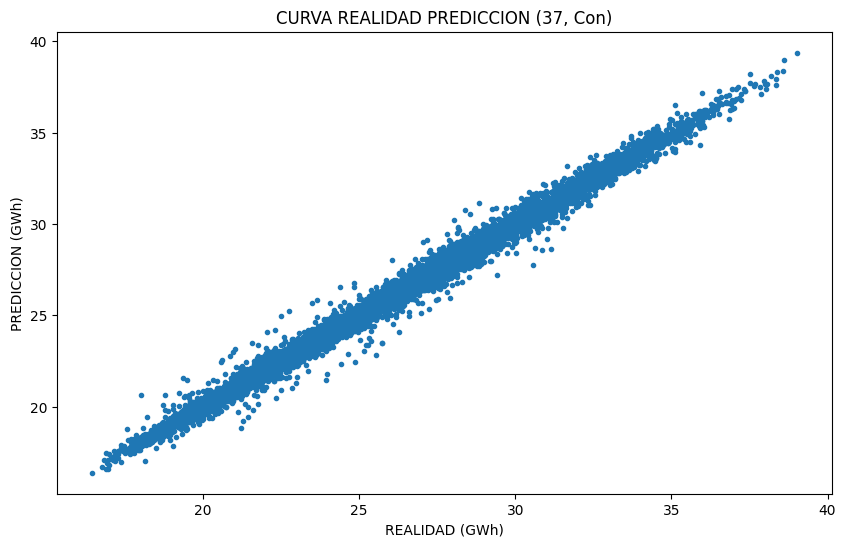

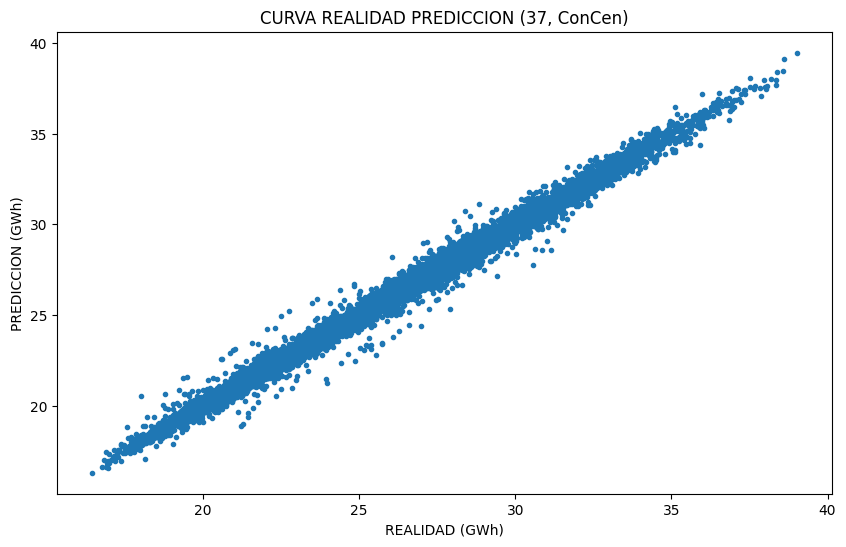

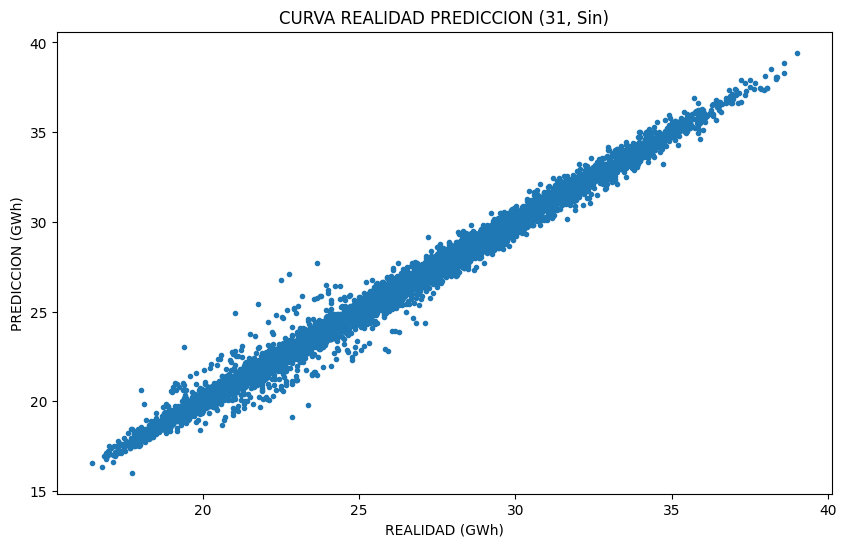

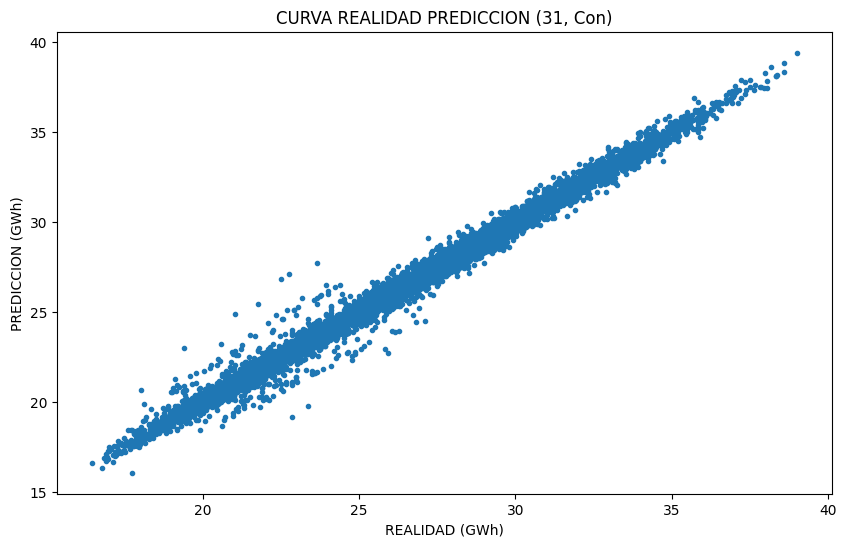

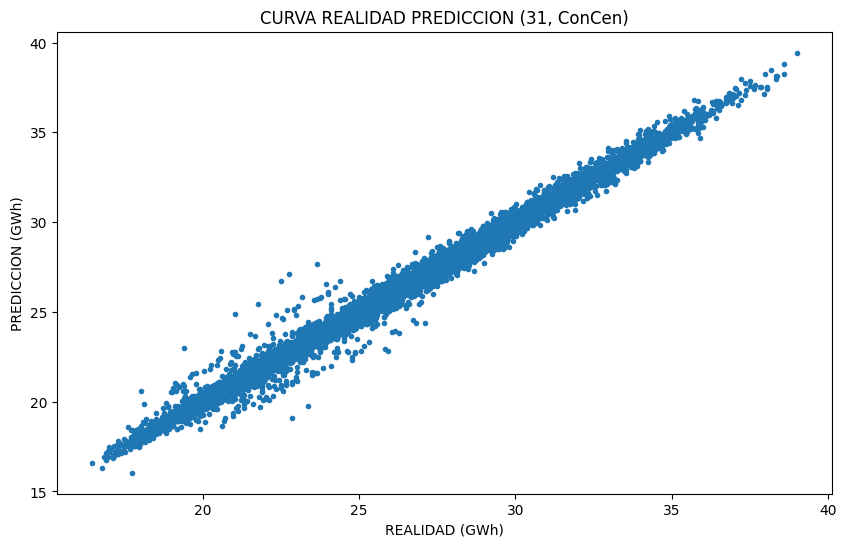

In [33]:
ancho = 10
alto = 6

for norm in [0, 1, 2, 37, 31]:
    for temp in ["Sin", "Con", "ConCen"]:
        clave = "SVR{}{}_0".format(norm, temp)
        plt.figure(figsize=(ancho,alto))
        plt.plot(preds["yTest_0"], preds[clave], ".")
        plt.title("CURVA REALIDAD PREDICCION ({}, {})".format(norm, temp))
        plt.xlabel("REALIDAD (GWh)")
        plt.ylabel("PREDICCION (GWh)")
        plt.show()